## Elixir Ecosystem Survey 2020

This is a quick look at the Elixir Ecosystem Survey 2020. Data was obtained from Hugo Baraúna's GitHub [repo](https://github.com/hugobarauna/elixir-ecosystem-2020-reponses-data).

## About the Survey

The survey was conducted over the course of the summer in 2020 by Brian Cardarella, who led the efforts to create and dissemniate the [survey](https://elixirforum.com/t/2020-elixir-ecosystem-survey/32396). The results of the survey were presented at [ElixirConf 2020](https://www.youtube.com/watch?v=-nVgAcy9wB0) by Brian. 

The survey was created on Typeform, but has since been taken down. Hugo kindly extracted the data and also created a PSQL dump of the normalized data. For this analysis, only the raw data extract was used.

### Packages used

In [40]:
library(tidyverse)
library(ggplot2)
library(gridExtra)

### Read and Cleaning the Data

I'm simply reading the csv file, and assigning all the columns to be character type. I could possibly encode the date time fields (eg. `Start Date (UTC)`), but not sure it's worth the effort right now...

In [41]:
raw <- read_csv("../data/elixir-ecosystem-survey-2020-raw-data.csv", col_types = cols(.default = "c"))
raw

#                               
1    tfpi7rxttfr5b8930pipukw7qn3r5b8s
2    qbxx0l4bpagp2q85qbxx0l4q0hkrb63a
3    jd9aahrn8bxmxxhayzzek47upjd9aahr
4    3h109llxrjgqfpqsllo3h10qe0ahs5pb
5    1rg6w0665kiagny7ddb1rg6w06d6k7fp
6    ck2g019k5qn3fqeng6jiqck2g019riv8
7    lzhk9luqsib7y7sglz5353l1rtjg2ldb
8    lkp88tar9epsb9etqqlkp8ozbuguckv3
9    rou6khd0bub1yh3rchwpt7rou6q116ba
10   eqrb4v6fu2gyqmbd6o8eqrb4dvthe7hi
11   7ux0oq55o7gnqgpsgt7ux0ieruz1bz1k
12   lpl9hzu5l4cxj5jrnmcmlpl9hzu5ea62
13   73503vhjx89w6qt63n73503qiaaq2tus
14   fe7kwzlyr489xiuqfk9zfe78wtp0ngl1
15   1klpnv296vanib2fg94fyri1klpnv2xv
16   d8jzliqgoiizsypmofd8jzliqg2acth9
17   wm6w7jxqg4ifiwm6chz4t9w8kjwui915
18   nm4tn0xqt57eiiu8bzlwnm4tn0xqhhbl
19   8hguo1wsij8lueudoun54o8hguo1wbr3
20   s67nrx2t07bfka2qqes67nrjxepmqx3v
21   v9fci8cx9xyel5vecksav9fci8j2cwhy
22   rtjtpsskwcf1q27v1krtd1qf77upq4ek
23   nrltuuedxlsscdbq9nrltuue34nhmcqd
24   3xesoanu0hmr2dzzjjz23xesoanbvfsf
25   kegqeeg0q0oys3bdkegqvchi0k72h10d
26   lyaqgcguj29zviqowoflyaqgaqeua0h3
27   8v82g8243iskt1ki8v82fhf66dme59jh
28   0grqma18pu7o7nqanxcy0grj4p3yk5vx
29   pi4po4omvn0n0taovbgpi4poodt9duh5
30   imd38hbiabhyp70rz32kuimd38hbi0jw
⋮    ⋮                               
3079 e2w3kecgpfo7d4je2wmtj1jew1ki6lde
3080 t4p2503vyczpqkfjhqu0t4p2joal7xco
3081 b1ylg7w41ca5e2qi1ri6phmncmb1ylg7
3082 13jnfgwdkqh8m13jnfi8gg6fnyvybohb
3083 1u0si2ts0w6hbwx0ofv1u0si2ye32hls
3084 xkj69l1otfguq26x60c216xkj69l1z7z
3085 latk4ny75h9fzjaiodslatk4nn16fz7f
3086 s5pohv6873rzk815g8s5pohv6ox4j3na
3087 unj30qh12b193unj3d9cvxss539evj21
3088 ud3kr67o86me3hkz1ud3krkyph85u574
3089 c323feqx861tjmaiu3c323fendzaahpy
3090 jf4meszifujz98upbjf4meno23mb9zcr
3091 0uw6iih1d5xuka9cdth90uw6iihqzxv3
3092 vuhemfqmdpun1lp08ybj2vuhemf12z46
3093 ybj8u3dn1uinzbcpyybj8lp1nhh1zlmc
3094 n5n2yl48x4hgw4haelbtan5n2errofag
3095 uzzspz4ptx07amn1uzzspn8yqrc6kzat
3096 sdao40epz2rbja2e5sdaow47nkuu1qgj
3097 e16ax171rvgfye16aupuslbwuvswog7n
3098 5dft325q0vbael82ffk5dft32009mgsz
3099 6nvm5bnofztop6iss6nvm5xgzr4qmnpj
3100 zi7jrb2xk2pfol8zi7jdcxmzyar6bjlr
3101 fyb9w2wrpsxvghh9fybl67q7btjbx7cm
3102 ho2qagk8ywxvbz0ho2s3h0xbwqbcalde
3103 ochiahhqw0986erlu29gmochiahij1ej
3104 h775c89lbxehnoutlxyjh775cklw55ct
3105 fkuzby5nvqhdrd5lezfkuvi2nl4v30m3
3106 dhqnpbllph8rh4zh2dhqnpfgwmx6uzcp
3107 8aqbbylt7ngizqqn44q8aqbby0o2431e
3108 njjm75u0bpfhrpit8knjjma1zp9k5baw
     Are you actively using Elixir in either professional or personal projects?
1    Yes                                                                       
2    Yes                                                                       
3    Yes                                                                       
4    Yes                                                                       
5    Yes                                                                       
6    Yes                                                                       
7    Yes                                                                       
8    Yes                                                                       
9    Yes                                                                       
10   Yes                                                                       
11   No, but I plan to use again in the future                                 
12   Yes                                                                       
13   Yes                                                                       
14   Yes                                                                       
15   Yes                                                                       
16   Yes                                                                       
17   Yes                                                                       
18   No, but I plan to use again in the future                                 
19   Yes                                                                       
20   Yes                                         

A peculiarity of the data dump is that a row represents the answers from one respondent (ie. one survey response per row), where the column names are the questions themselves, or an answer choice, when a choice was given in the question, as well as some metadata. 

**An important issue with the data was that there were 14 multiple choice questions explicity missing from the data, but the choices had been preserved.** For now, I've imputed what I believe are the questions that were asked.

In [49]:
qs <- c(
  "Are you actively using Elixir in either professional or personal projects?",
  "Can you share why you stopped using or never used Elixir?",
  "What solutions was the Elixir ecosystem lacking?",
  "Which language did you change to?",
  "How long have you been using Elixir?",
  "What is the most recent version of Elixir that you have used?",
  "How did you first learn about Elixir?",
  "What sources of information was most impactful for learning Elixir?",
  "Have you written any Erlang?",
  "Have you written in any other BEAM based language?",
  "What is your age range?",
  "Which gender do you identify as?",
  "In which country do you currently reside?",
  "Do you have a college degree in Computer Science or similar degree?",
  "What part of Elixir did you find most difficult to learn?",
  "Do you maintain any Open Source (OSS) Elixir libraries?",
  "Have you made contributions to anyone else's OSS Elixir libraries?",
  "Have you made OSS contributions back to Elixir?",
  "How often do you attend local Elixir meetups?",
  "Do you help organize Elixir meetups?",
  "Do you attend your continent's major Elixir Conference",
  "Do you attend any regional Elixir/Erlang conferences?",
  "Do you participate in any online Elixir chats?",
  "Which Elixir Podcasts do you listen to?",
  "Which Elixir newsletters are you subscribed to?",
  "What industry is your company in?",
  "What is your role within your company?",
  "Does your company use Elixir?",
  "How long has your company been using Elixir?",
  "In what capacities is your company using Elixir?",
  "How many engineers are using Elixir at your company?",
  "Did your company migrate from another language or choose Elixir for a new project?",
  "Did your company migrate from another language / framework?",
  "What outcomes did your team experience after adopting Elixir?",
  "Which reasons prevented Elixir from being adopted at your company?",
  "Can you say which language(s) and describe why it won?",
  "Which operating system do you primarily develop on?",
  "Which editor/IDE do you primarily write Elixir with?",
  "How do you debug?",
  "Which operating system do you deploy to?",
  "What database do you primarily use?",
  "Do you write tests?",
  "Have you ever used Hot Code Reloading in production?",
  "Where do you deploy your Elixir applications to?",
  "How are you deploying your Elixir application?",
  "If your project(s) uses Continuous Integration which is it?",
  "If your team is enforcing code formatting what methods do you use?",
  "If there is one library that you are excited about in 2020 which is it?",
  "Are you using Phoenix?",
  "What is the most recent version of Phoenix that you have used?",
  "Are you running Phoenix in production?",
  "How are you using Phoenix?",
  "Are you using Nerves?",
  "What is the most recent version of Nerves that you have used?",
  "Are you using Scenic?",
  "Is your Nerves application distributed across many devices?"
)
questions <- tibble(id = seq_along(qs), question = qs)

I'll convert the data into [long form or "tidy data"](https://vita.had.co.nz/papers/tidy-data.html) which will allow analysis of the survey responses to be much easier.

In [53]:
long <-
  raw %>%
  mutate(`How are you using Phoenix?` = NA, .after = 170) %>%
  mutate(`If your team is enforcing code formatting what methods do you use?` = NA, .after = 162) %>%
  mutate(`If your project(s) uses Continuous Integration which is it?` = NA, .after = 150) %>%
  mutate(`How are you deploying your Elixir application?` = NA, .after = 143) %>%
  mutate(`Where do you deploy your Elixir applications to?` = NA, .after = 137) %>%
  mutate(`What database do you primarily use?` = NA, .after = 129) %>%
  mutate(`How do you debug?` = NA, .after = 123) %>%
  mutate(`Which reasons prevented Elixir from being adopted at your company?` = NA, .after = 112) %>%
  mutate(`question_34` = NA, .after = 106) %>%
  mutate(`Did your company migrate from another language / framework?` = NA, .after = 97) %>%
  mutate(`In what capacities is your company using Elixir?` = NA, .after = 92) %>%
  mutate(`Which Elixir newsletters are you subscribed to?` = NA, .after = 82) %>%
  mutate(`Which Elixir Podcasts do you listen to?` = NA, .after = 75) %>%
  mutate(`Do you participate in any online Elixir chats?` = NA, .after = 66) %>%
  mutate(`Have you written in any other BEAM based language?` = NA, .after = 36) %>%
  mutate(`What sources of information was most impactful for learning Elixir?` = NA, .after = 24) %>%
  mutate(`How did you first learn about Elixir?` = NA, .after = 18) %>%
  mutate(`Which language did you change to?` = NA, .after = 8) %>%
  mutate(`Can you share why you stopped using or never used Elixir?` = NA, .after = 2) %>%
  pivot_longer(
    !c(`#`, contains("UTC"), `Network ID`),
    names_to = "question_raw",
    values_to = "answer"
  ) %>%
  janitor::clean_names() %>%
  mutate(question_raw = ifelse(question_raw == "question_34", "What outcomes did your team experience after adopting Elixir?", question_raw)) %>%
  ##########################
  # Key transformation occurs here
  # Joins the choices and free text answers to the appropriate quesiton
  ##########################
  left_join(questions, by = c("question_raw" = "question")) %>%
  fill(id) %>%
  left_join(questions, by = c("id" = "id")) %>%
  # Remove missing answers
  filter(
    !is.na(answer),
    answer != "Choose not to answer"
  ) %>%
  mutate(
    answer = ifelse(answer == "1", "Yes", answer),
    answer = ifelse(answer == "0", "No", answer)
  ) %>%
  rename(question_id = id) %>%
  rename(user_id = number) %>%
  select(user_id:network_id, question_id, question, answer)



With the data prepared in long form, it's easy to perform basic aggregations and plotting on the data. Here's one example of creating a summary bar plot for each question.

In [54]:
## Helper functions
summarize_survey <- function(df) {
  df %>%
    mutate(answer = forcats::fct_lump_n(answer, 14, ties.method = "first")) %>%
    group_by(answer) %>%
    summarize(n = n()) %>%
    mutate(prop = n / sum(n)) %>%
    arrange(desc(prop)) 
}

barplot_survey <- function(df, question) {
  ggplot(df, aes(prop, reorder(answer, -prop))) +
    geom_col(width = 0.4, fill = "steelblue") +
    geom_text(aes(label = scales::percent(prop, accuracy = 0.1)), hjust = -0.10) +
    theme_classic() +
    #     ggtitle(question) +
    ylab("") +
    xlab("Proportion (%)") +
    labs(title = str_wrap(question, 90)) +
    scale_x_continuous(labels = scales::label_percent()) +
    scale_y_discrete(labels = function(x) stringr::str_wrap(x, 40))
}


In [55]:
survey_plots <-
  long %>%
arrange(question_id) %>%
  group_by(question) %>%
  nest() %>%
  mutate(
    summary = map(data, summarize_survey),
    n = map_int(summary, ~ sum(.x$n)),
    question = paste0(question, " (N = ", n, ")"),
    plot = map2(summary, question, barplot_survey)
  )

## Top 15 Results for Survey Responses

[[1]]

[[2]]


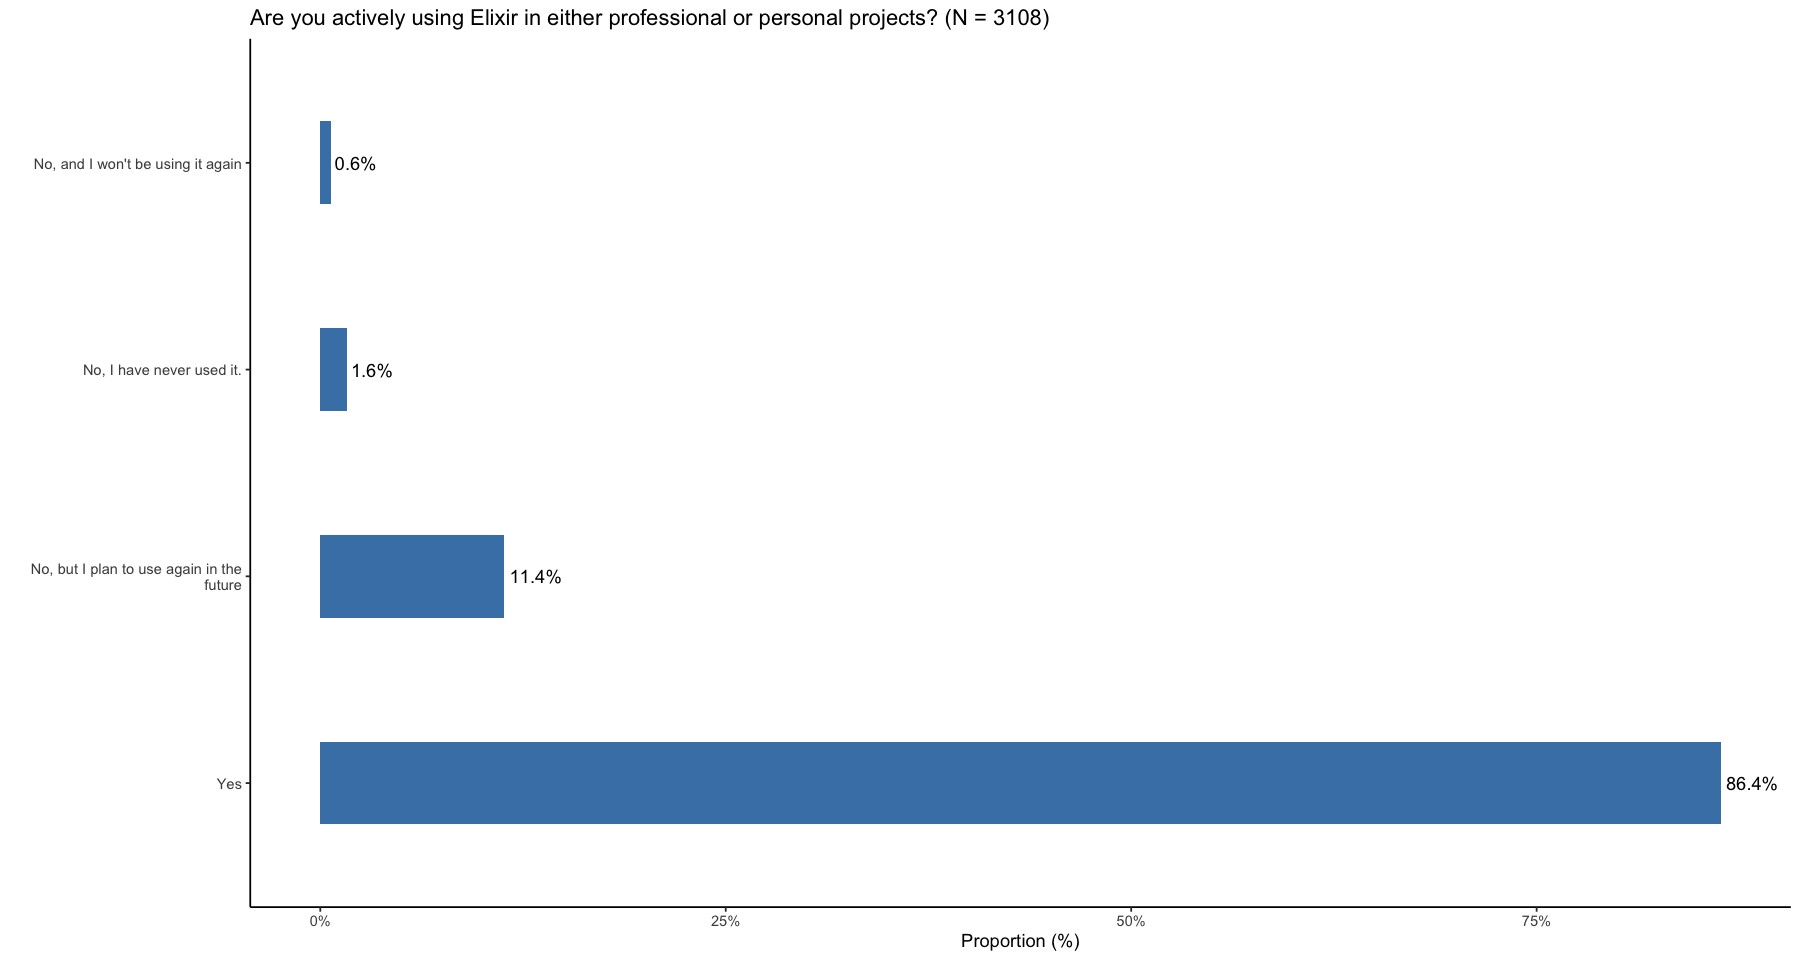


[[3]]


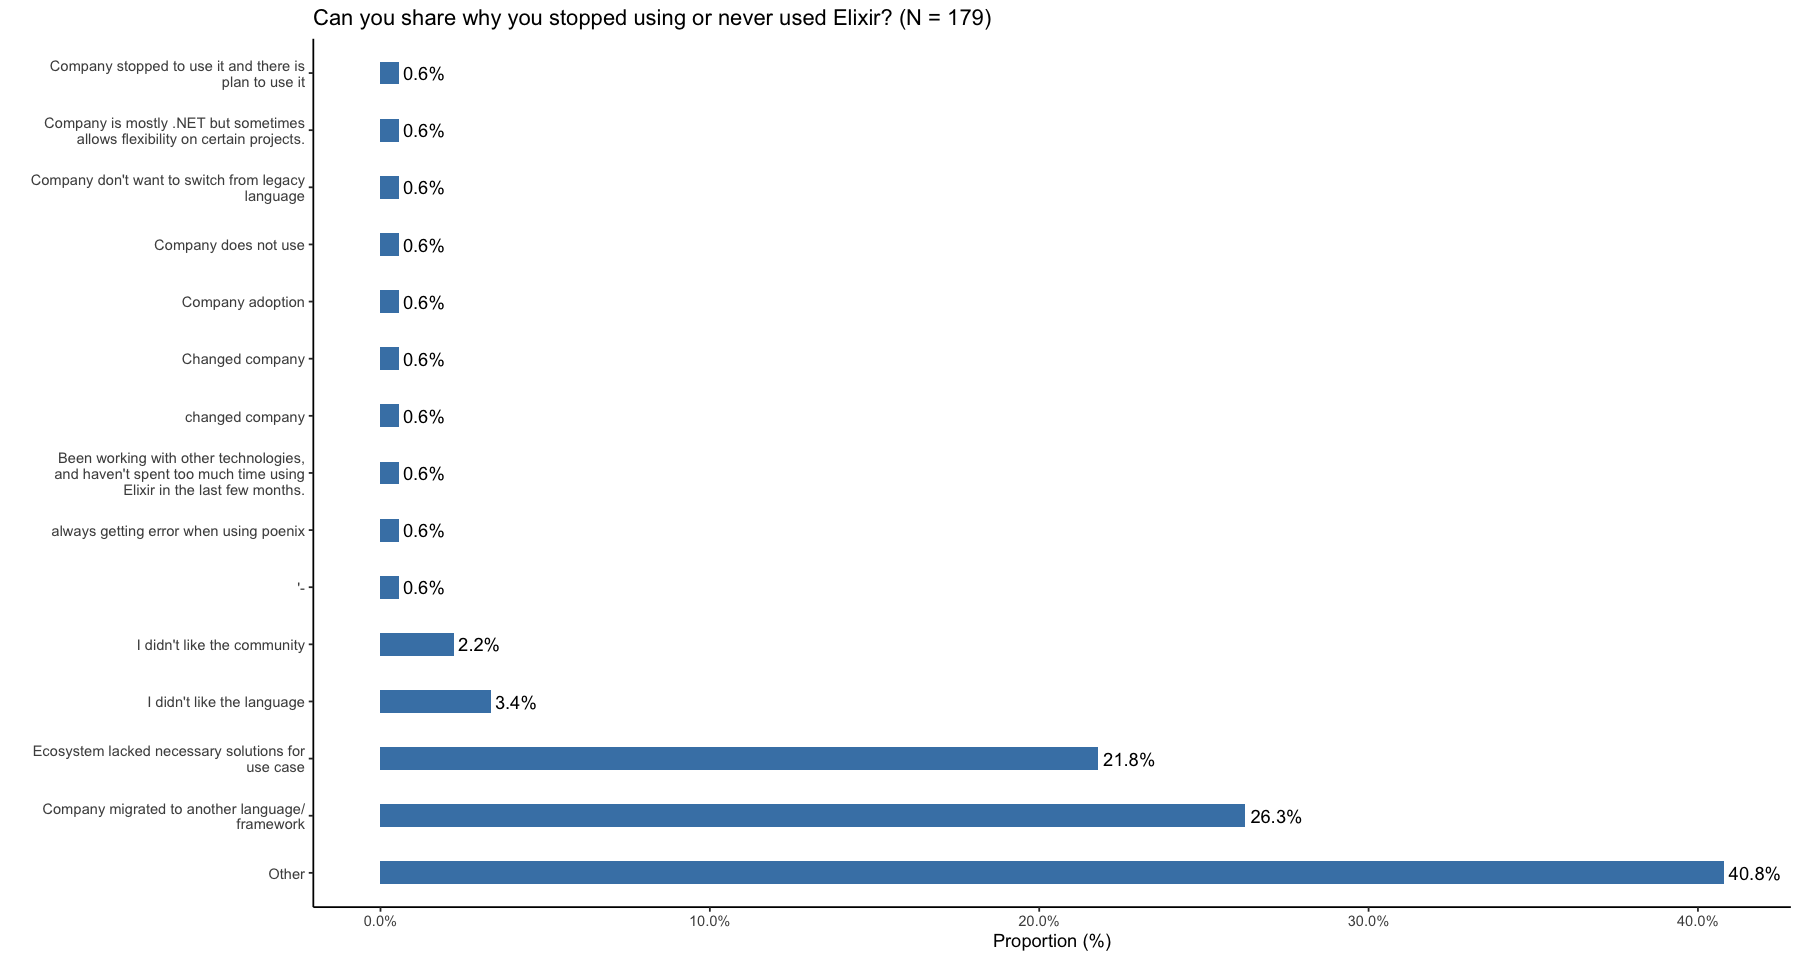


[[4]]


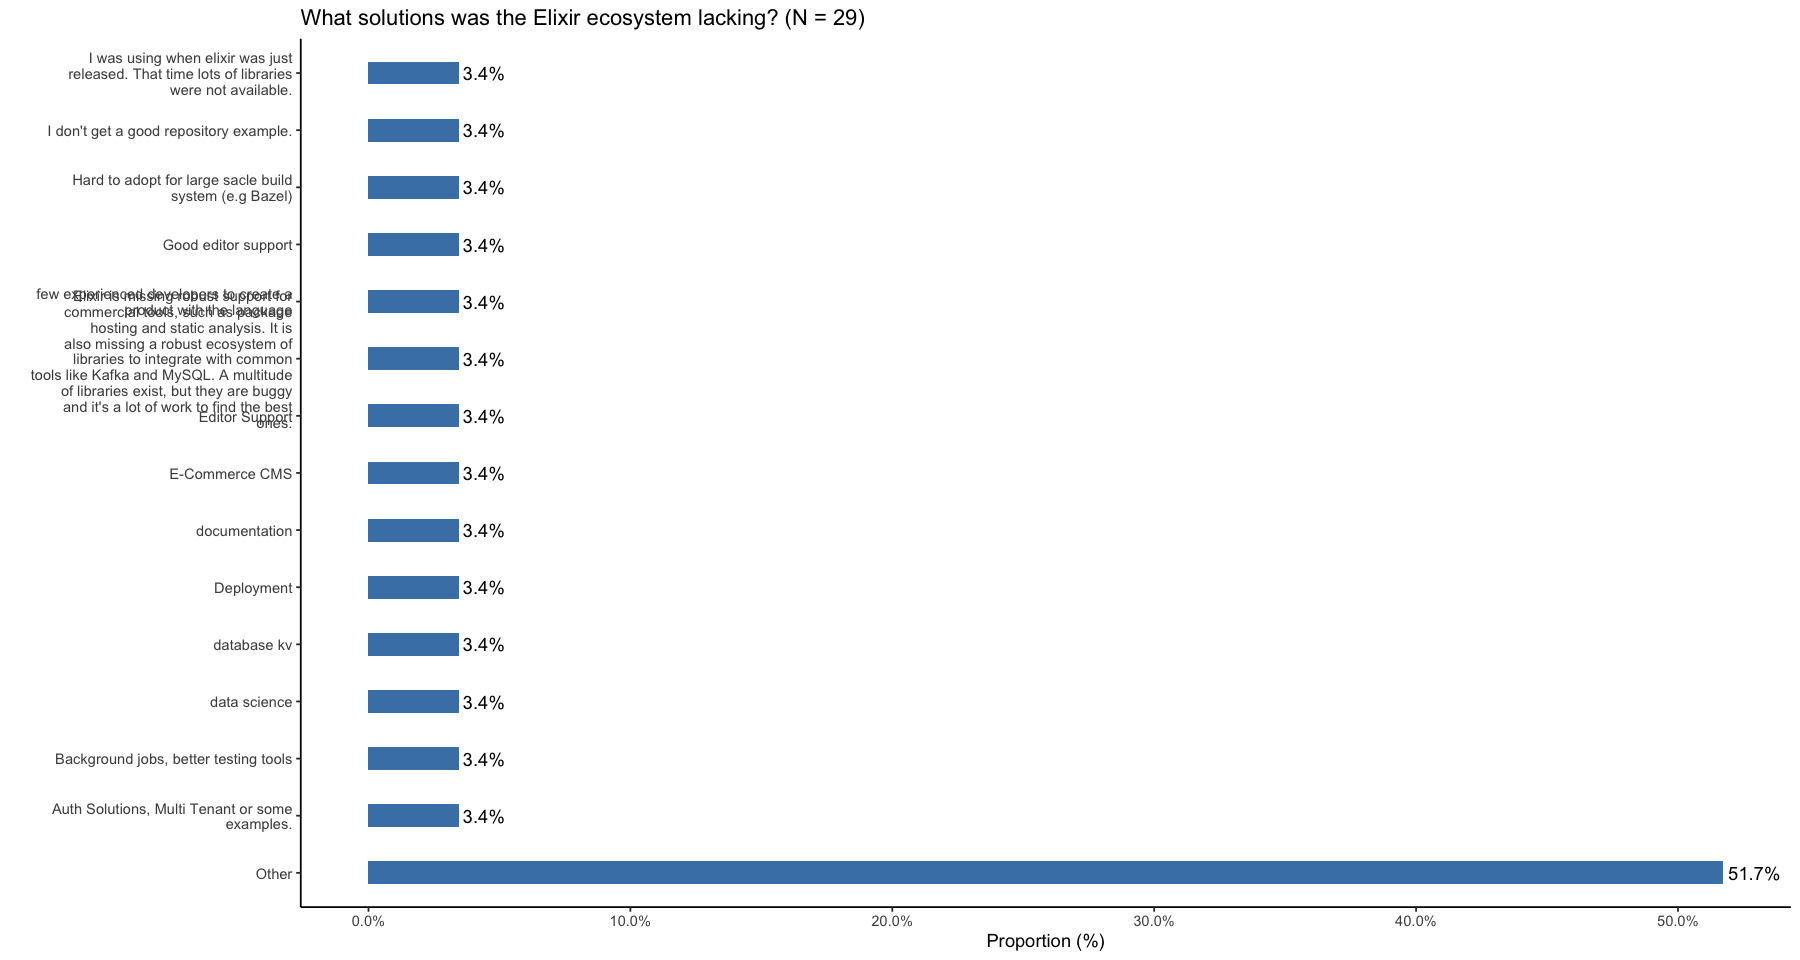


[[5]]


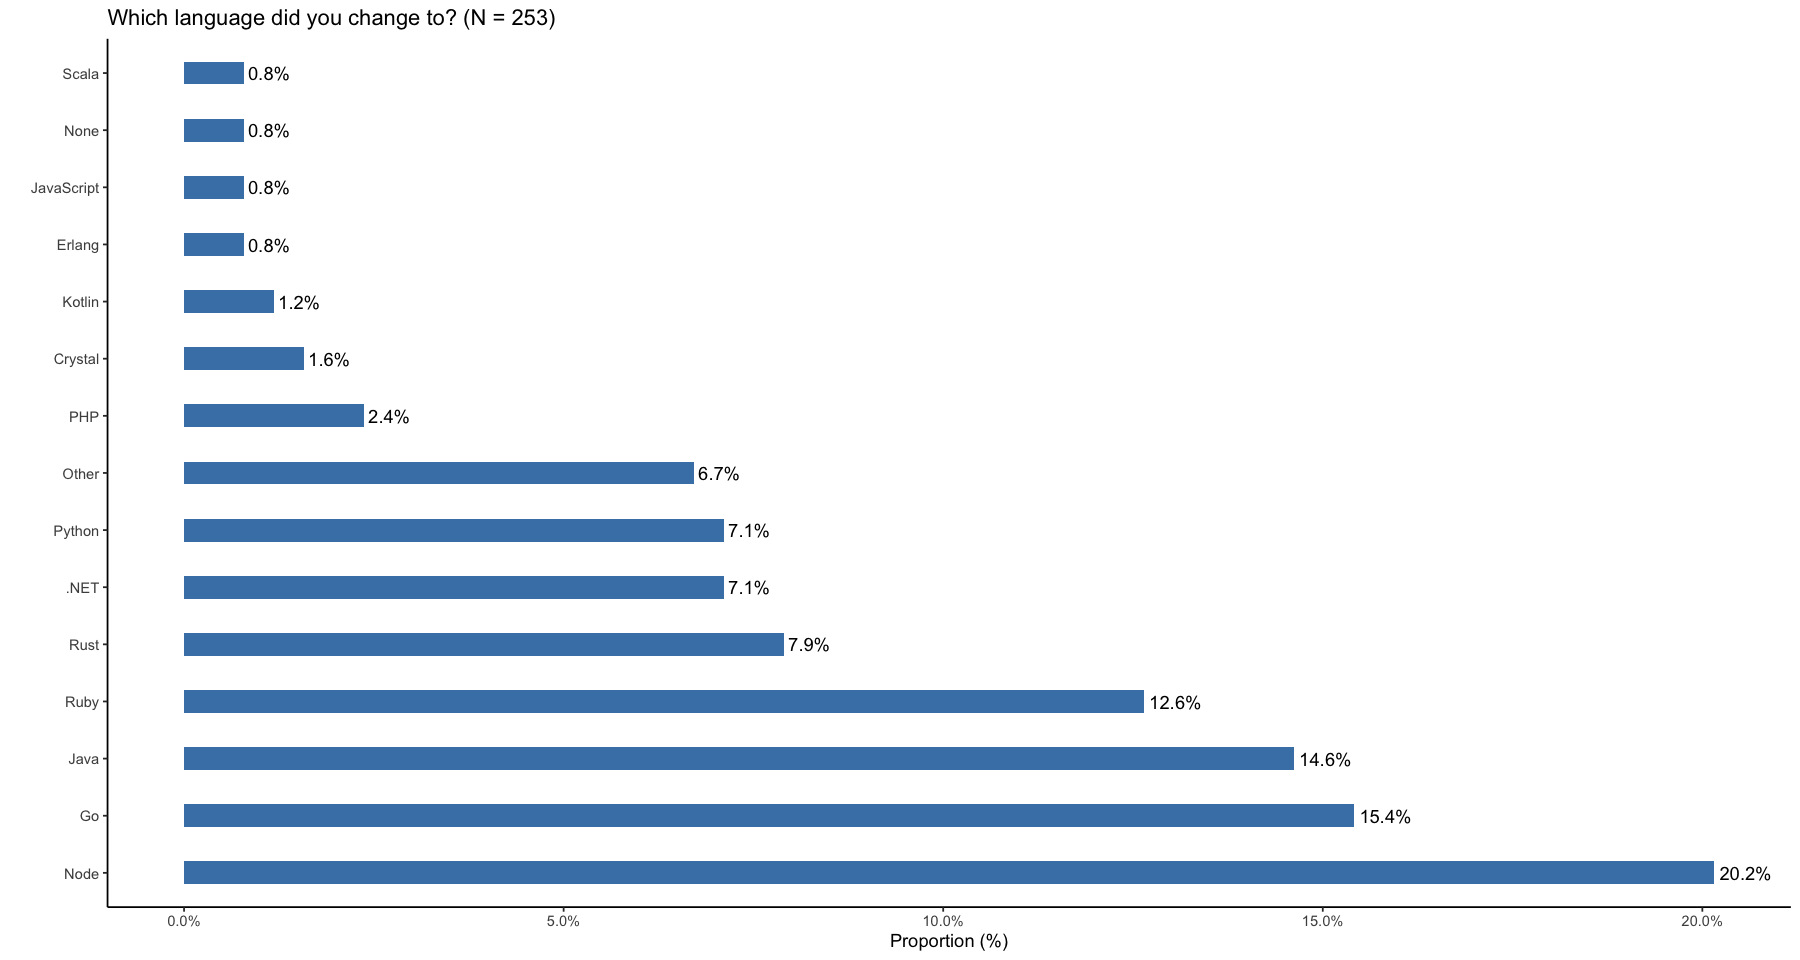


[[6]]


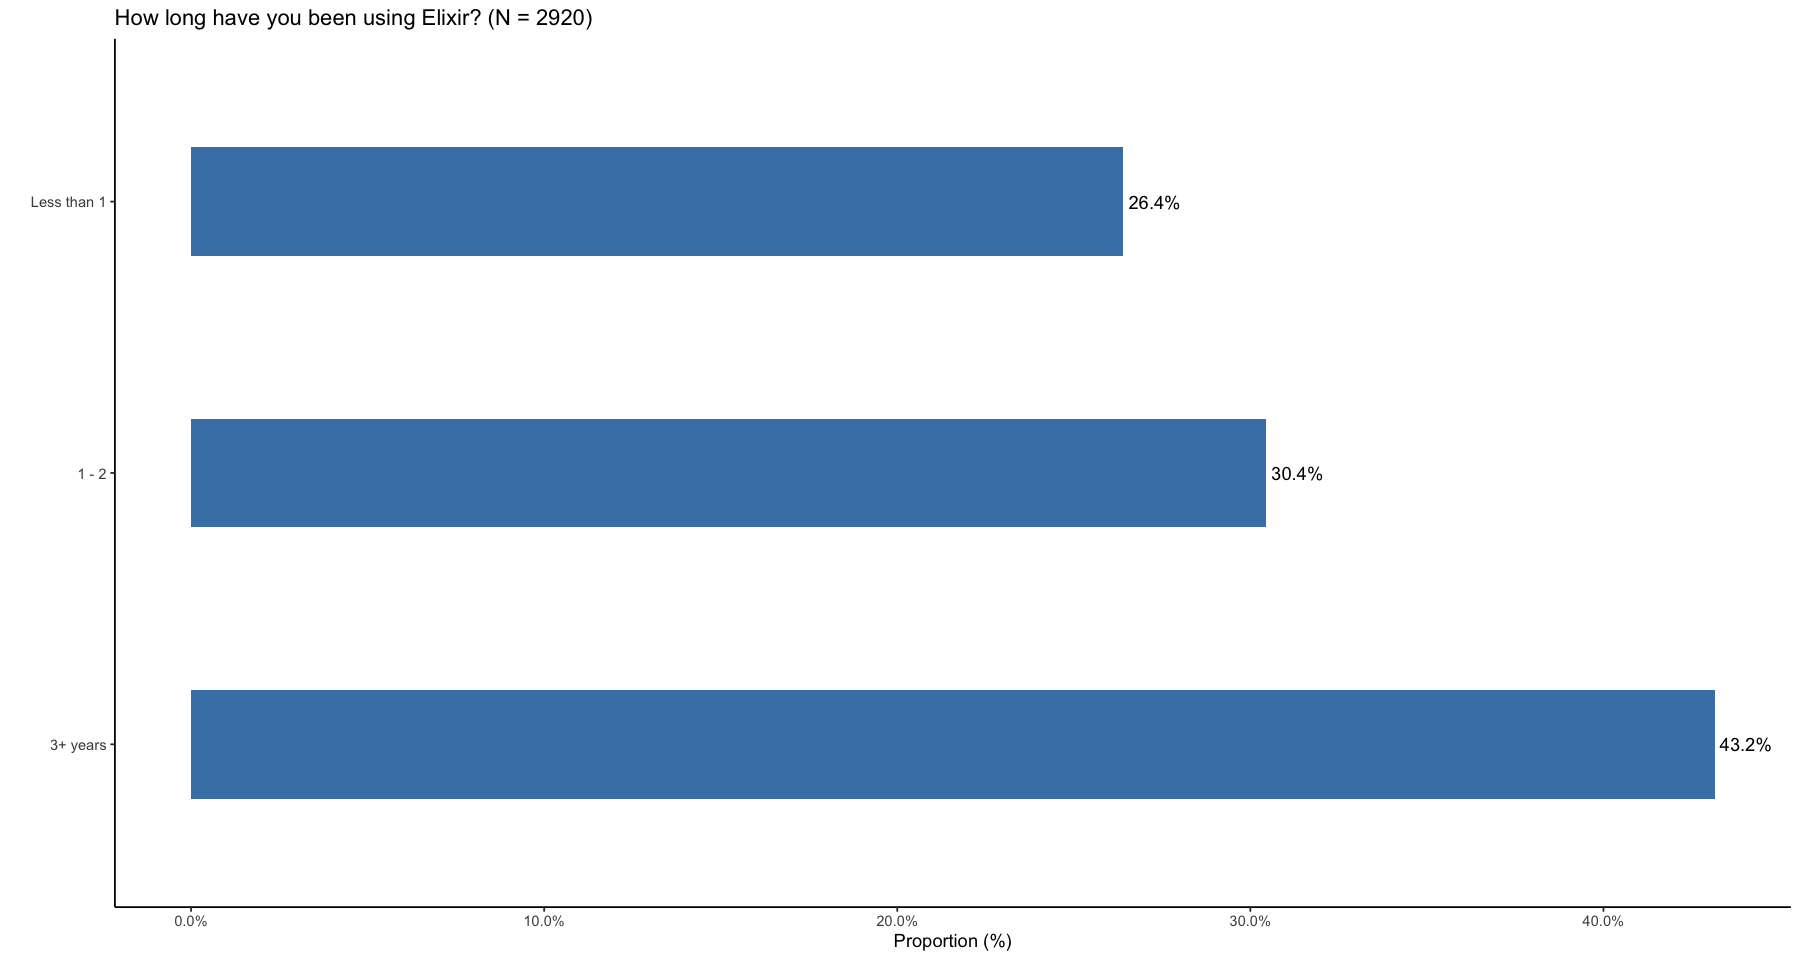


[[7]]


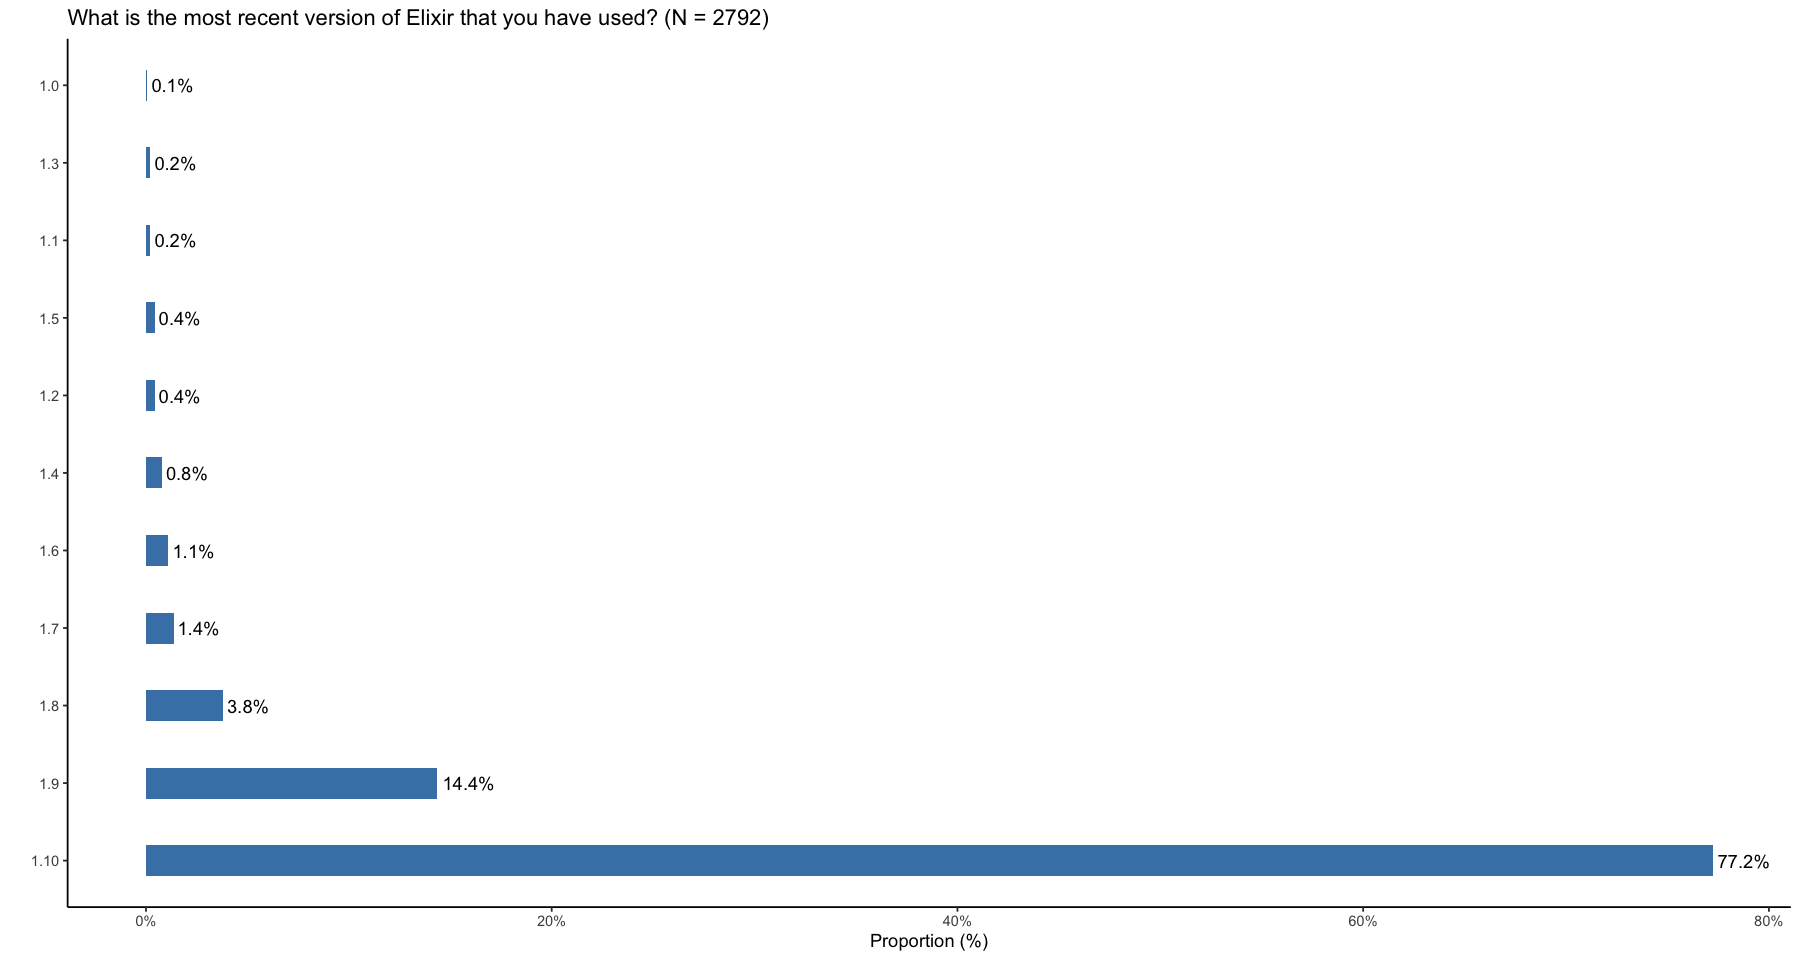


[[8]]


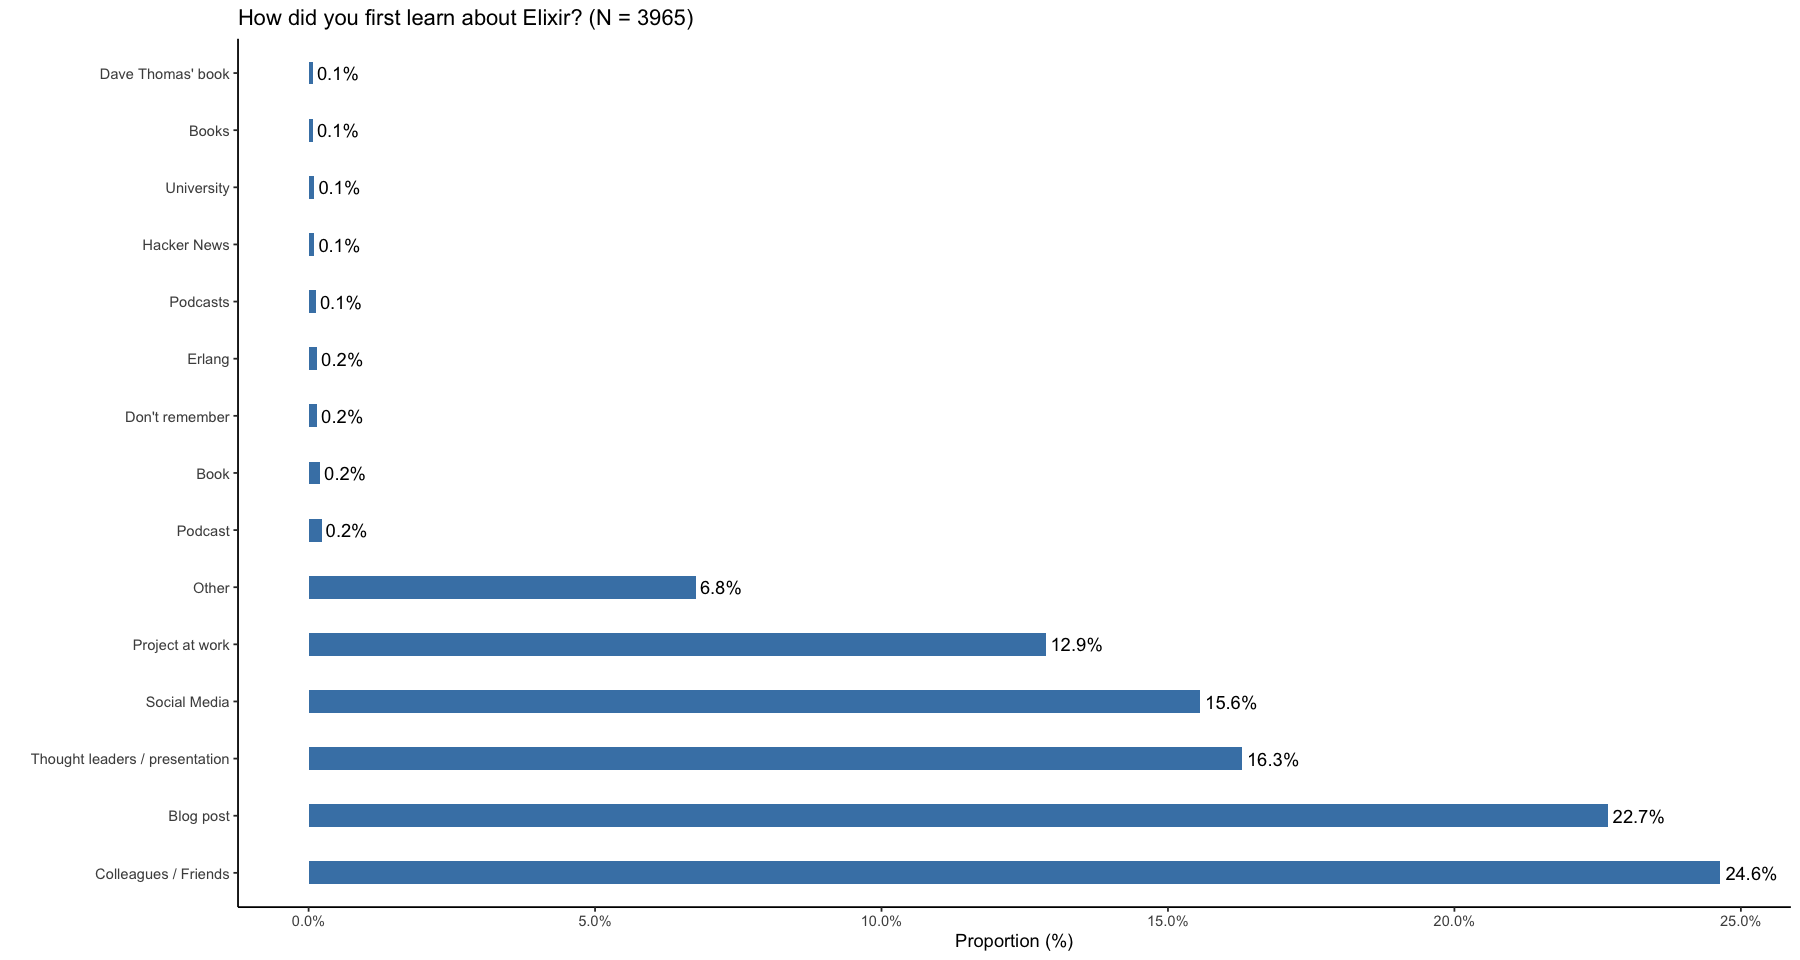


[[9]]


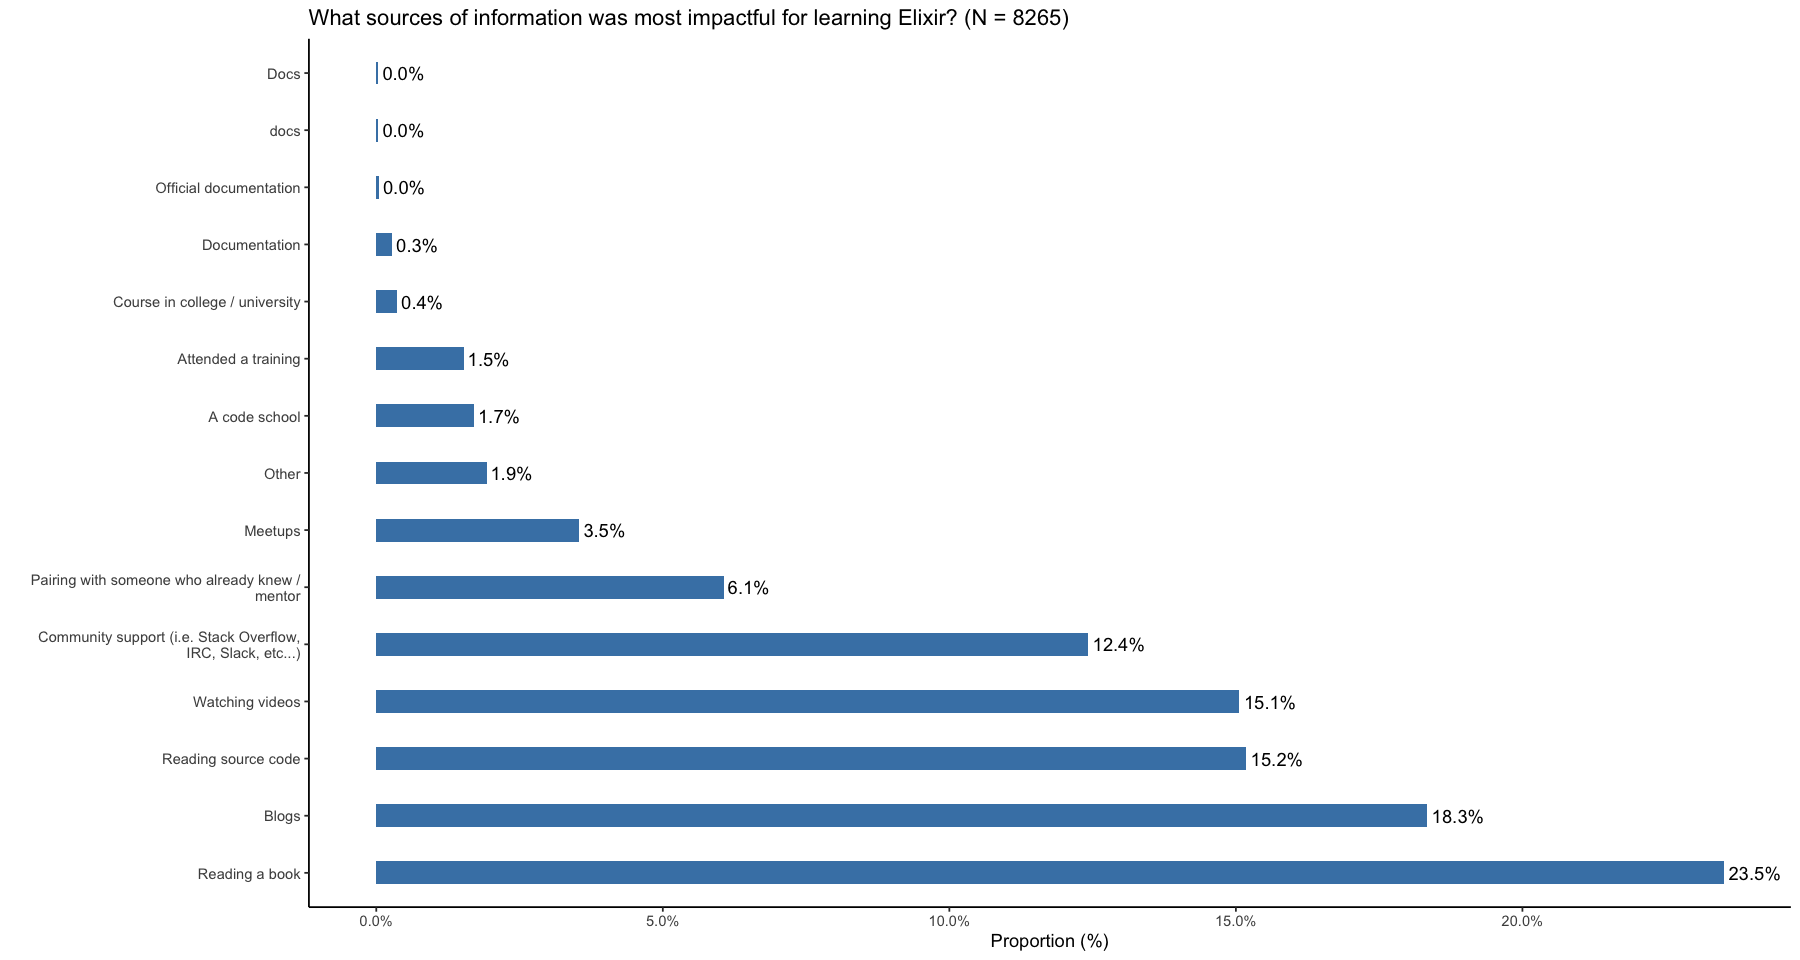


[[10]]


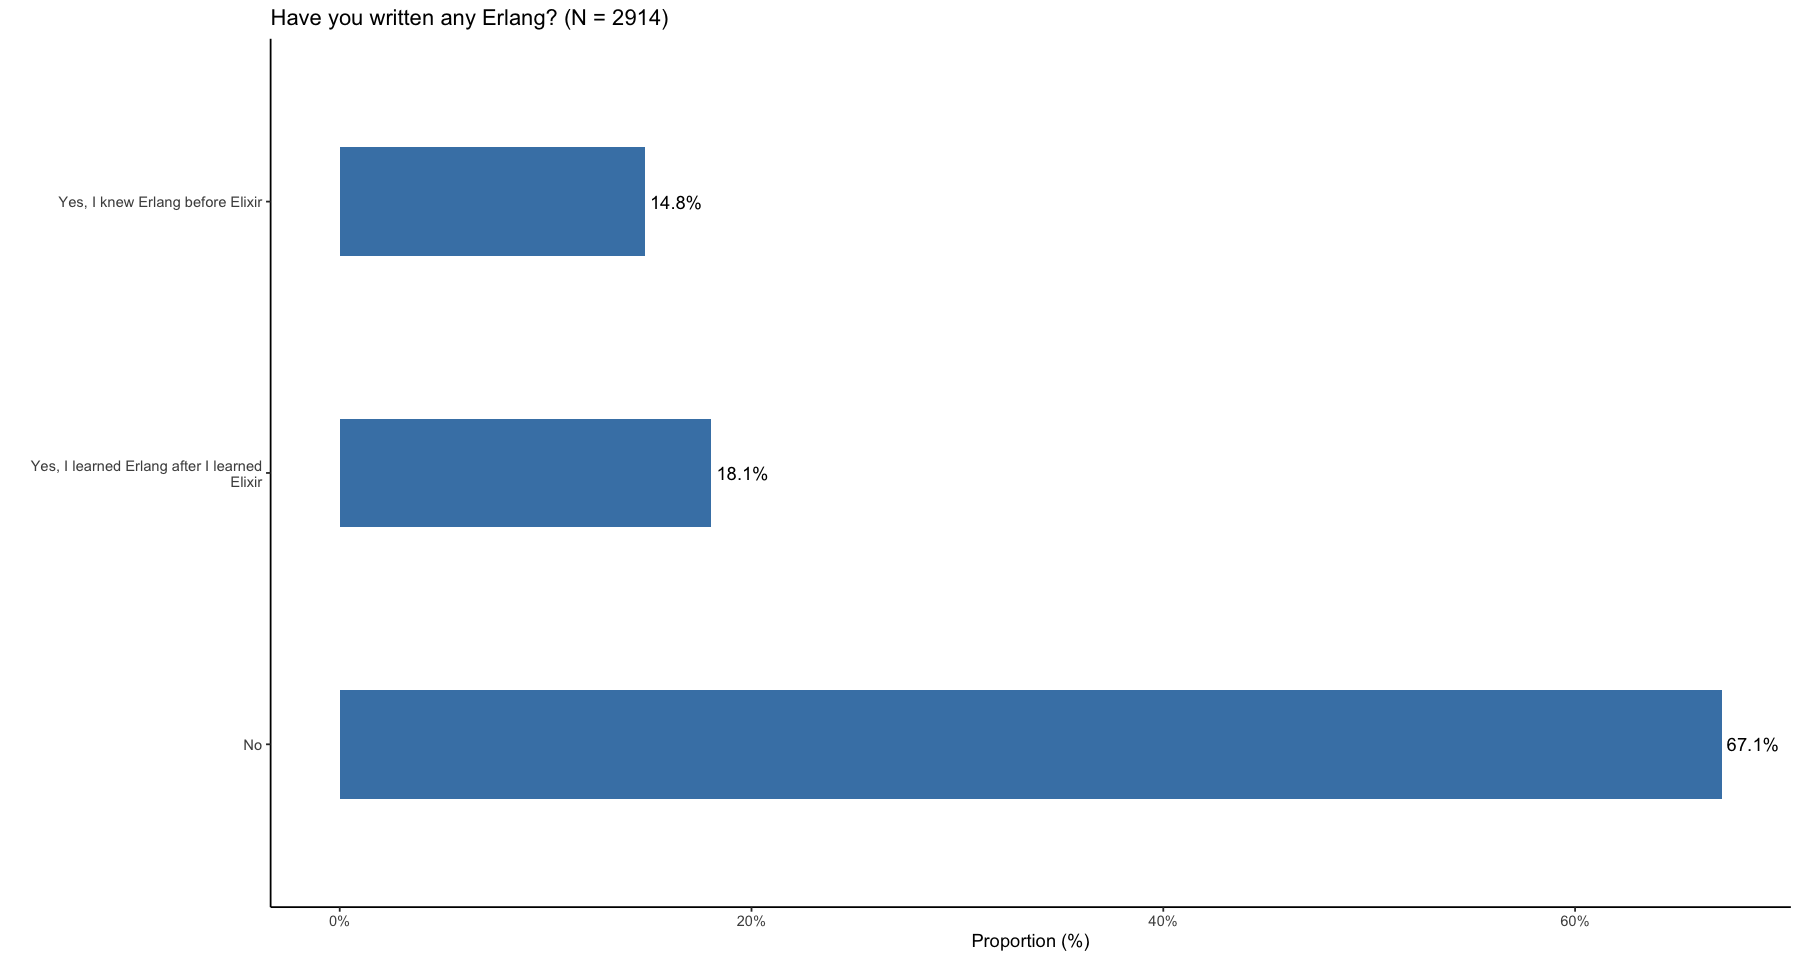


[[11]]


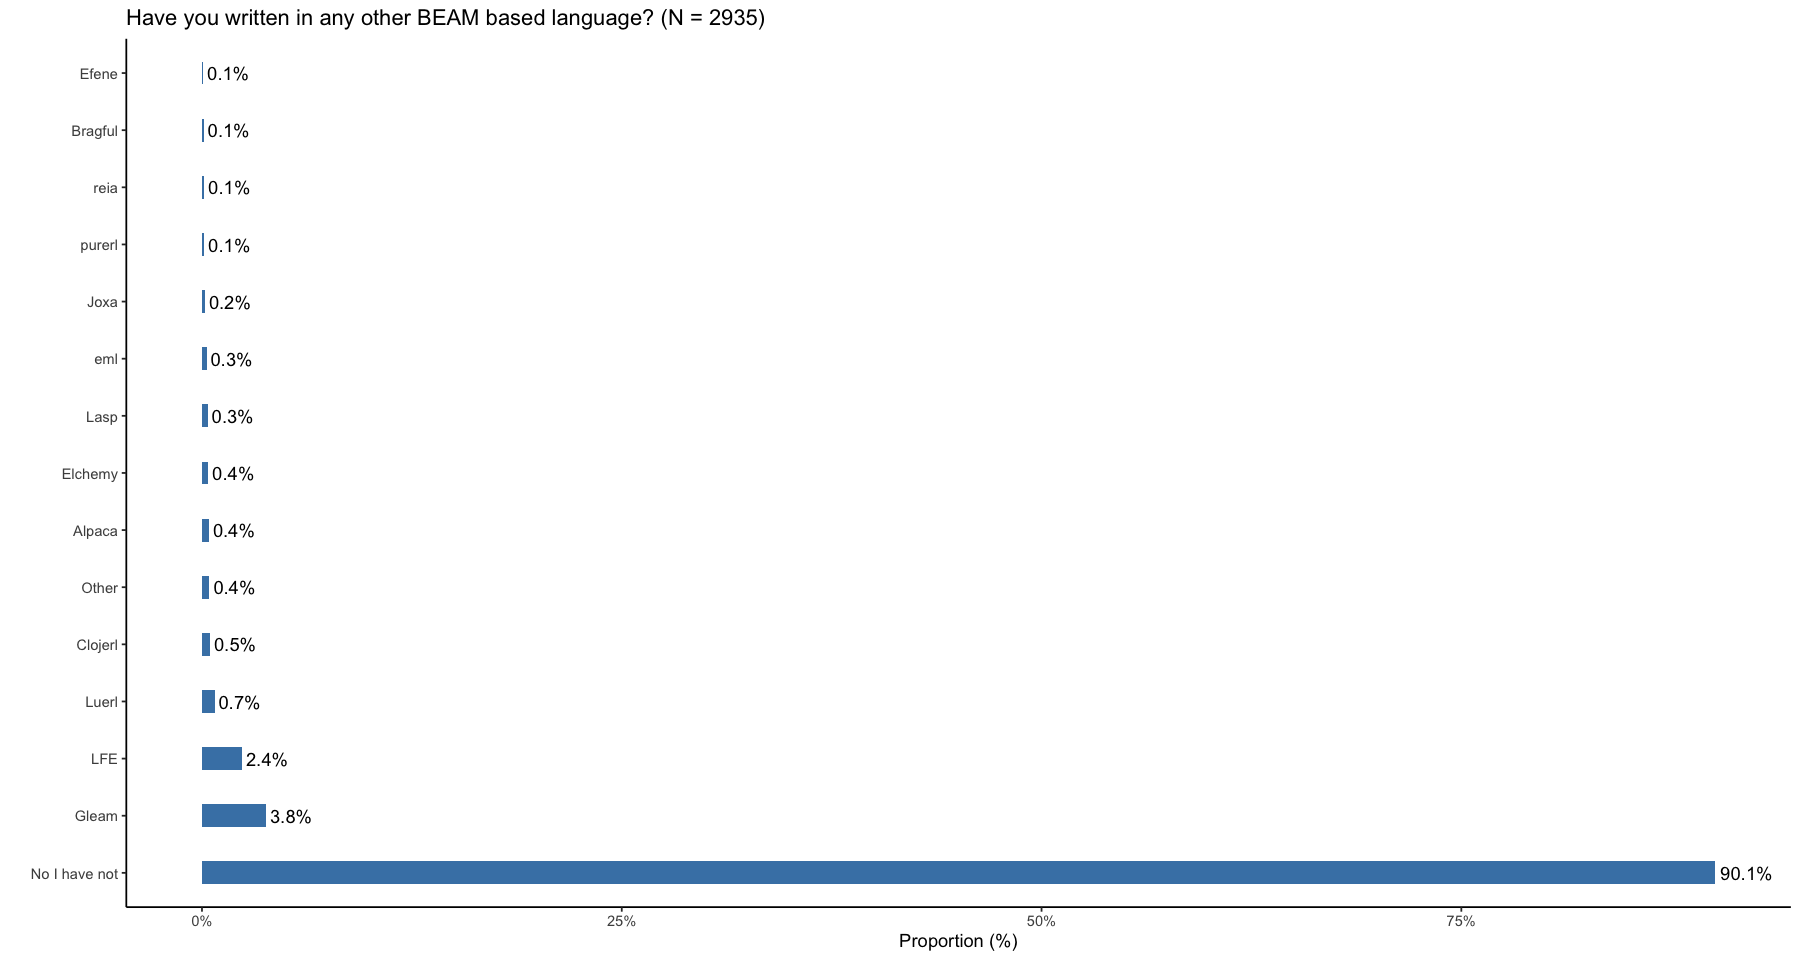


[[12]]


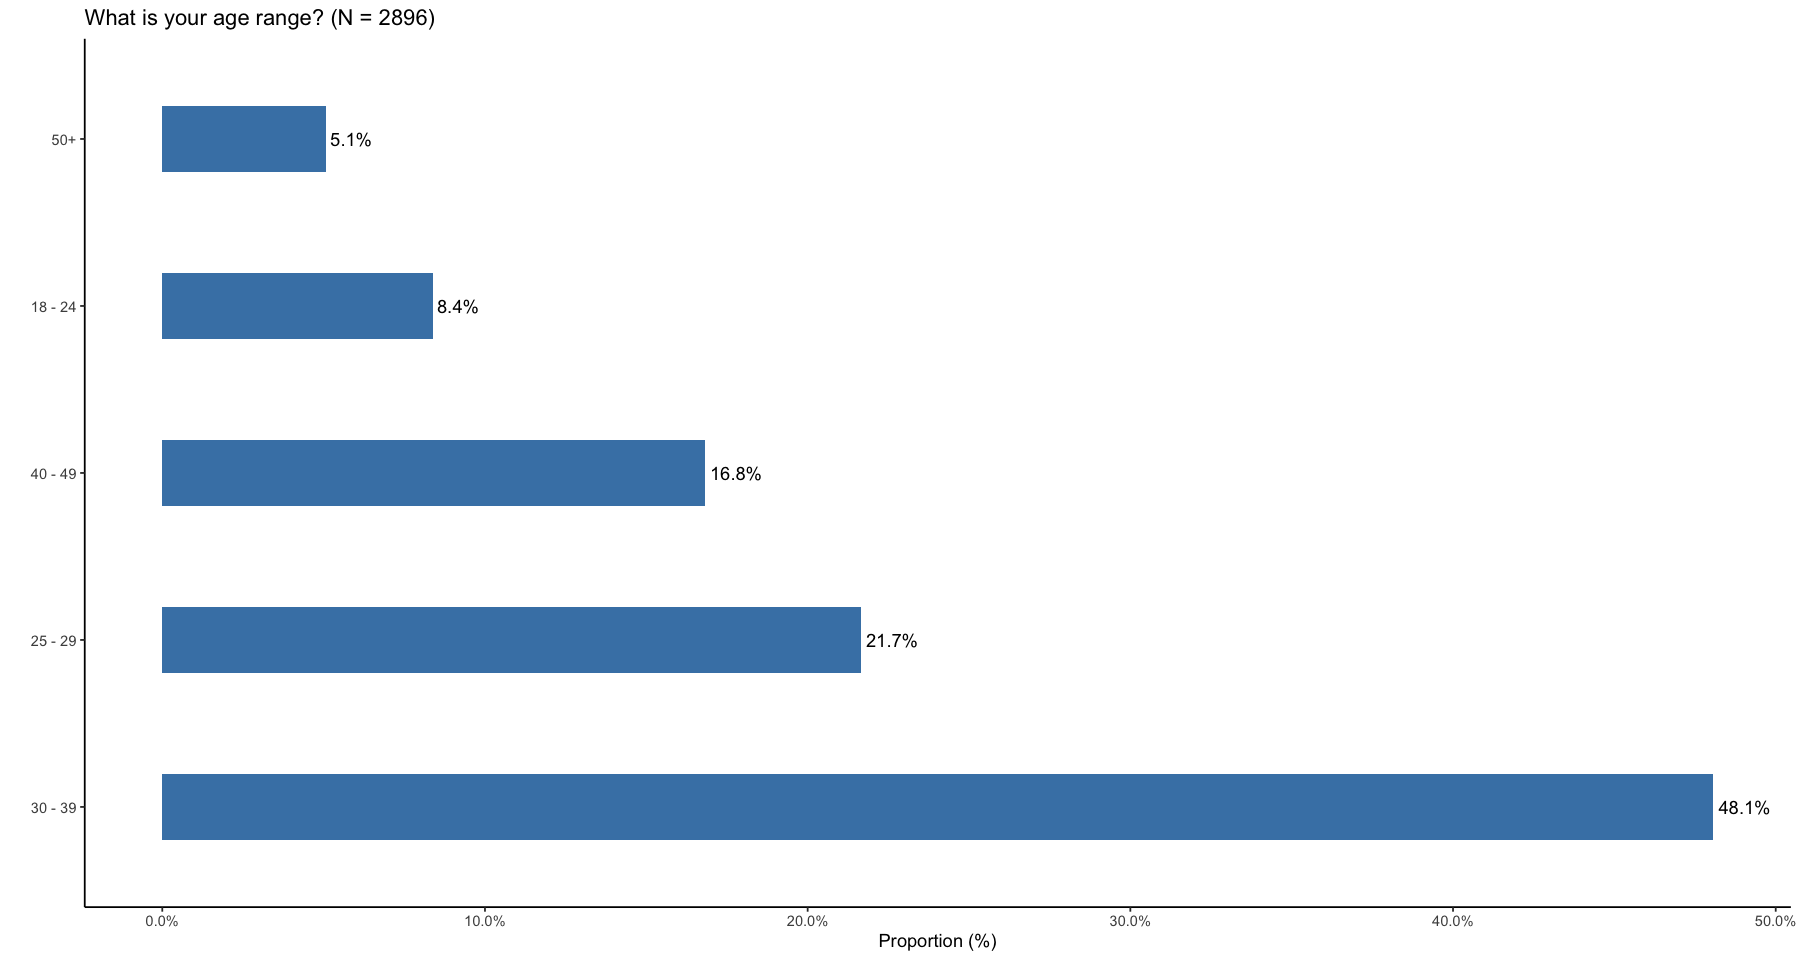


[[13]]


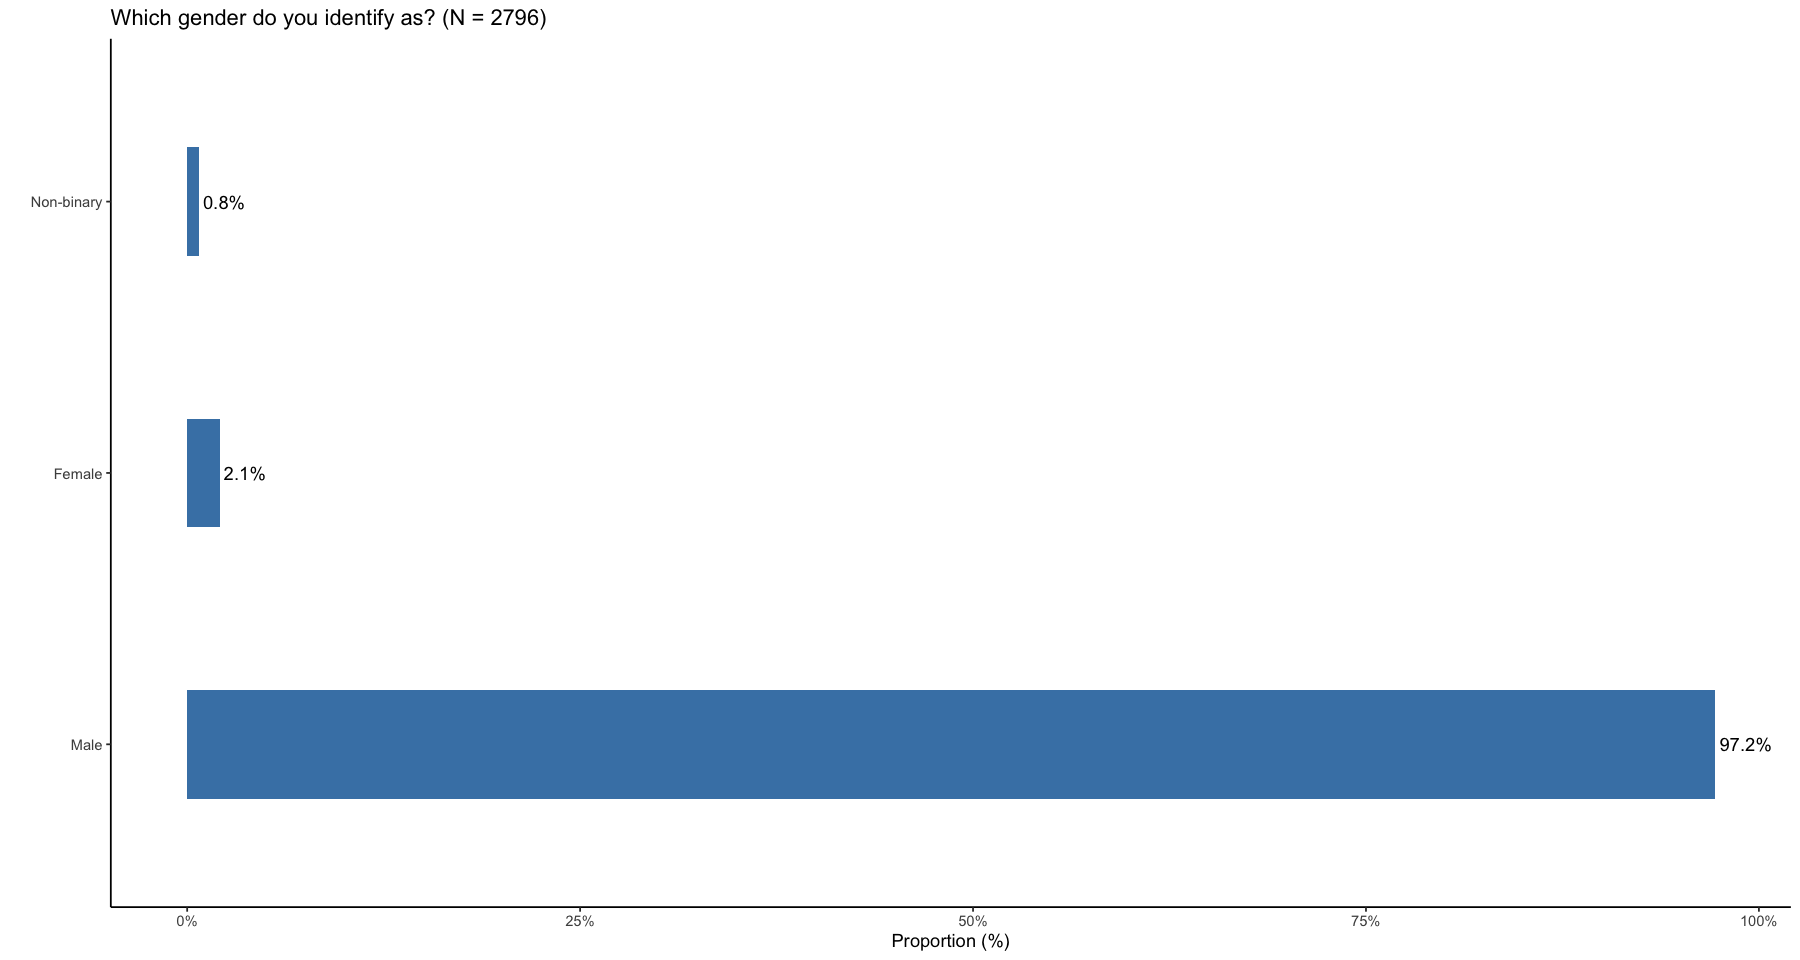


[[14]]


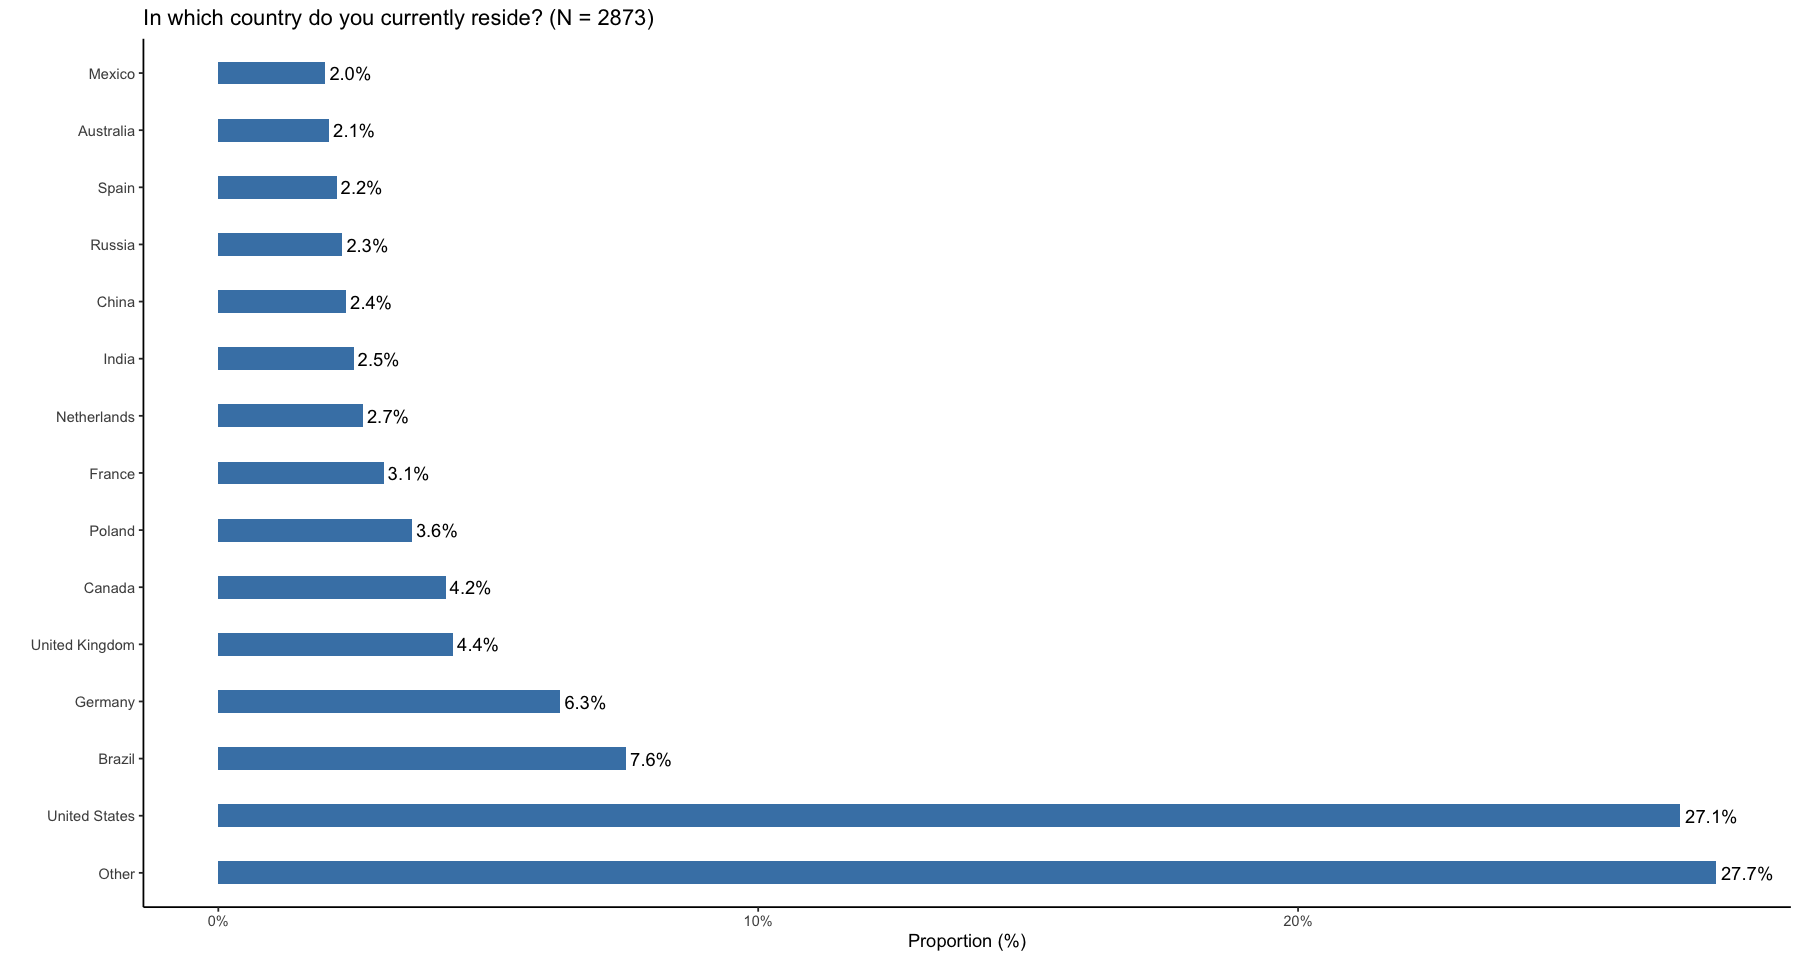


[[15]]


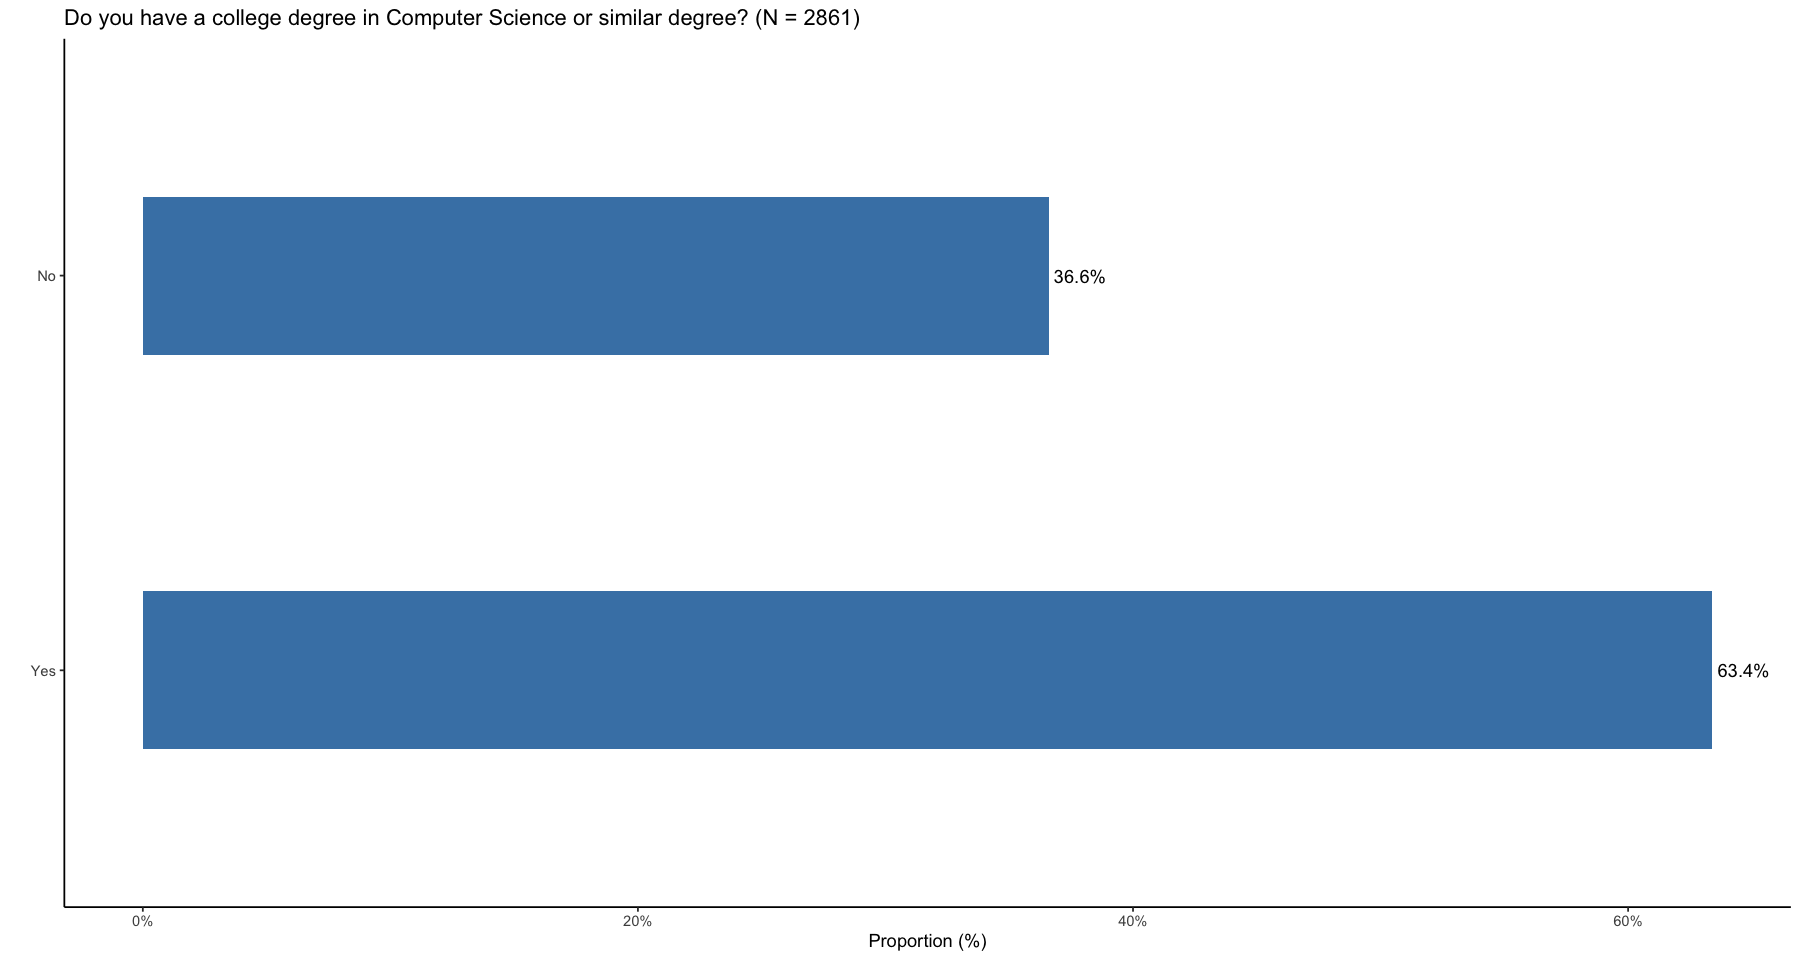


[[16]]


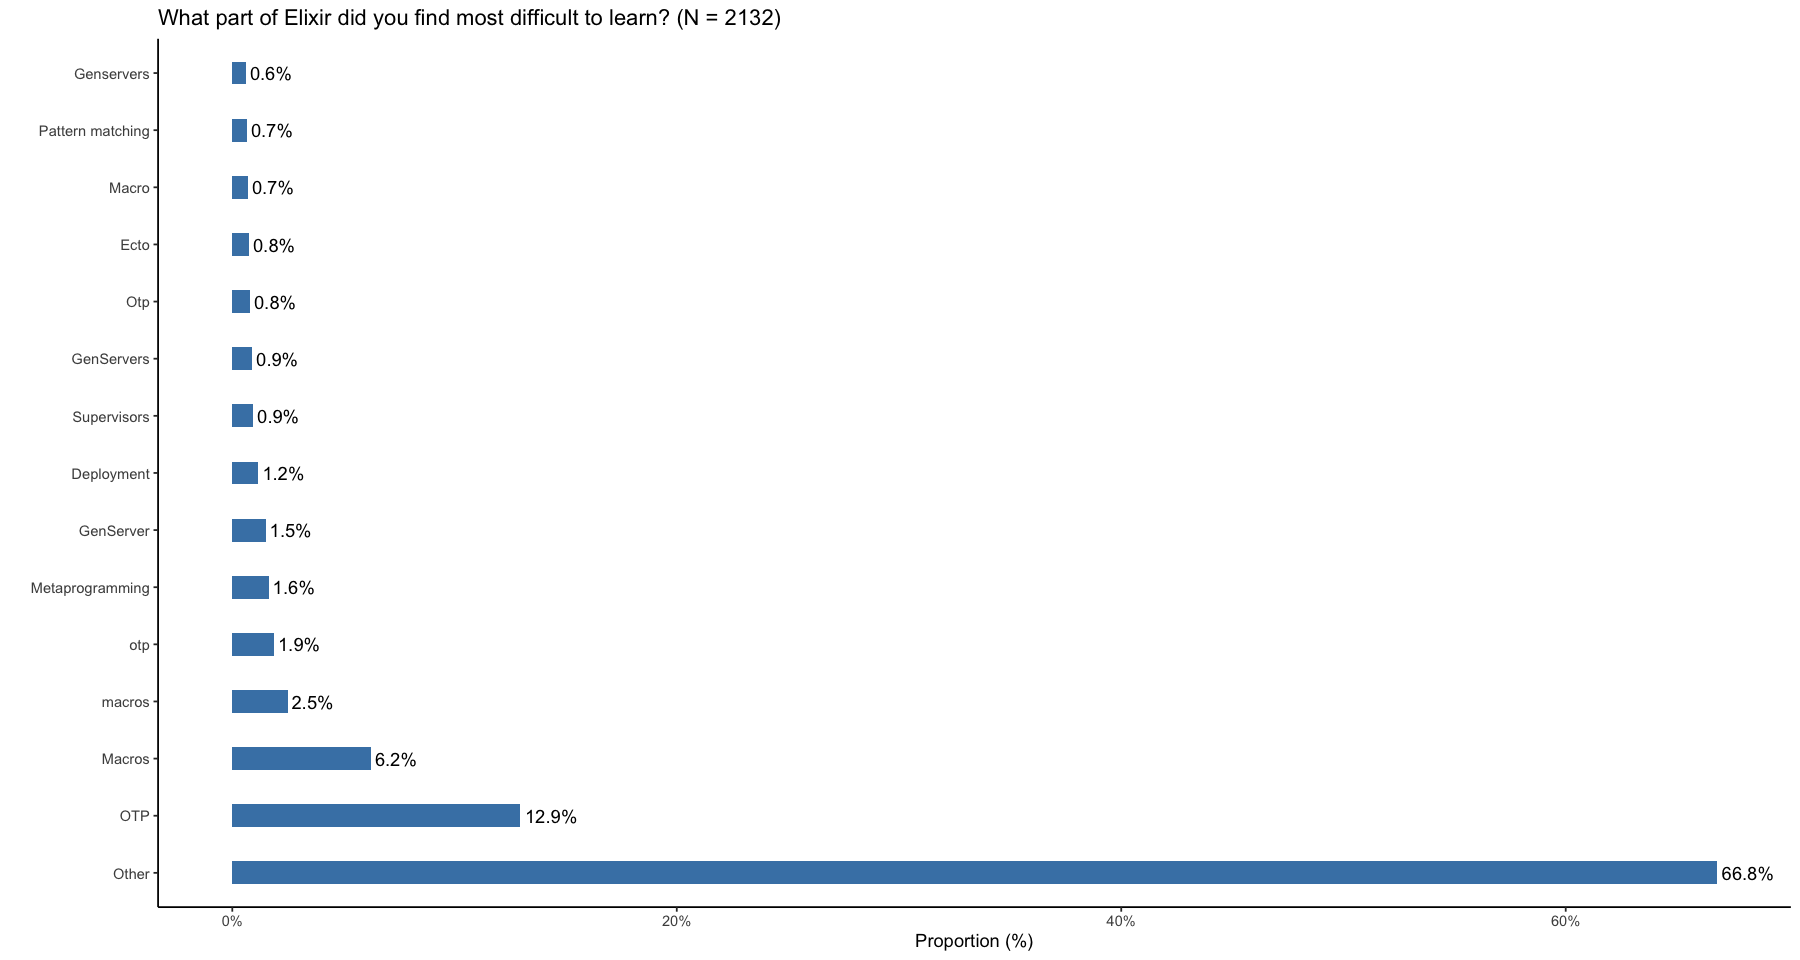


[[17]]


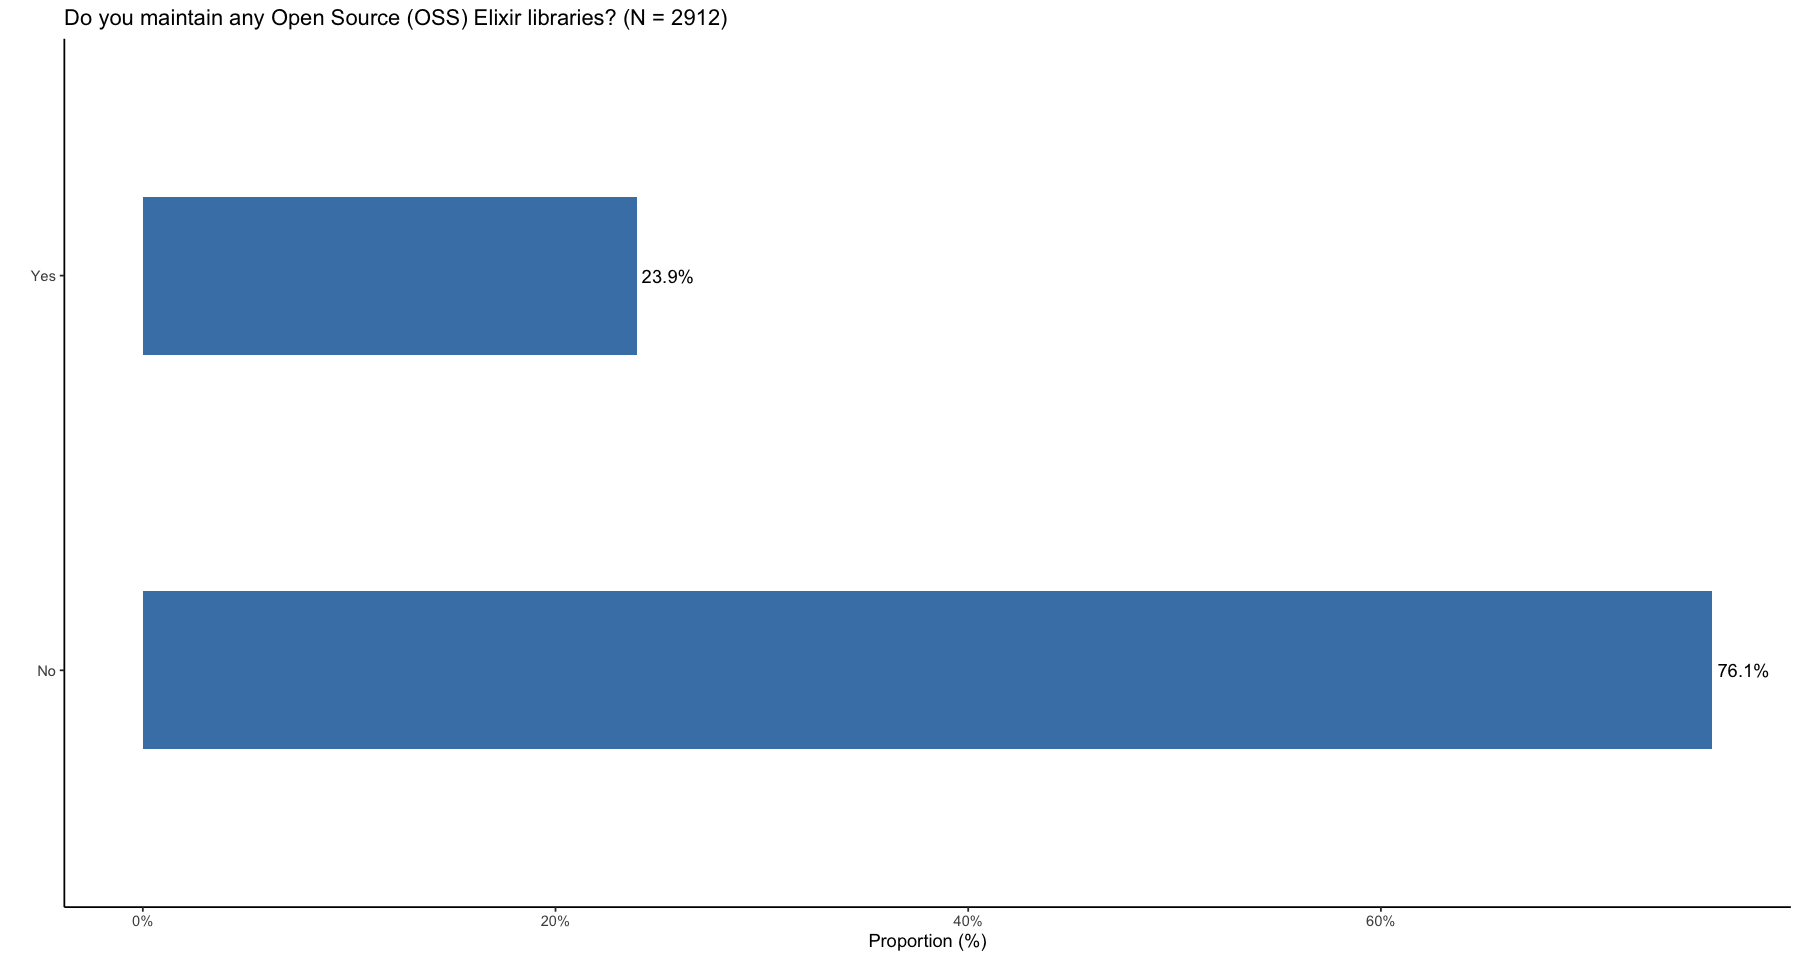


[[18]]


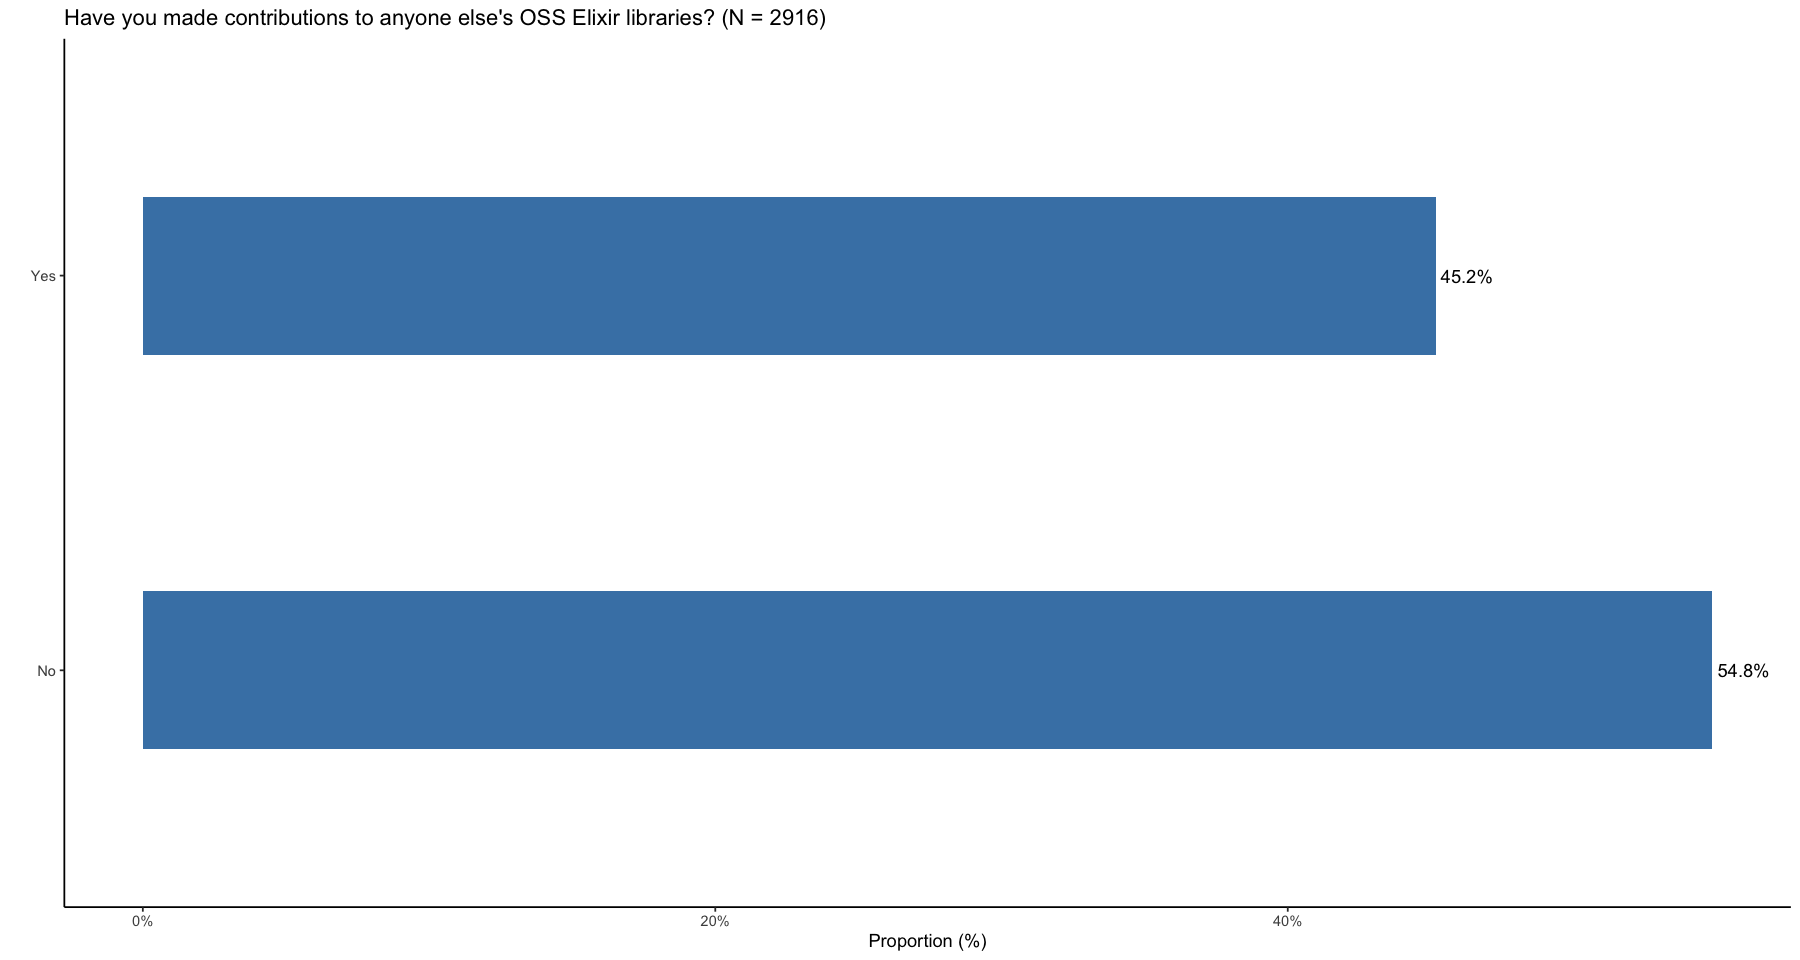


[[19]]


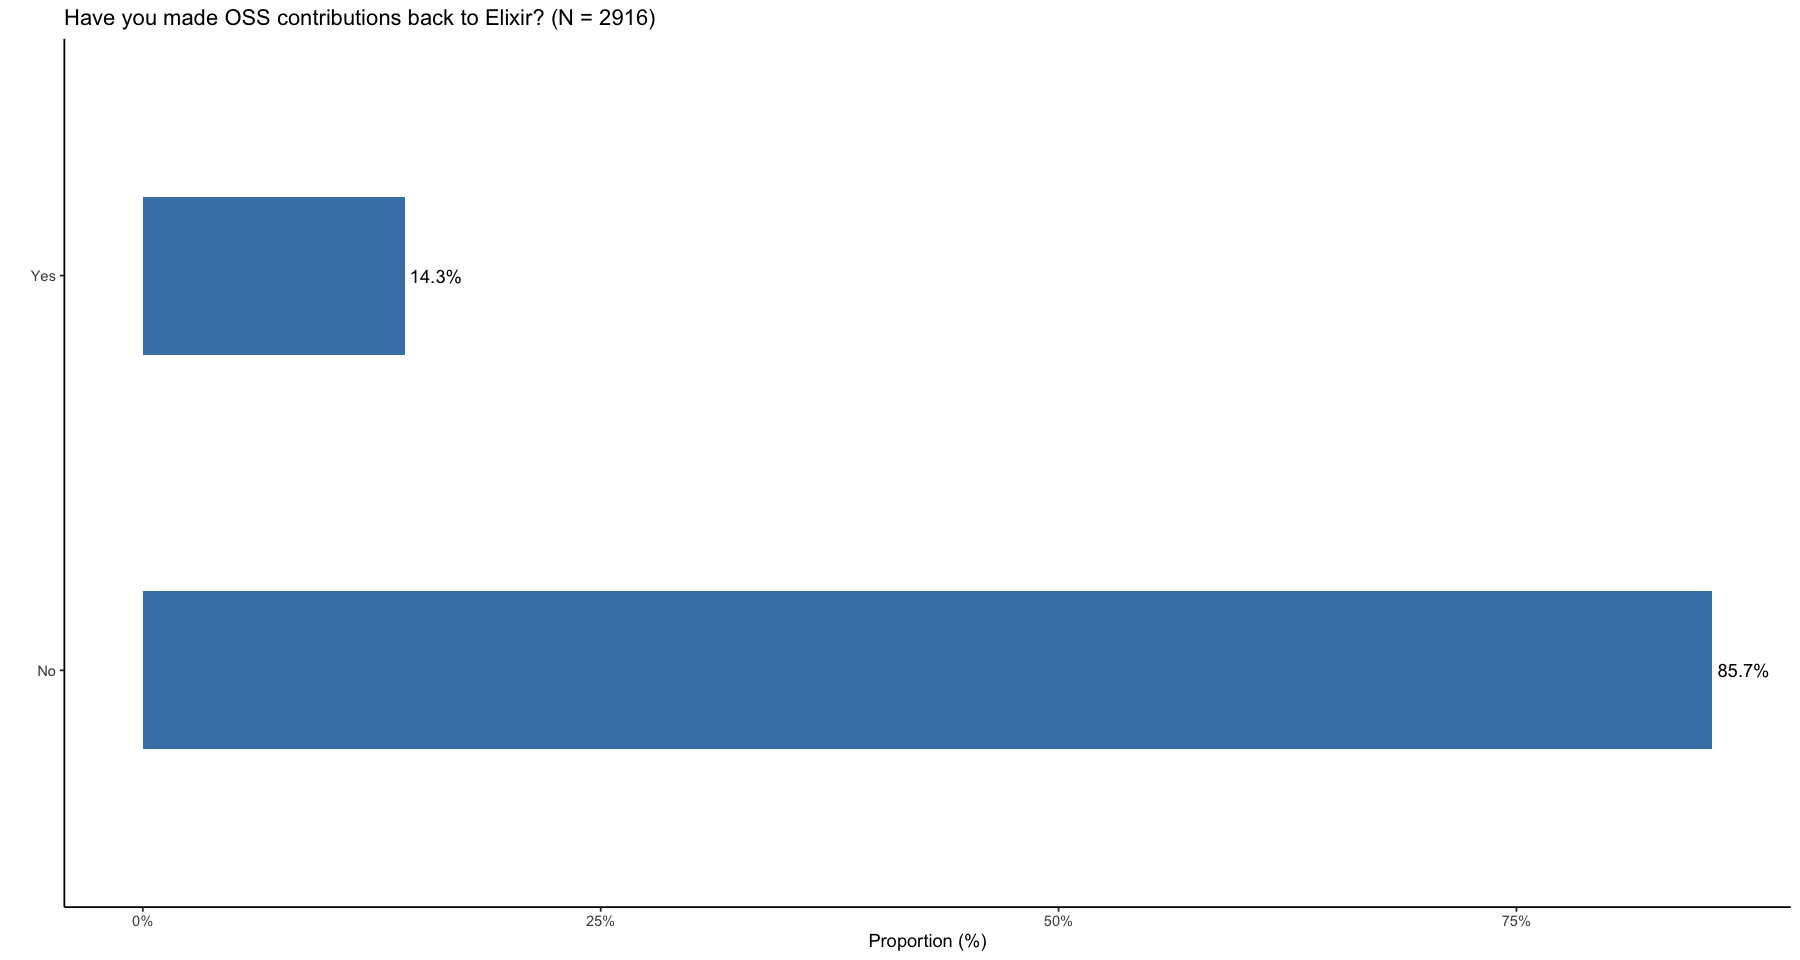


[[20]]


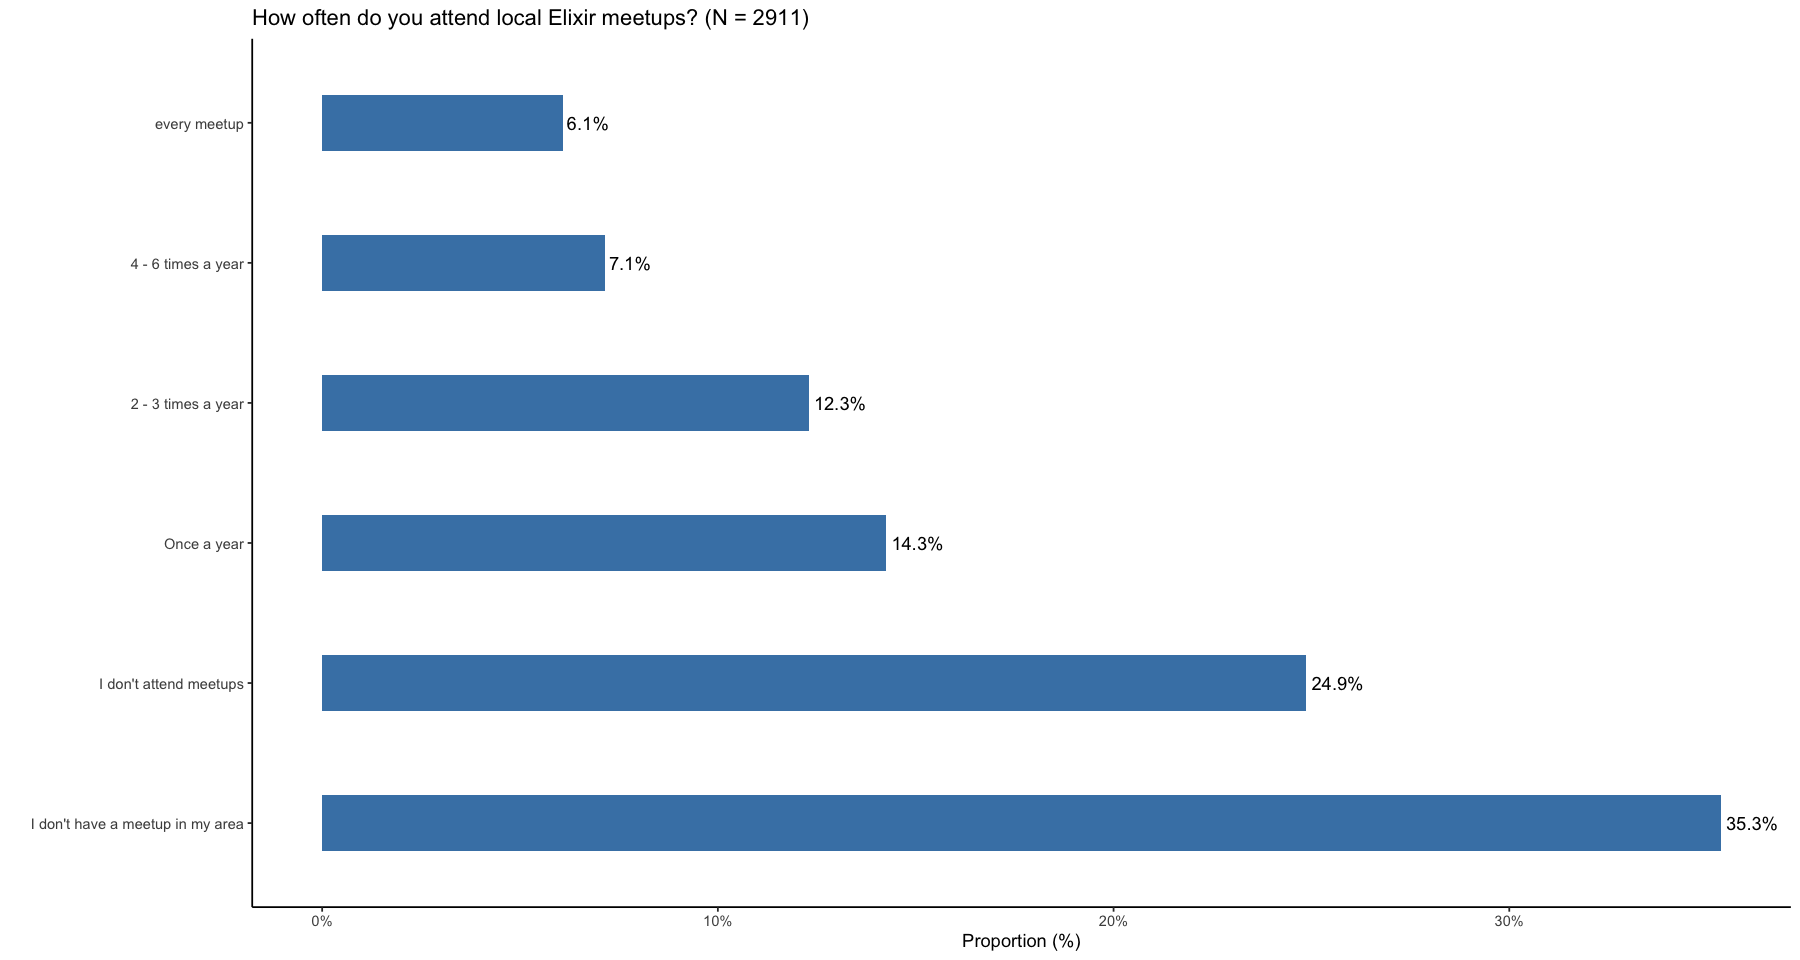


[[21]]


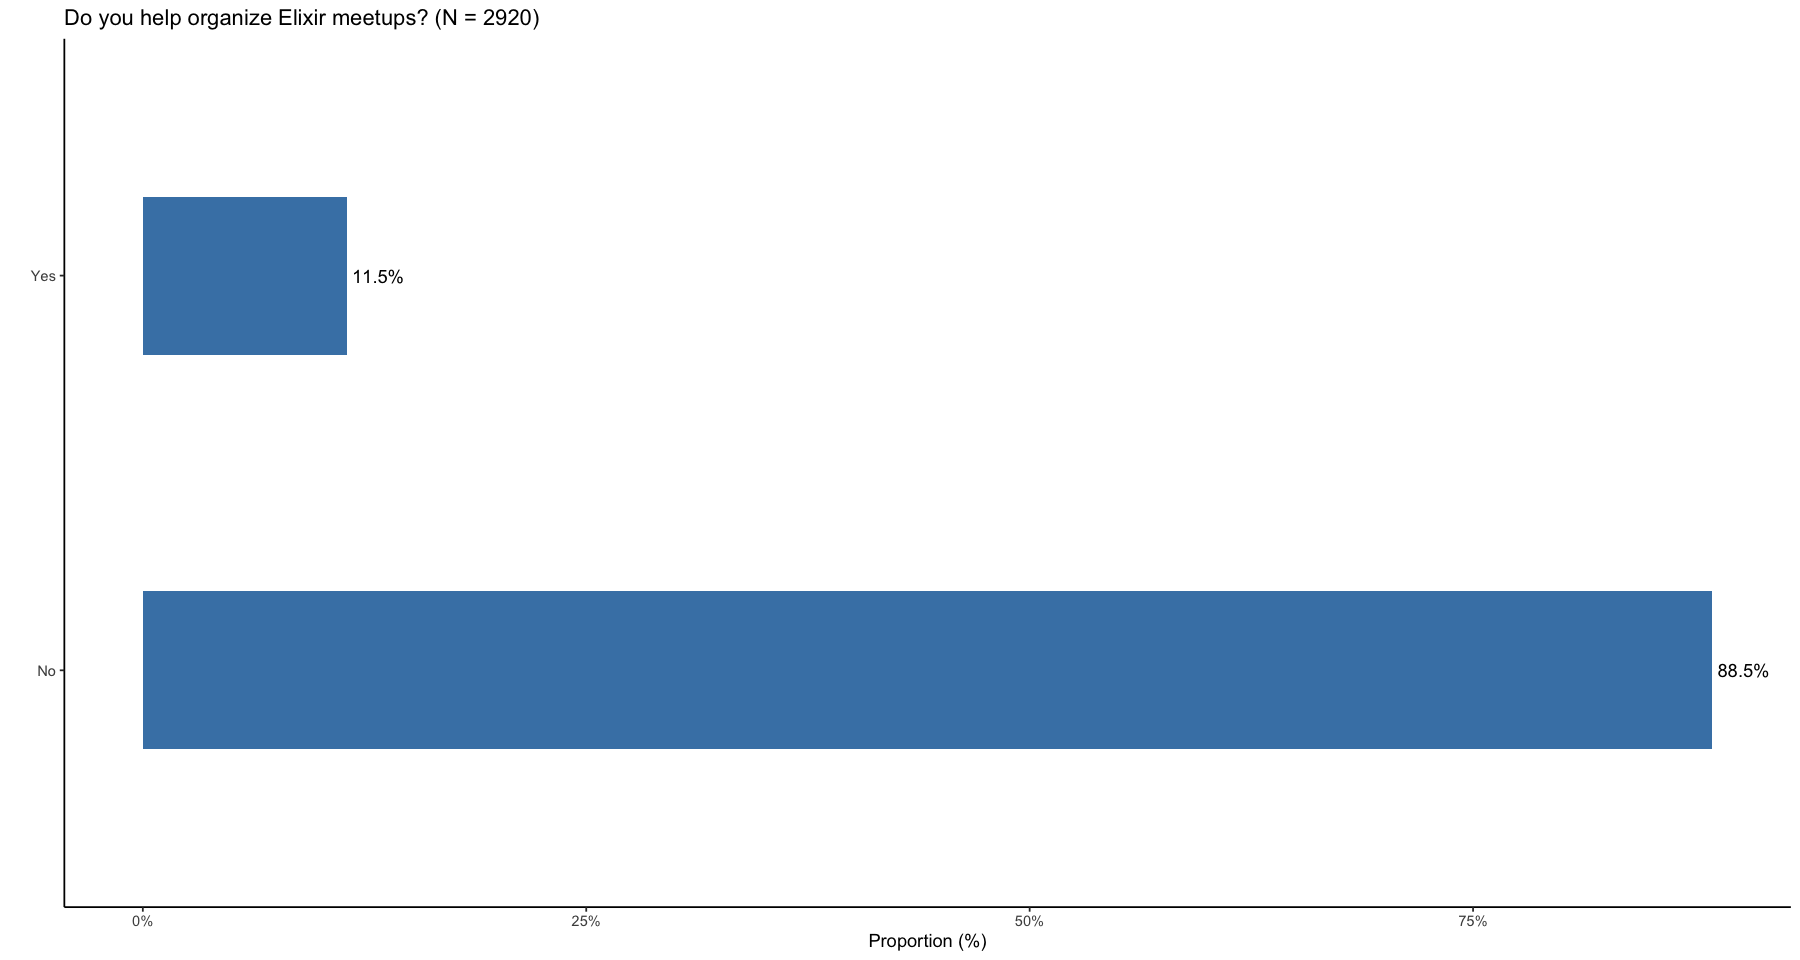


[[22]]


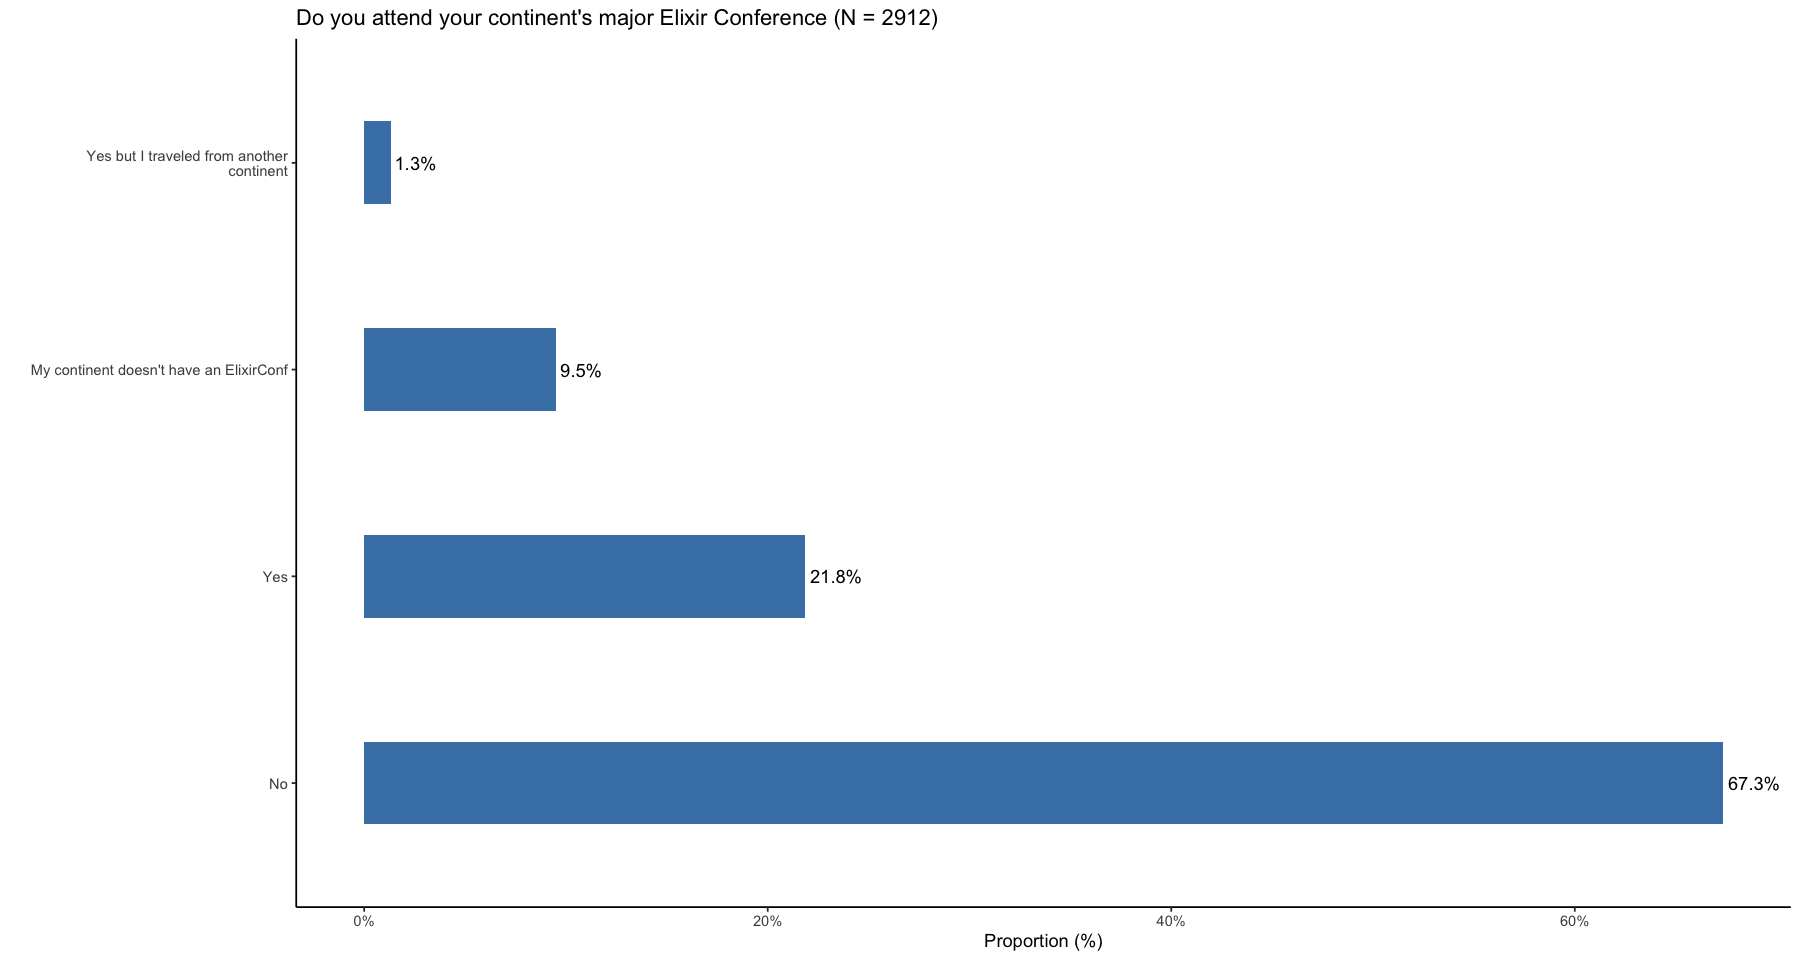


[[23]]


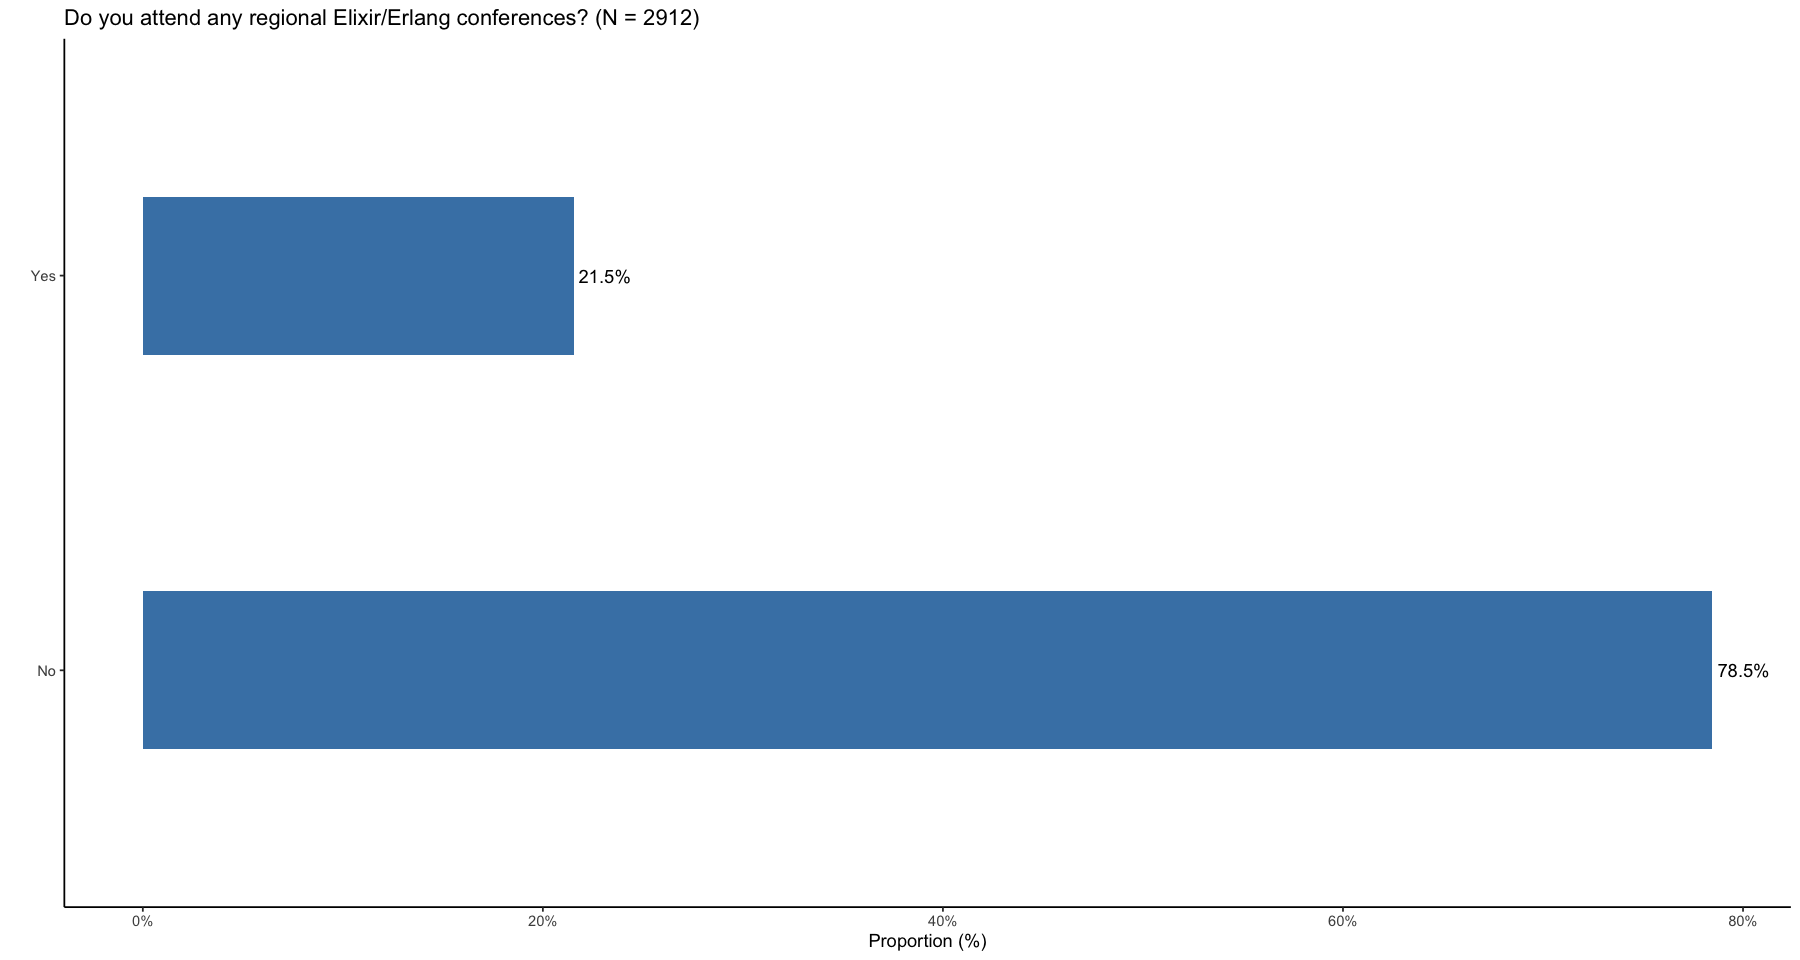


[[24]]


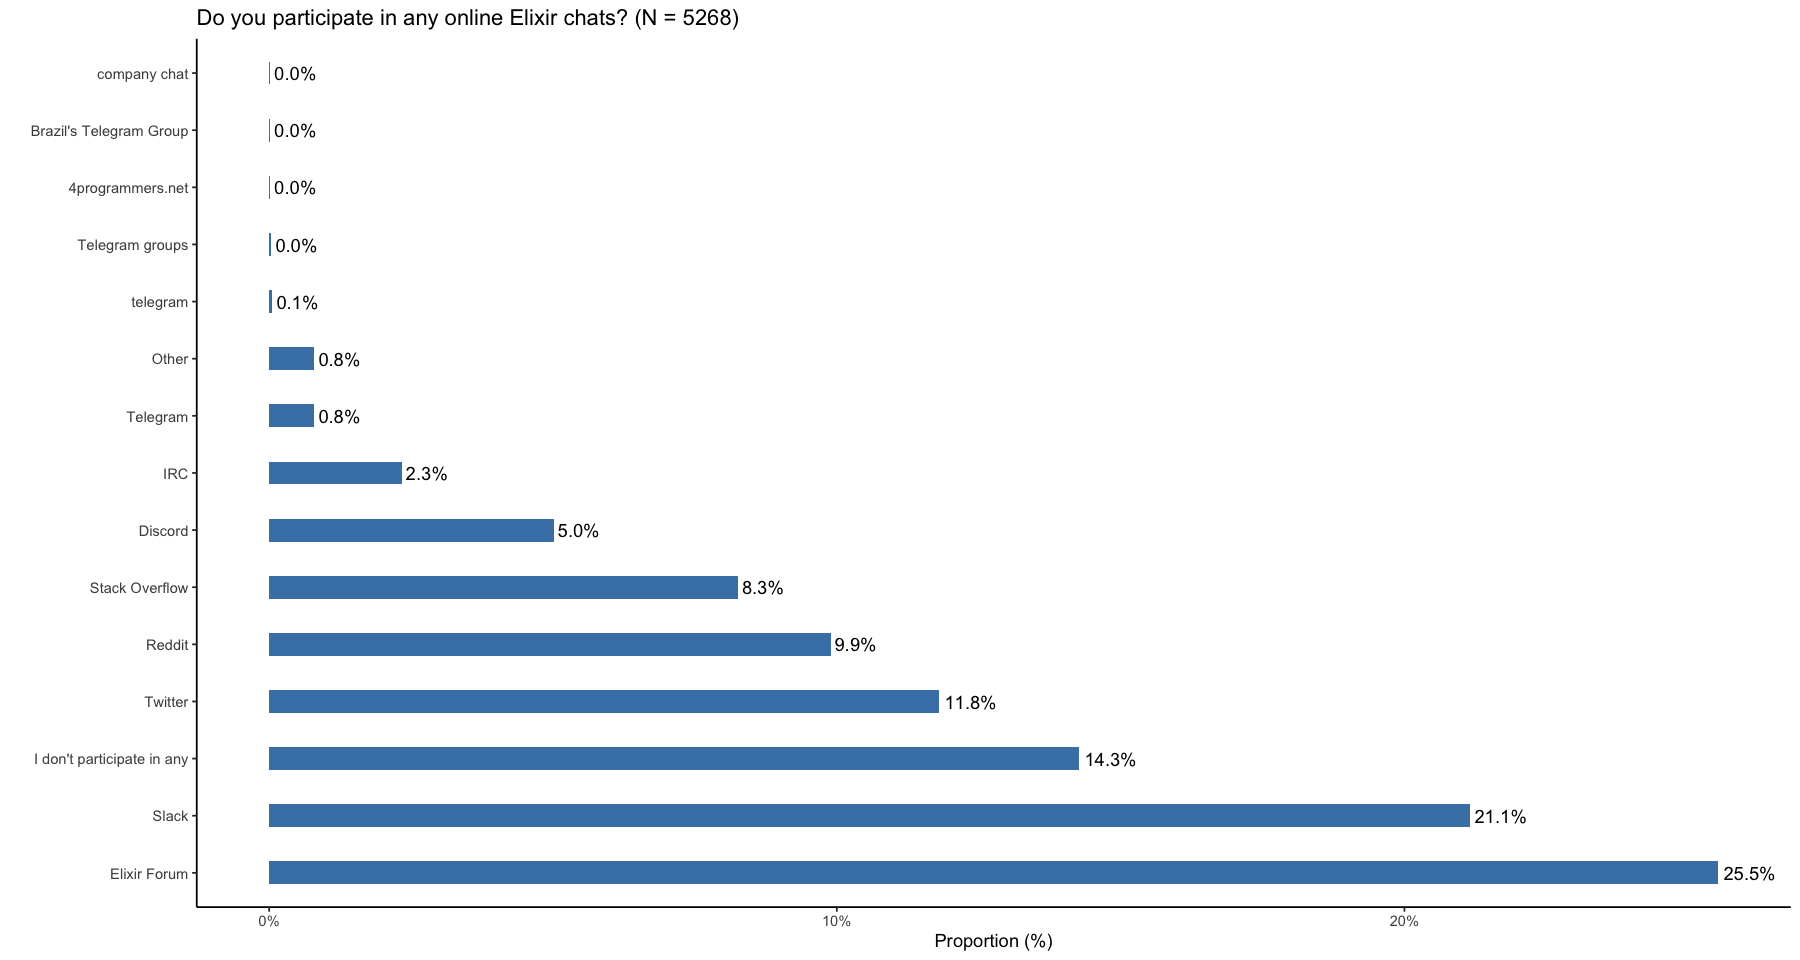


[[25]]


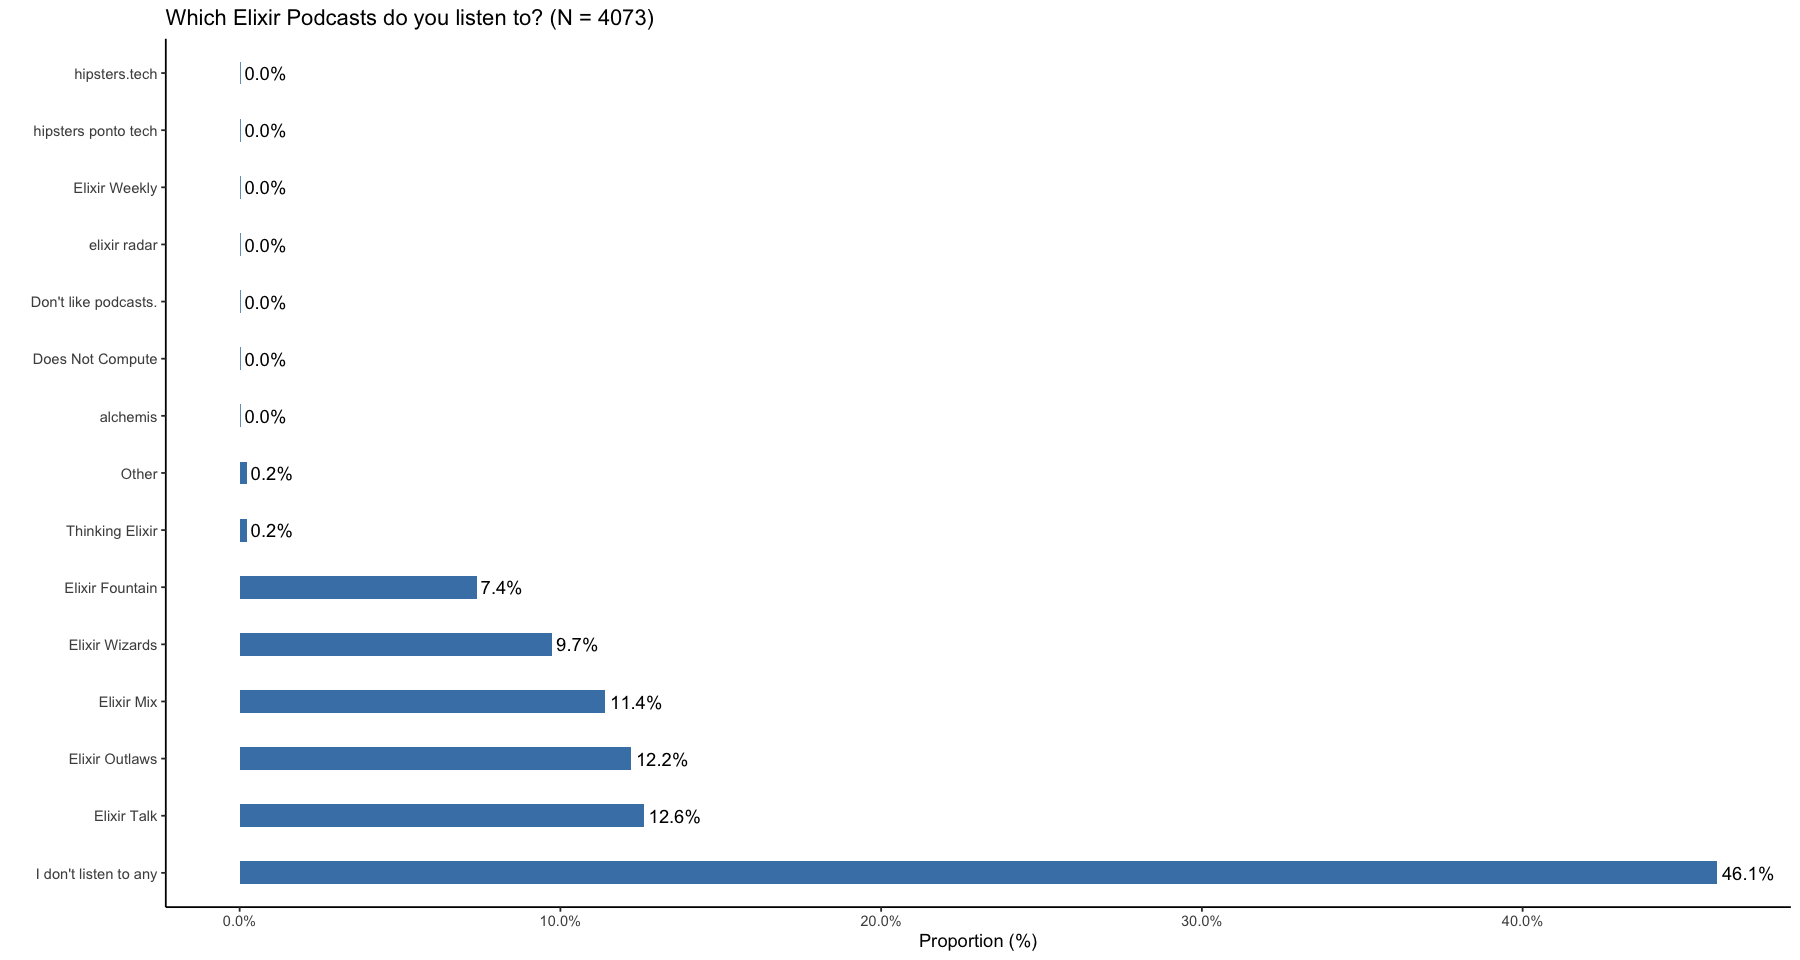


[[26]]


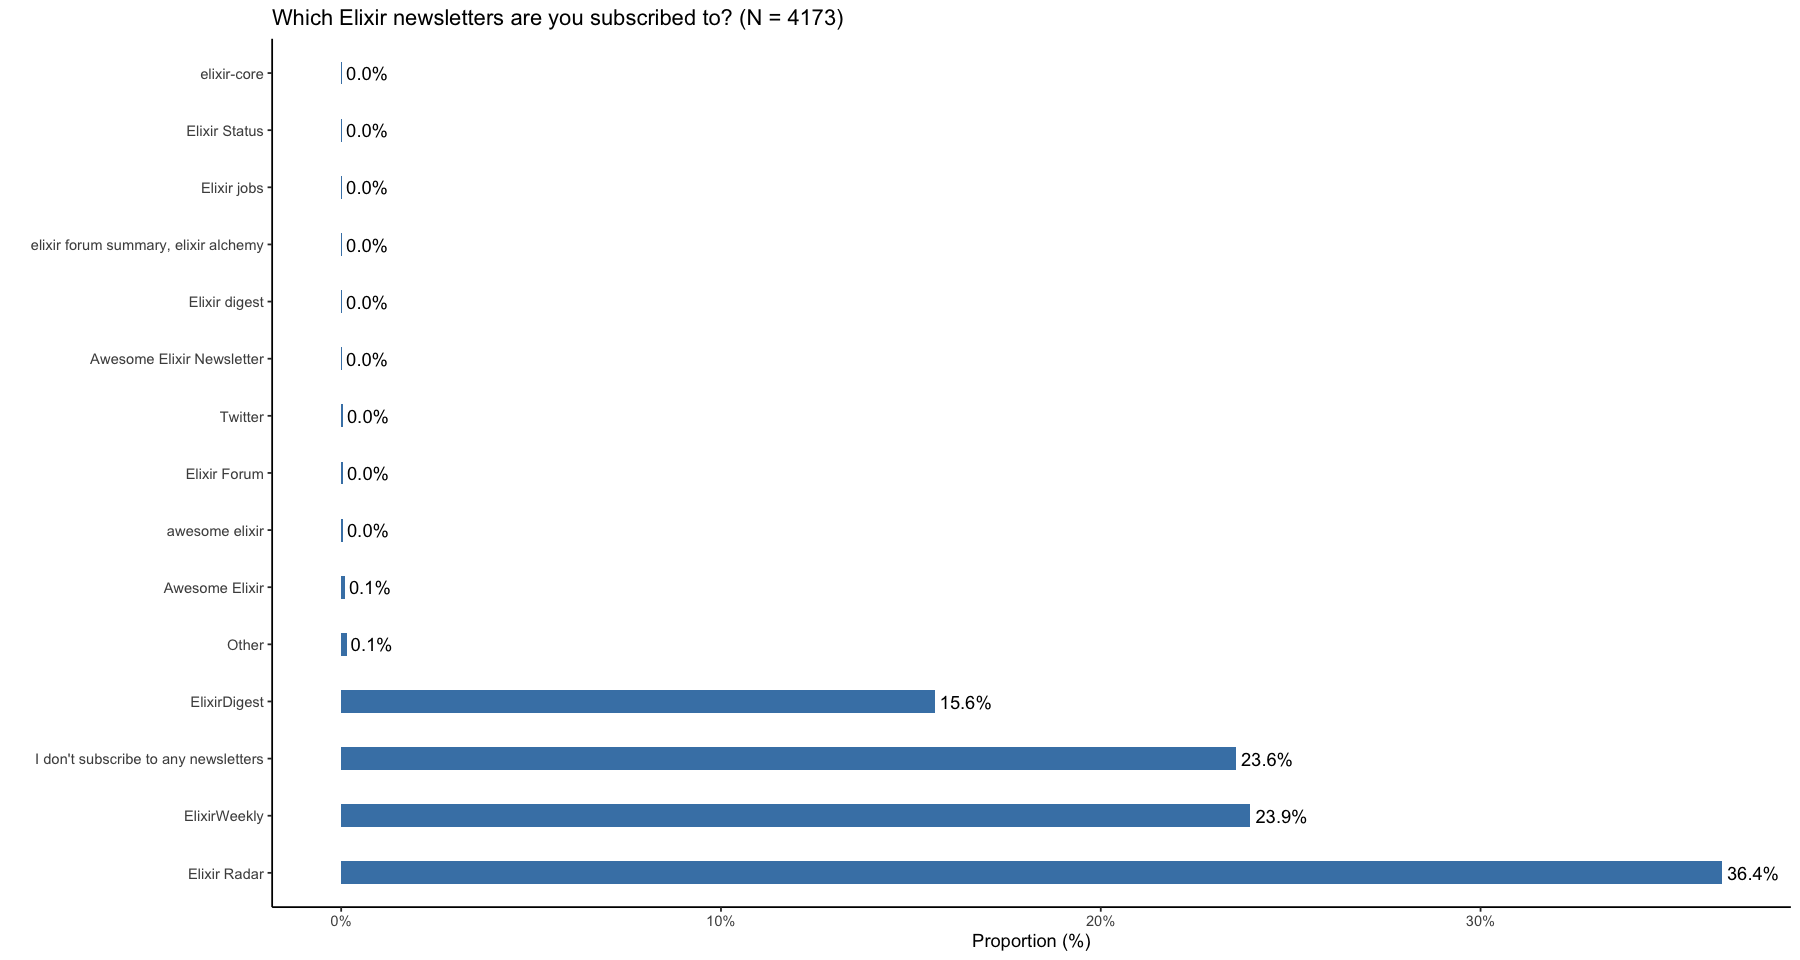


[[27]]


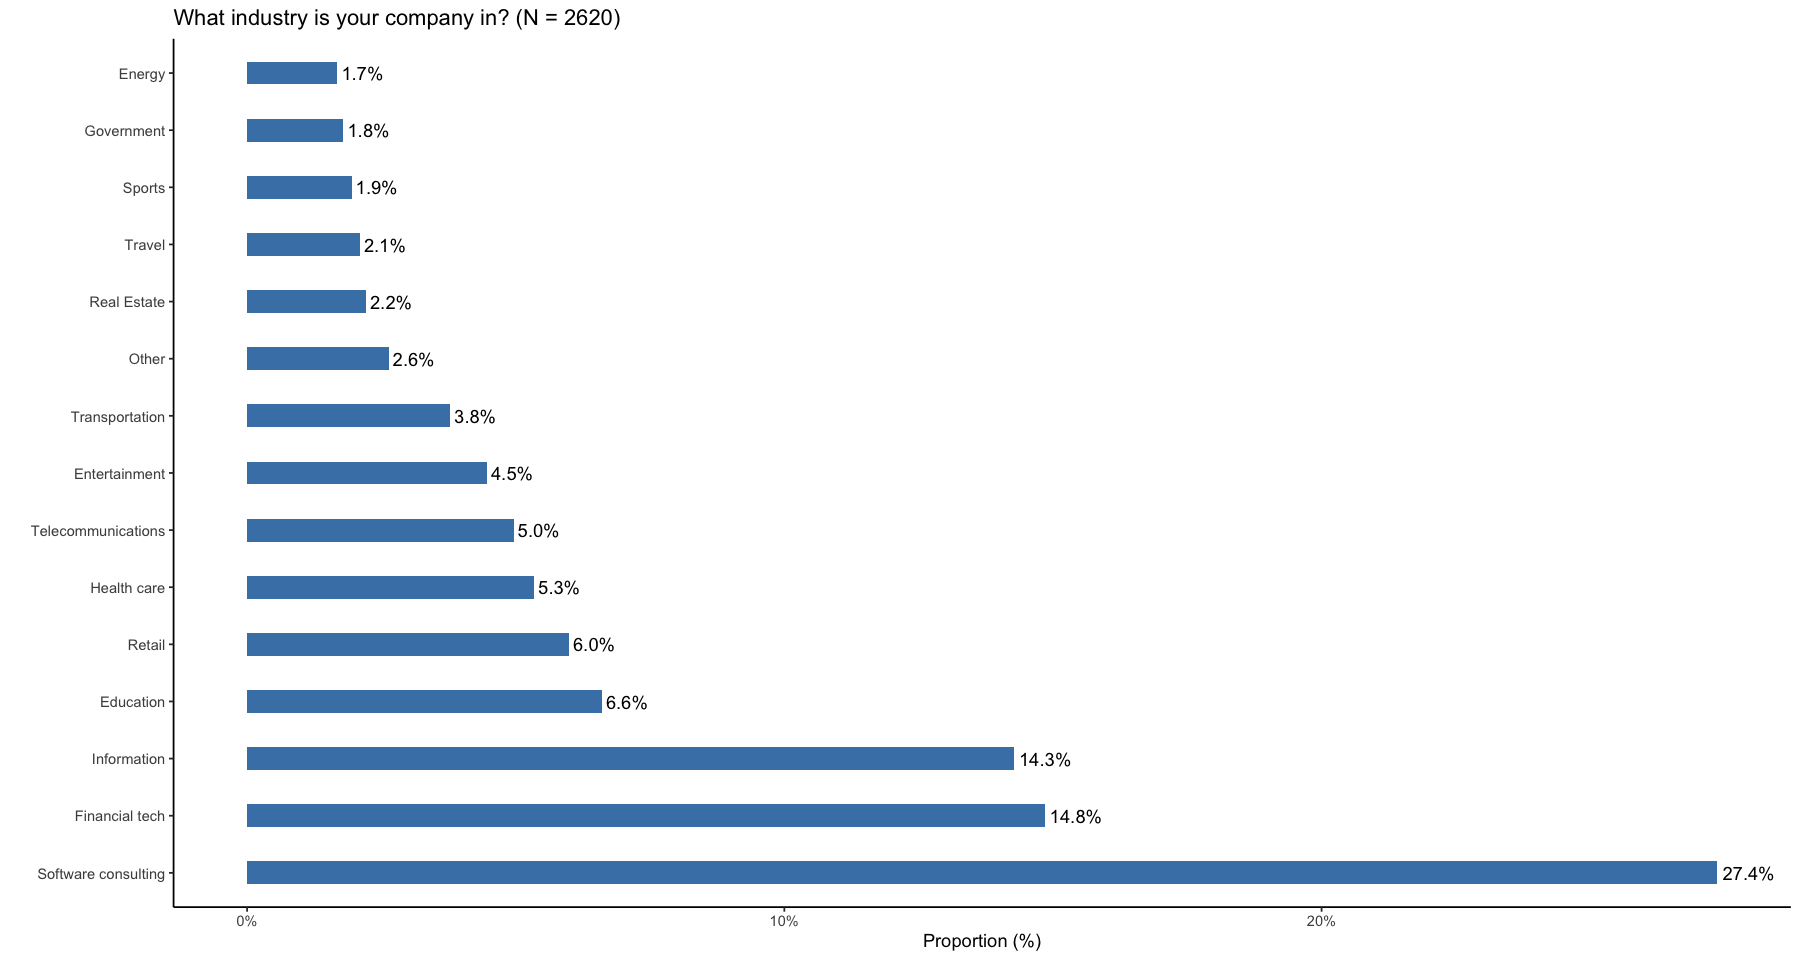


[[28]]


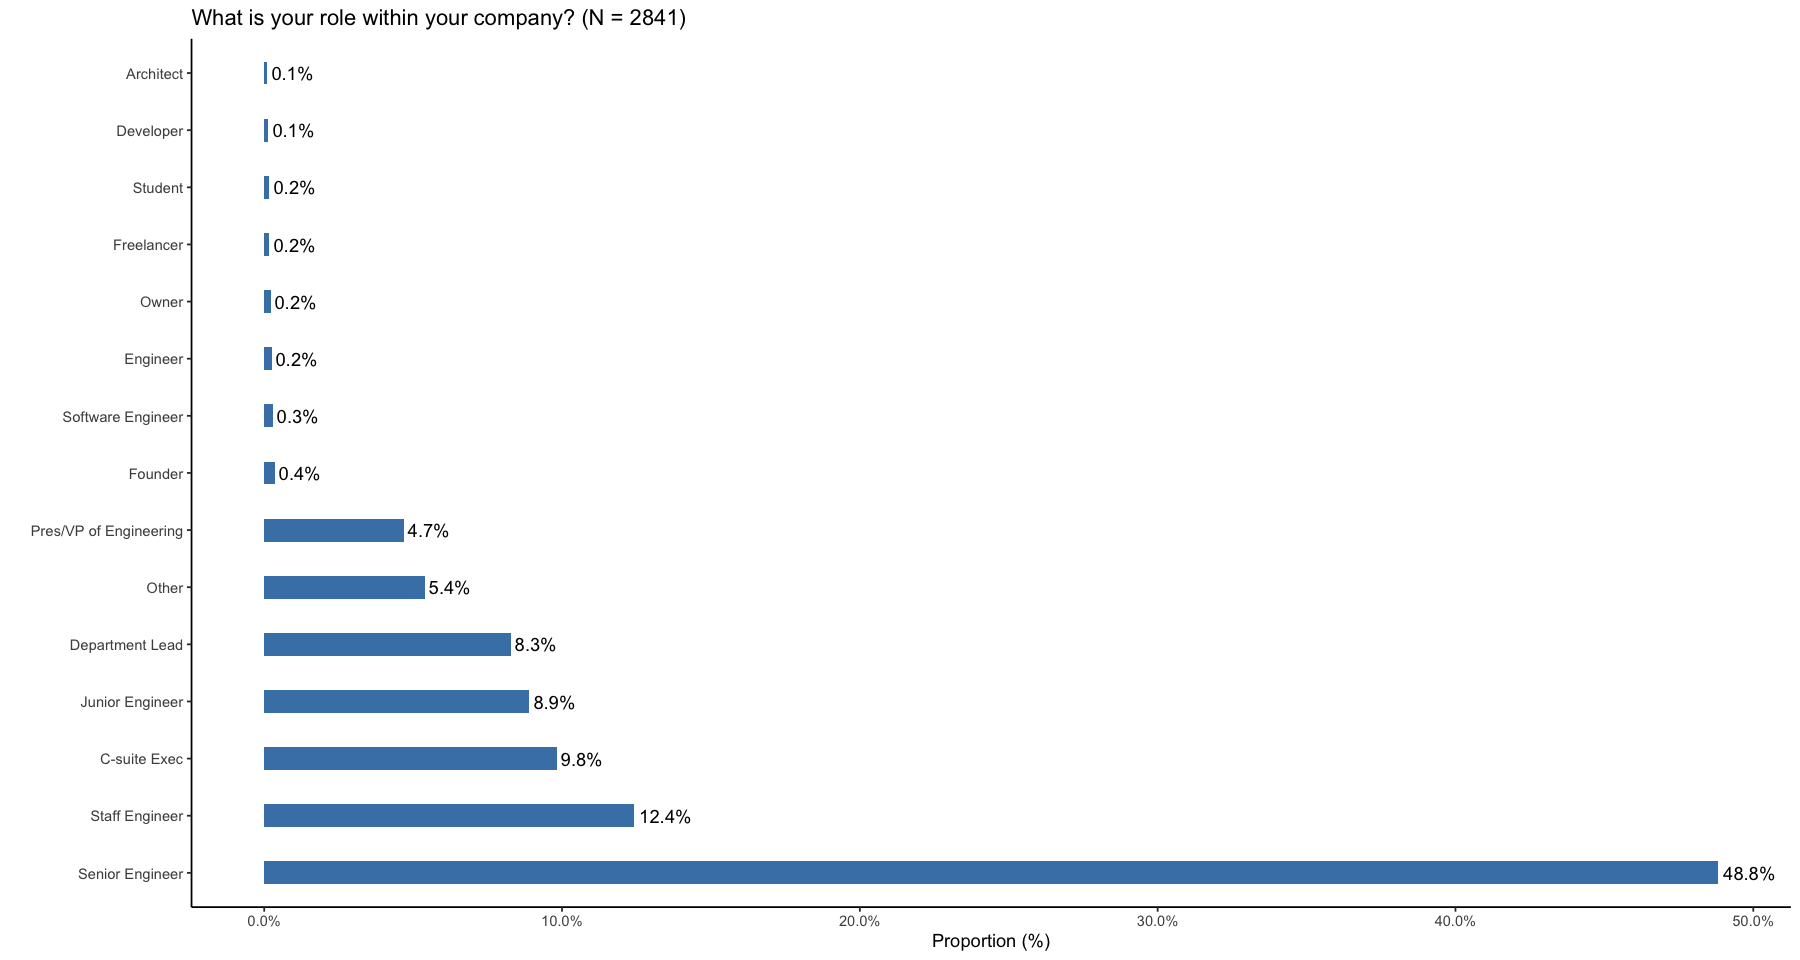


[[29]]


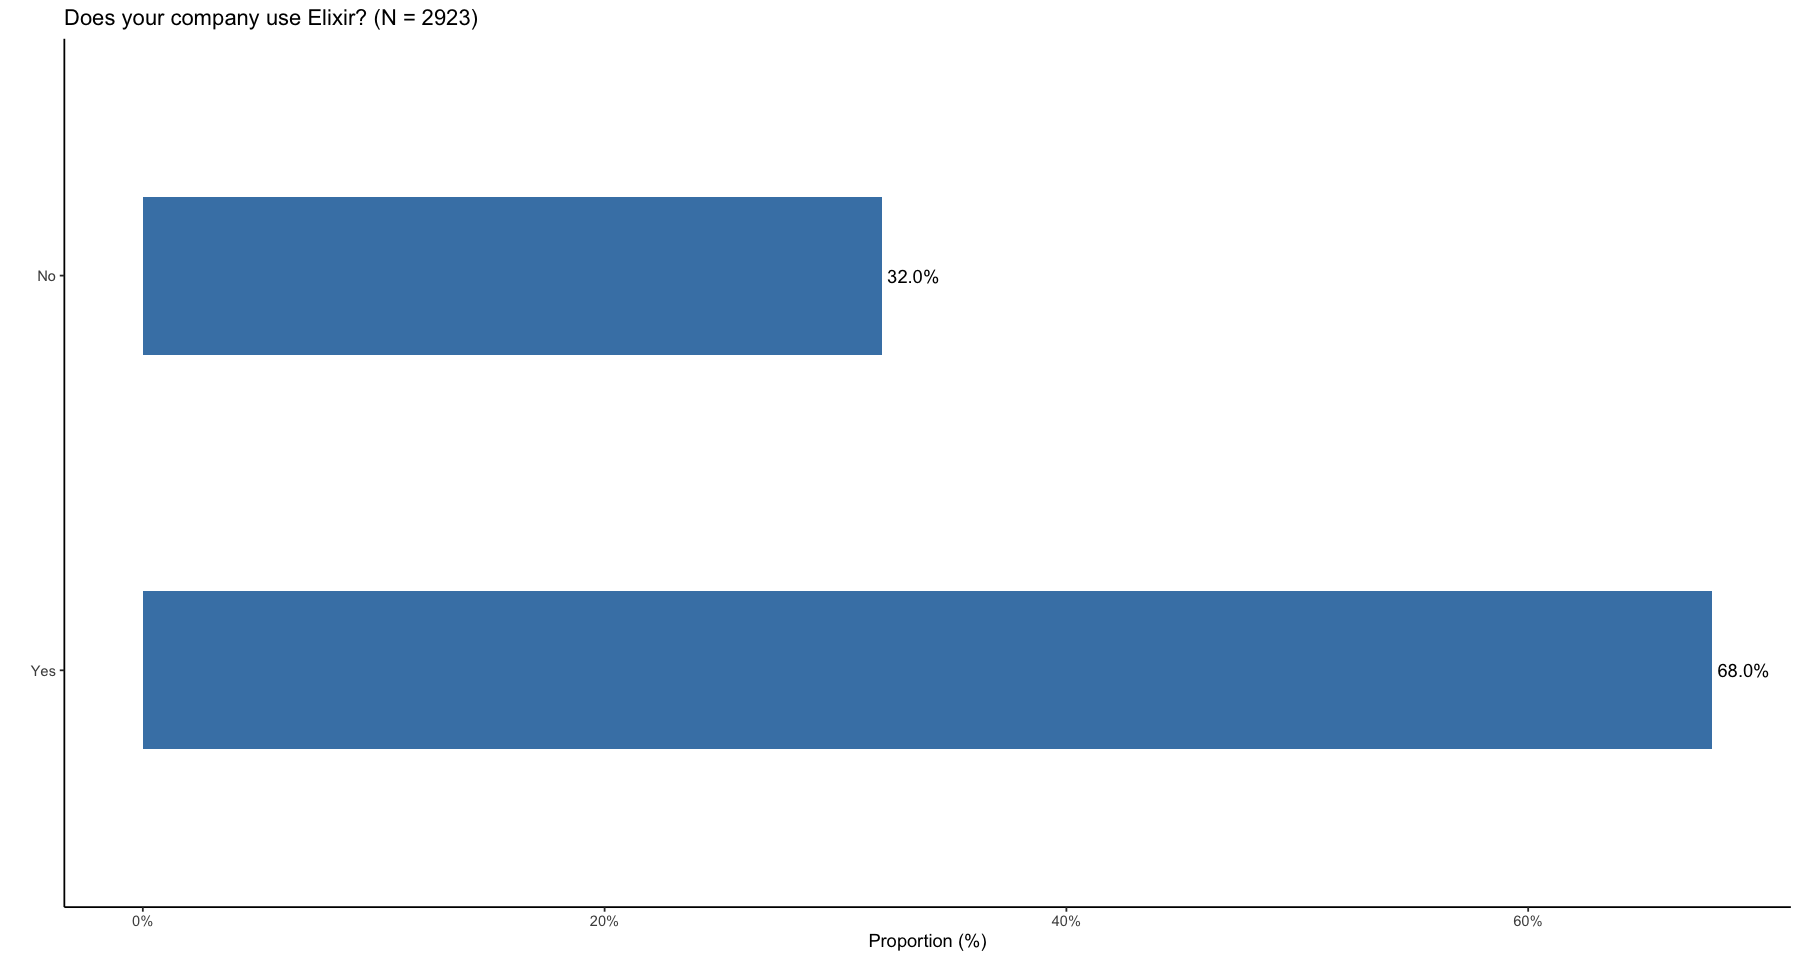


[[30]]


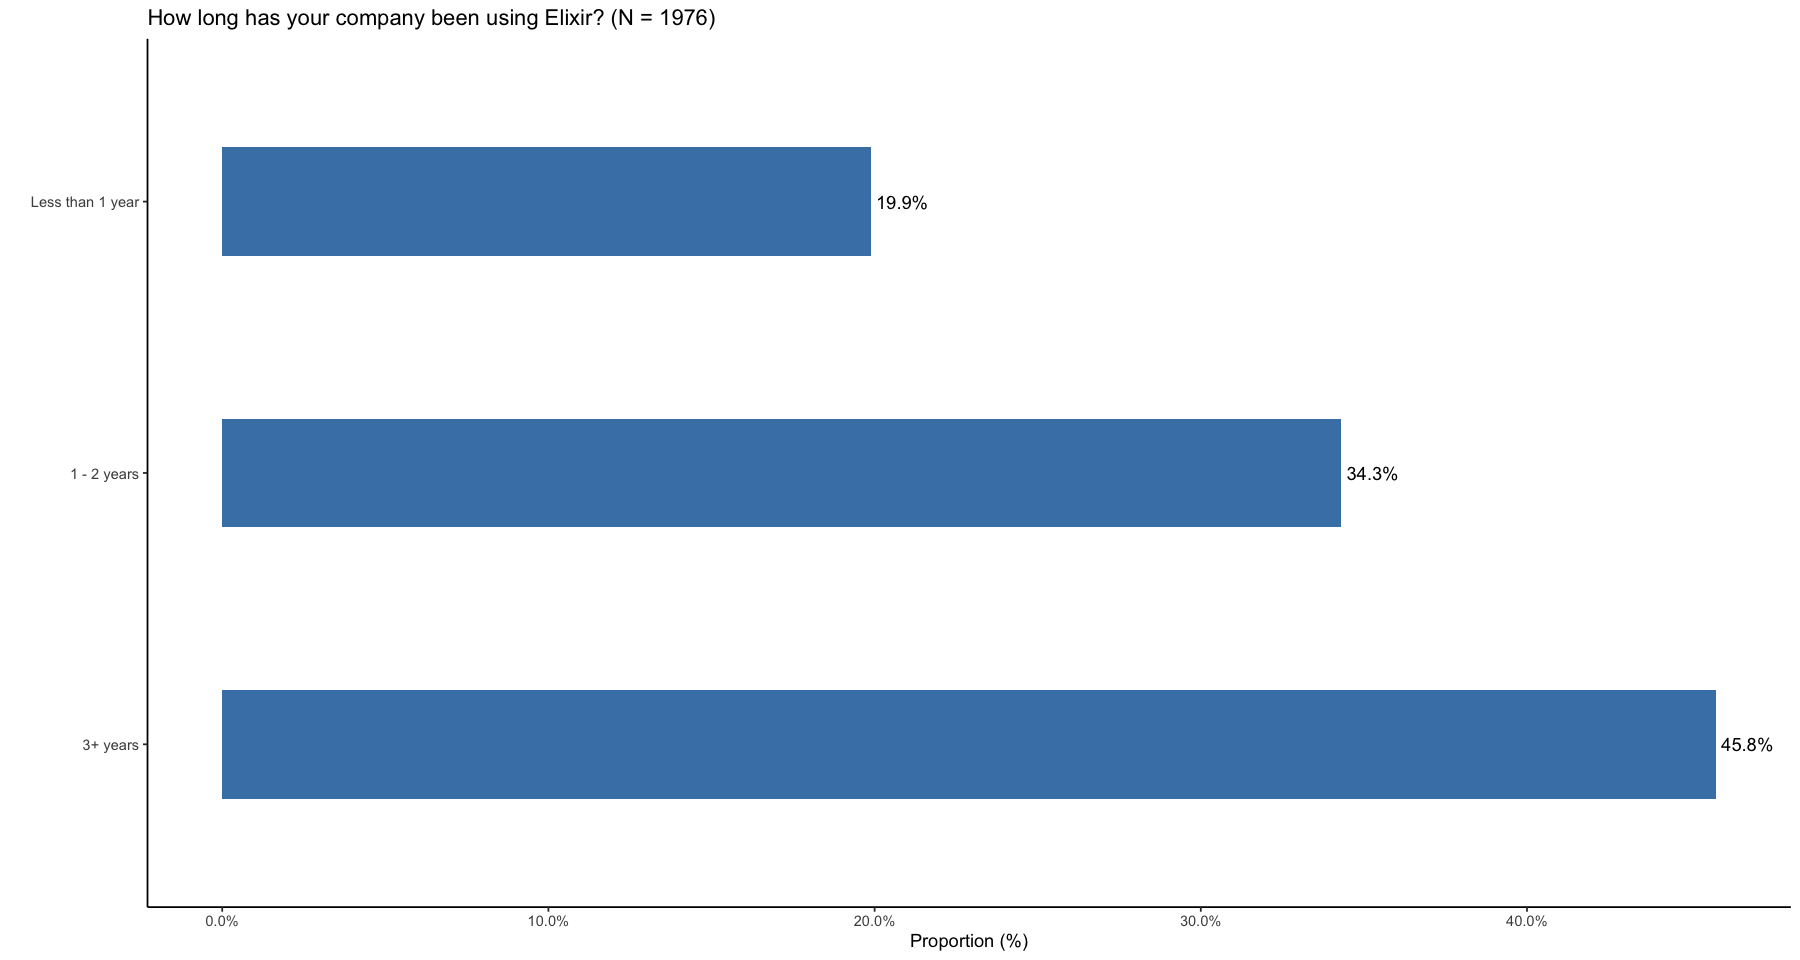


[[31]]


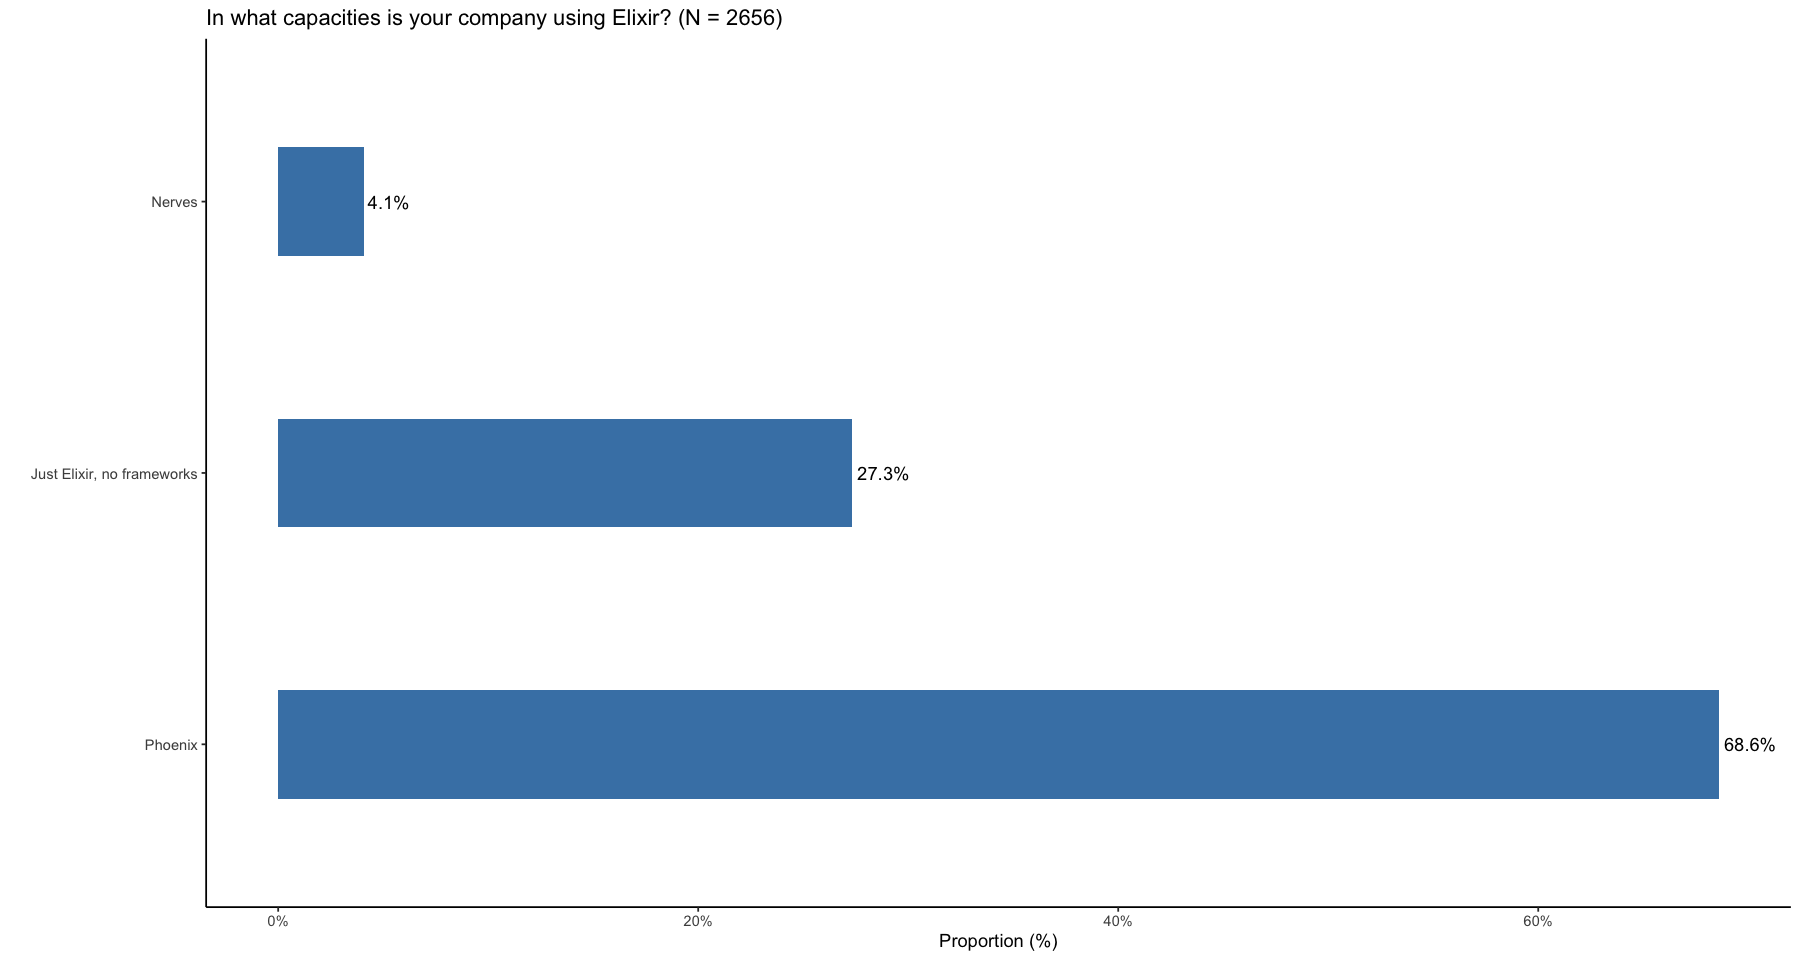


[[32]]


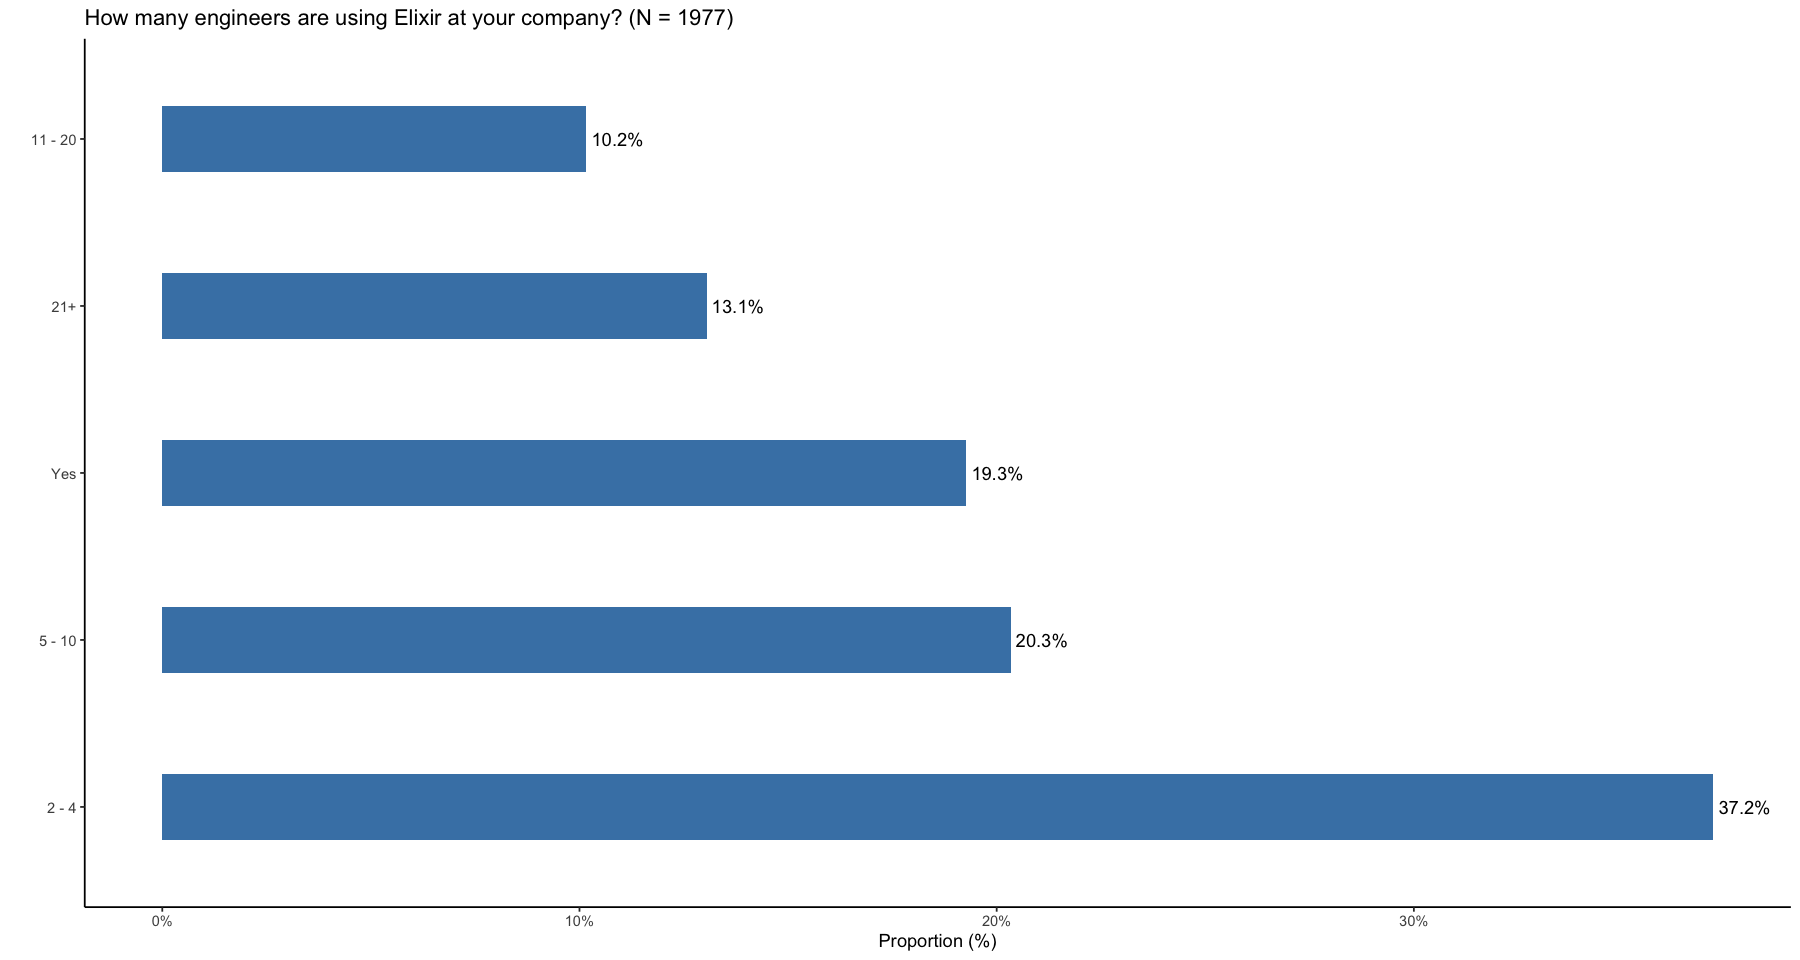


[[33]]


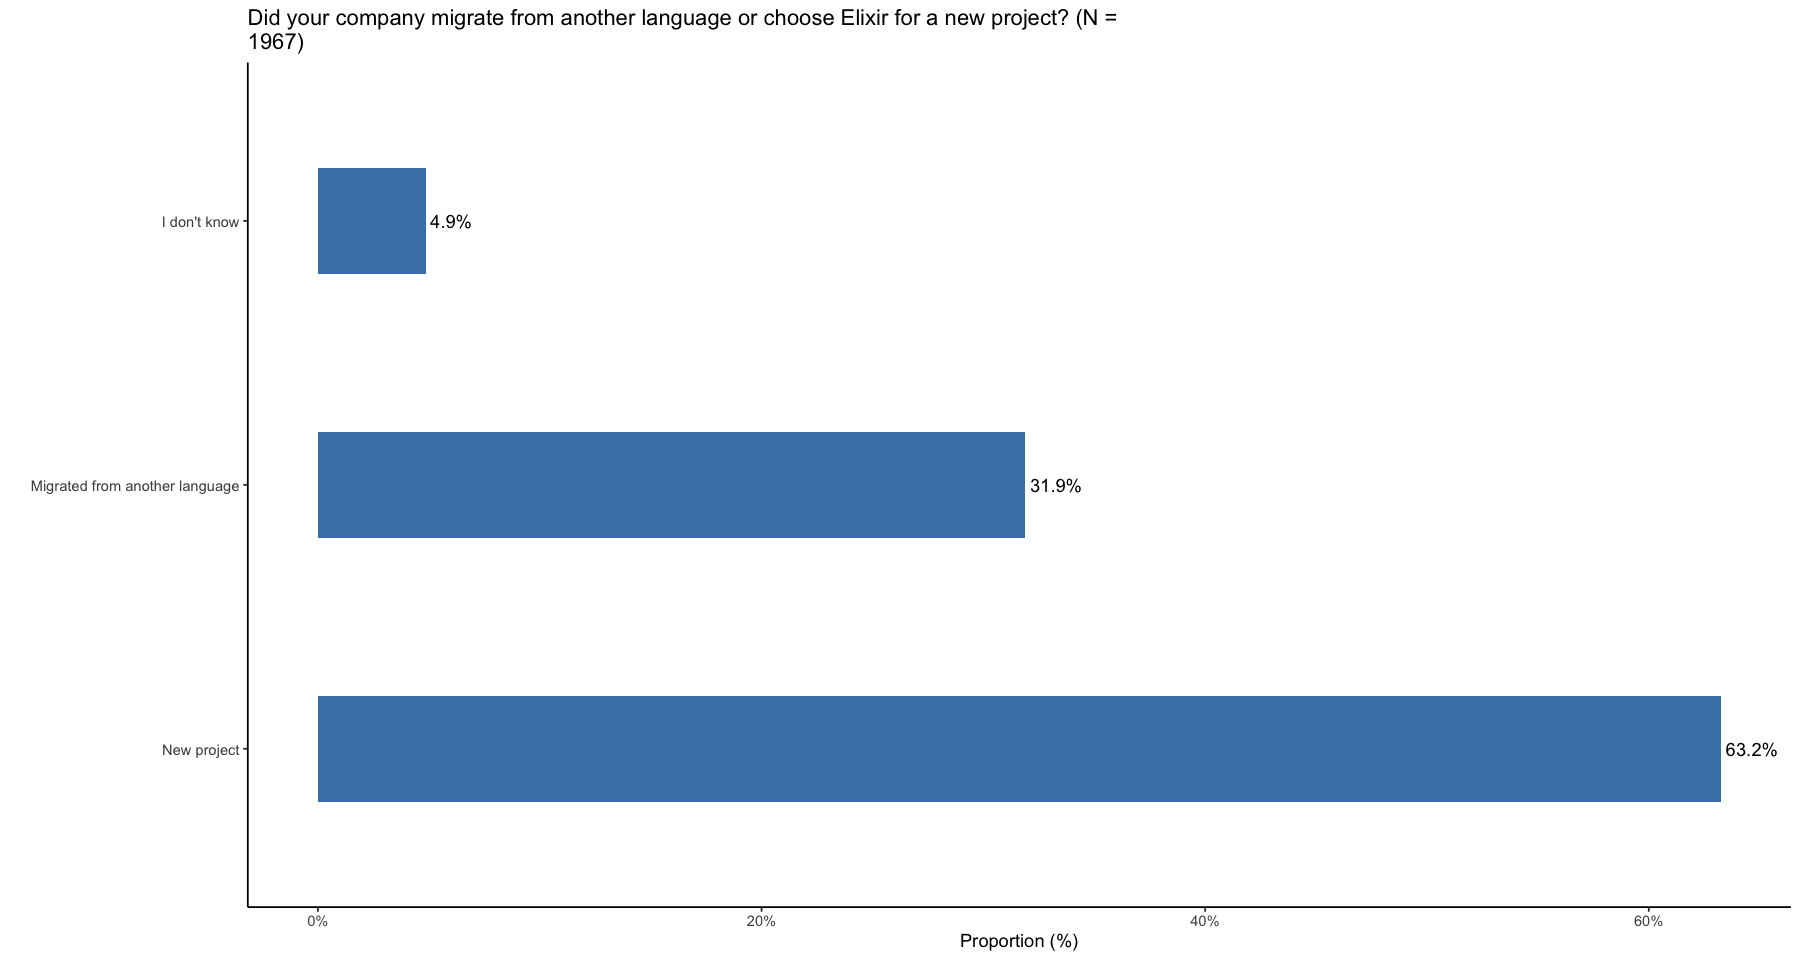


[[34]]


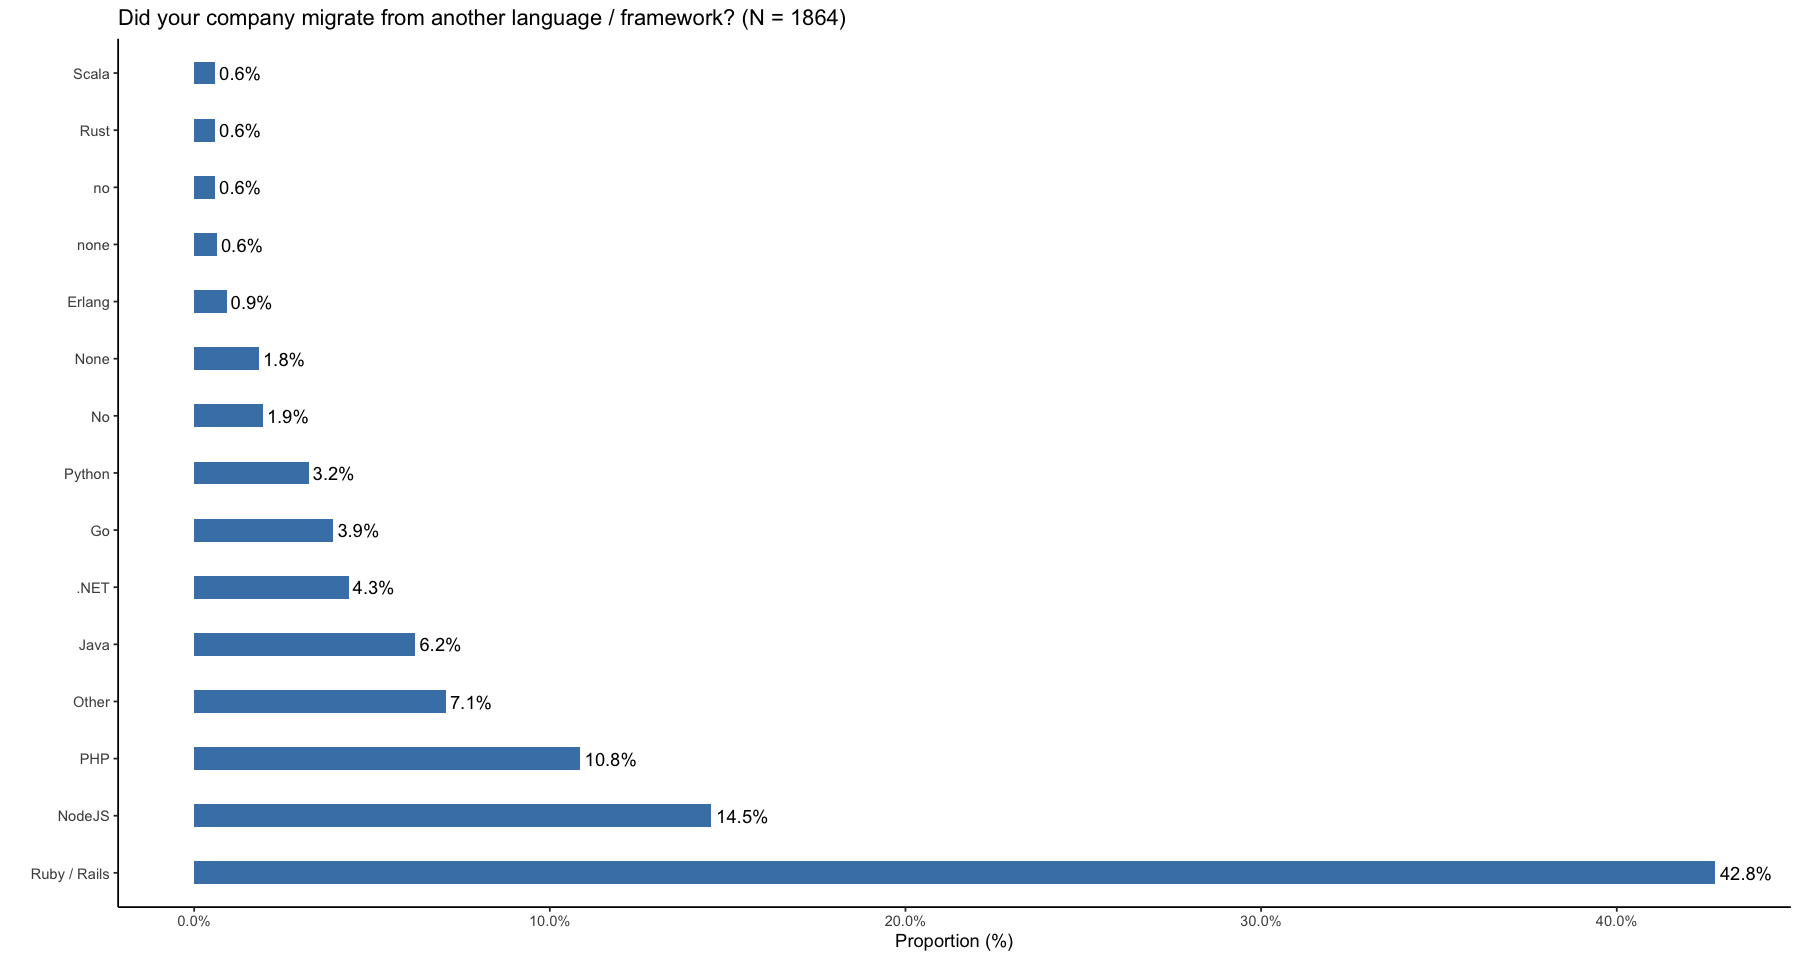


[[35]]


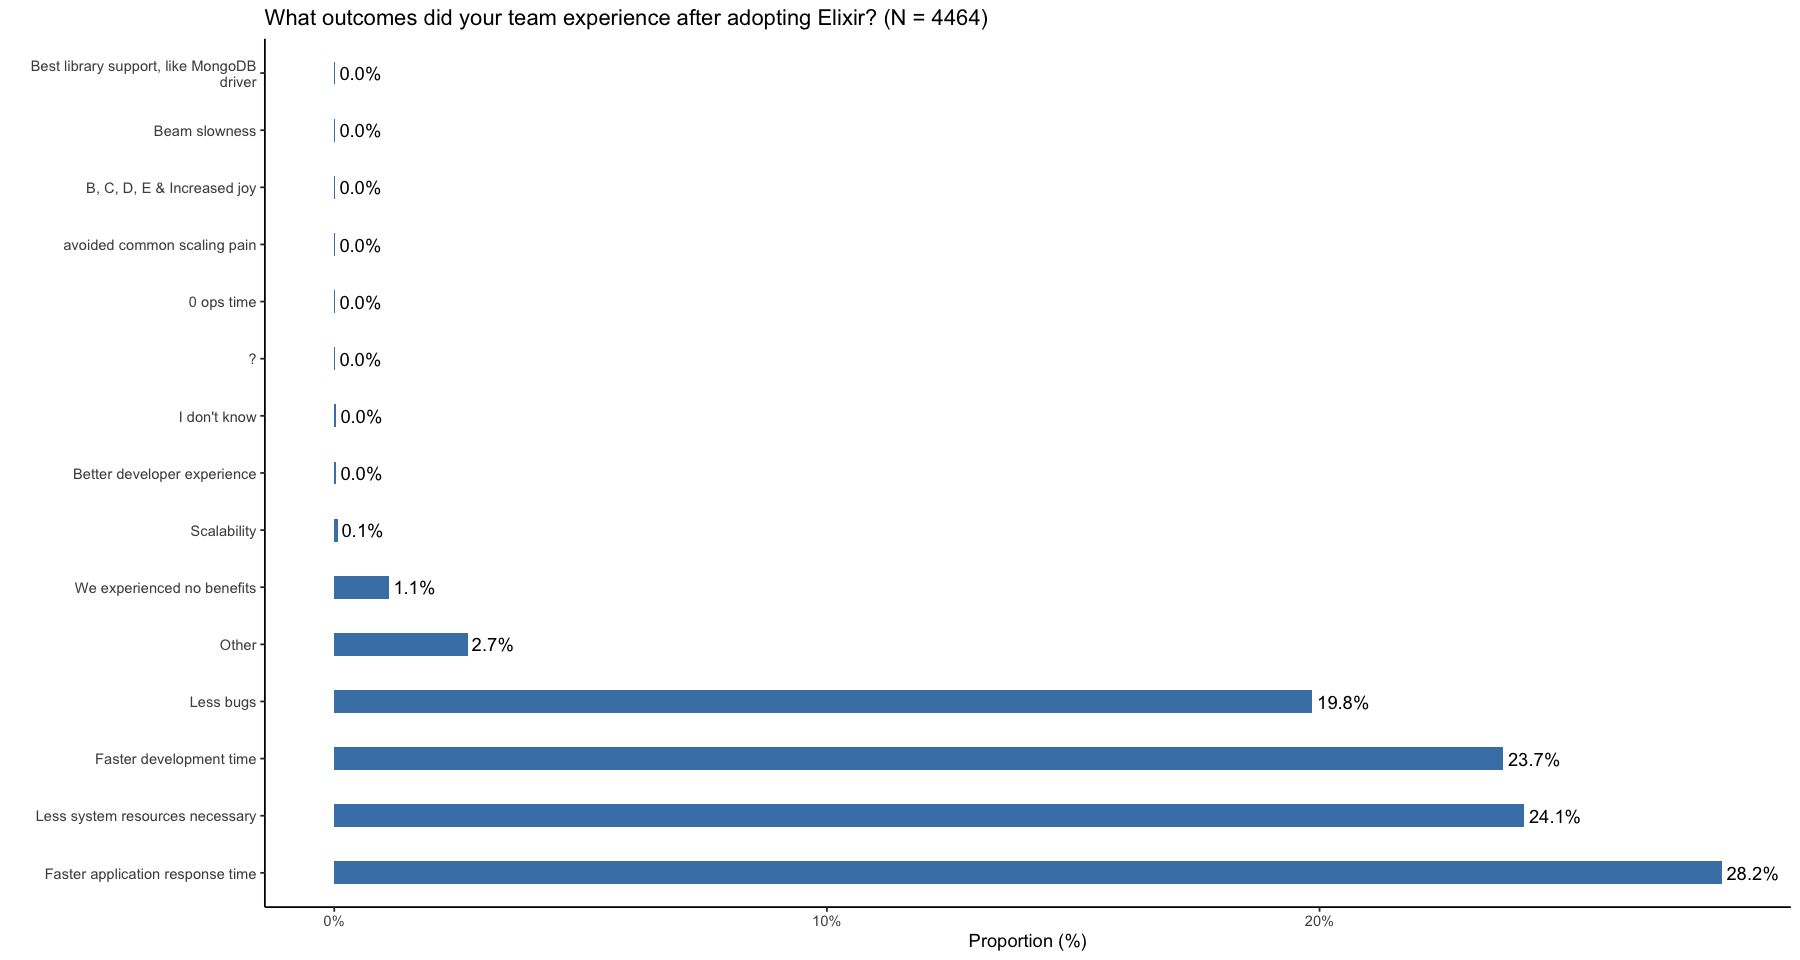


[[36]]


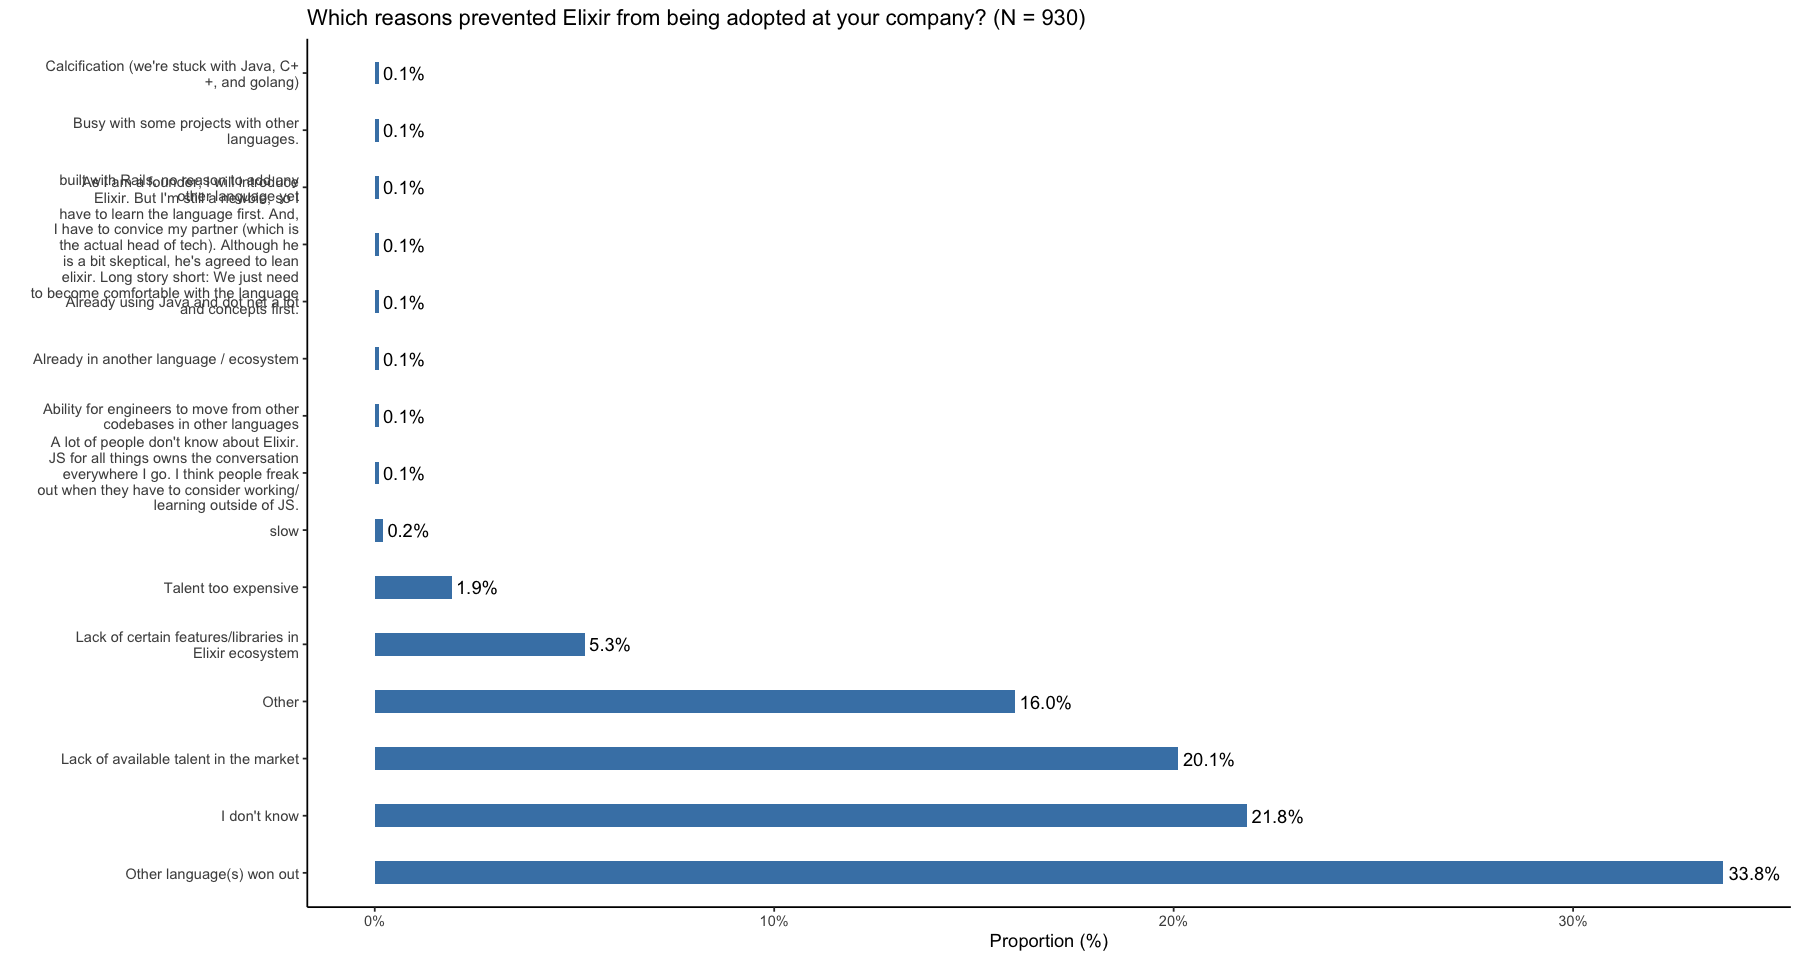


[[37]]


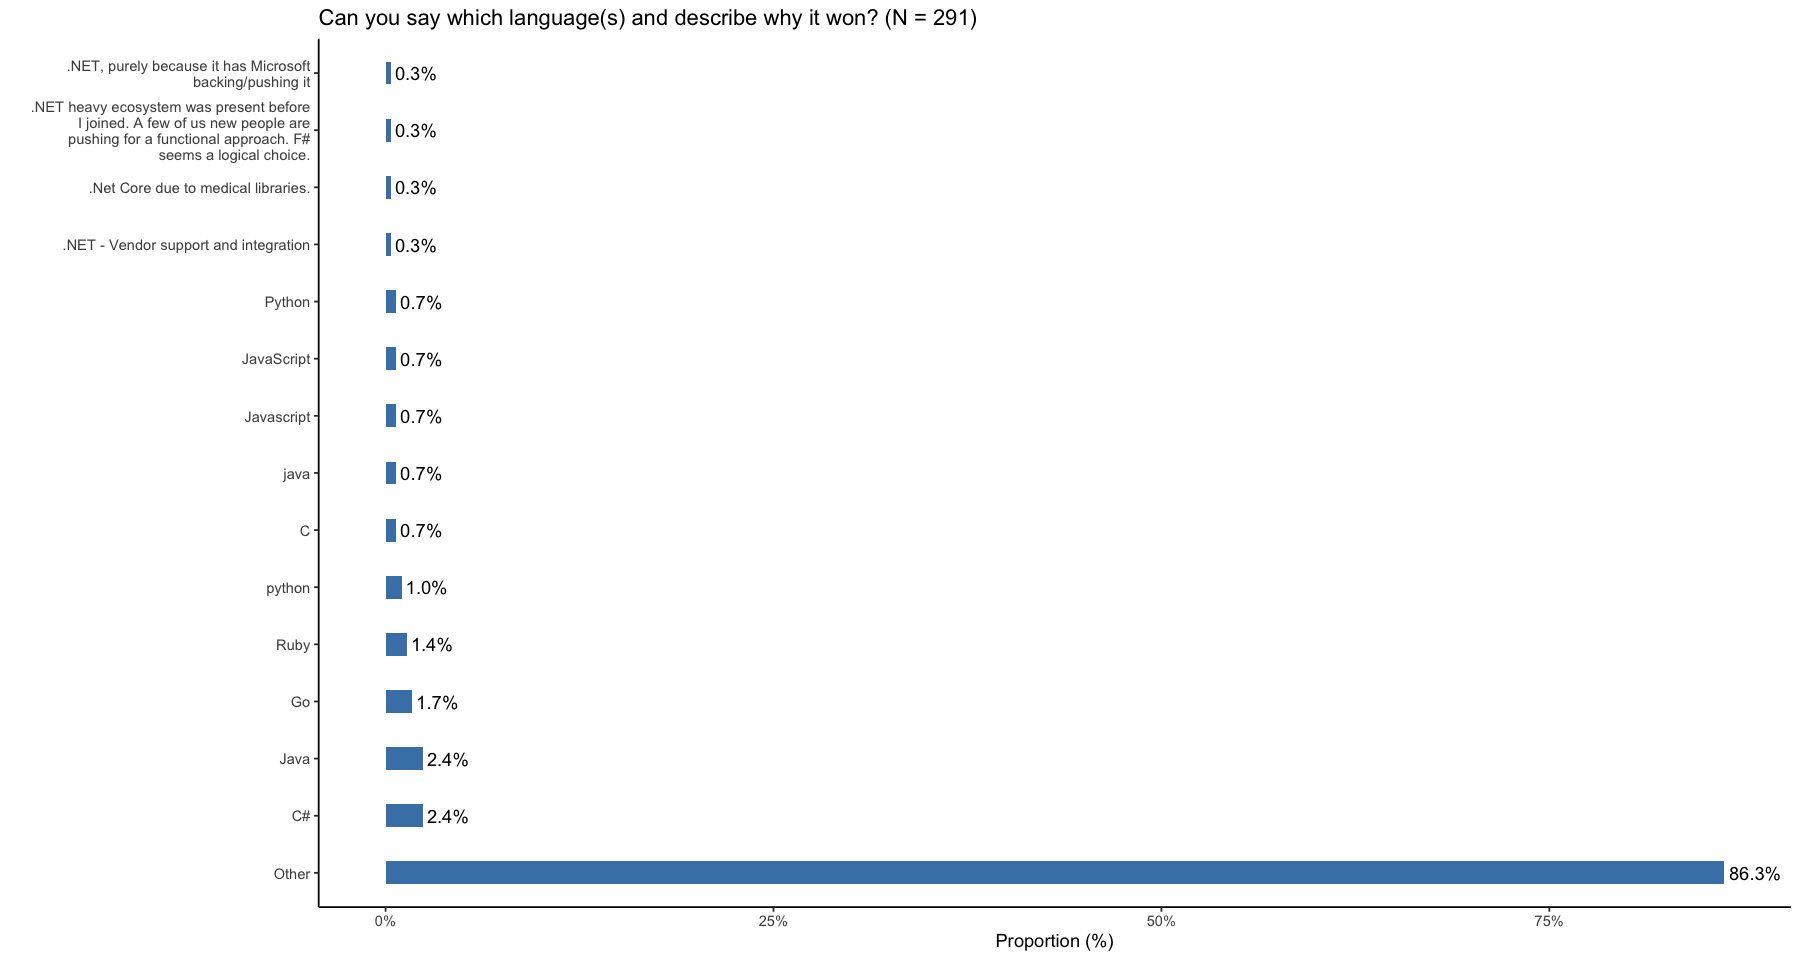


[[38]]


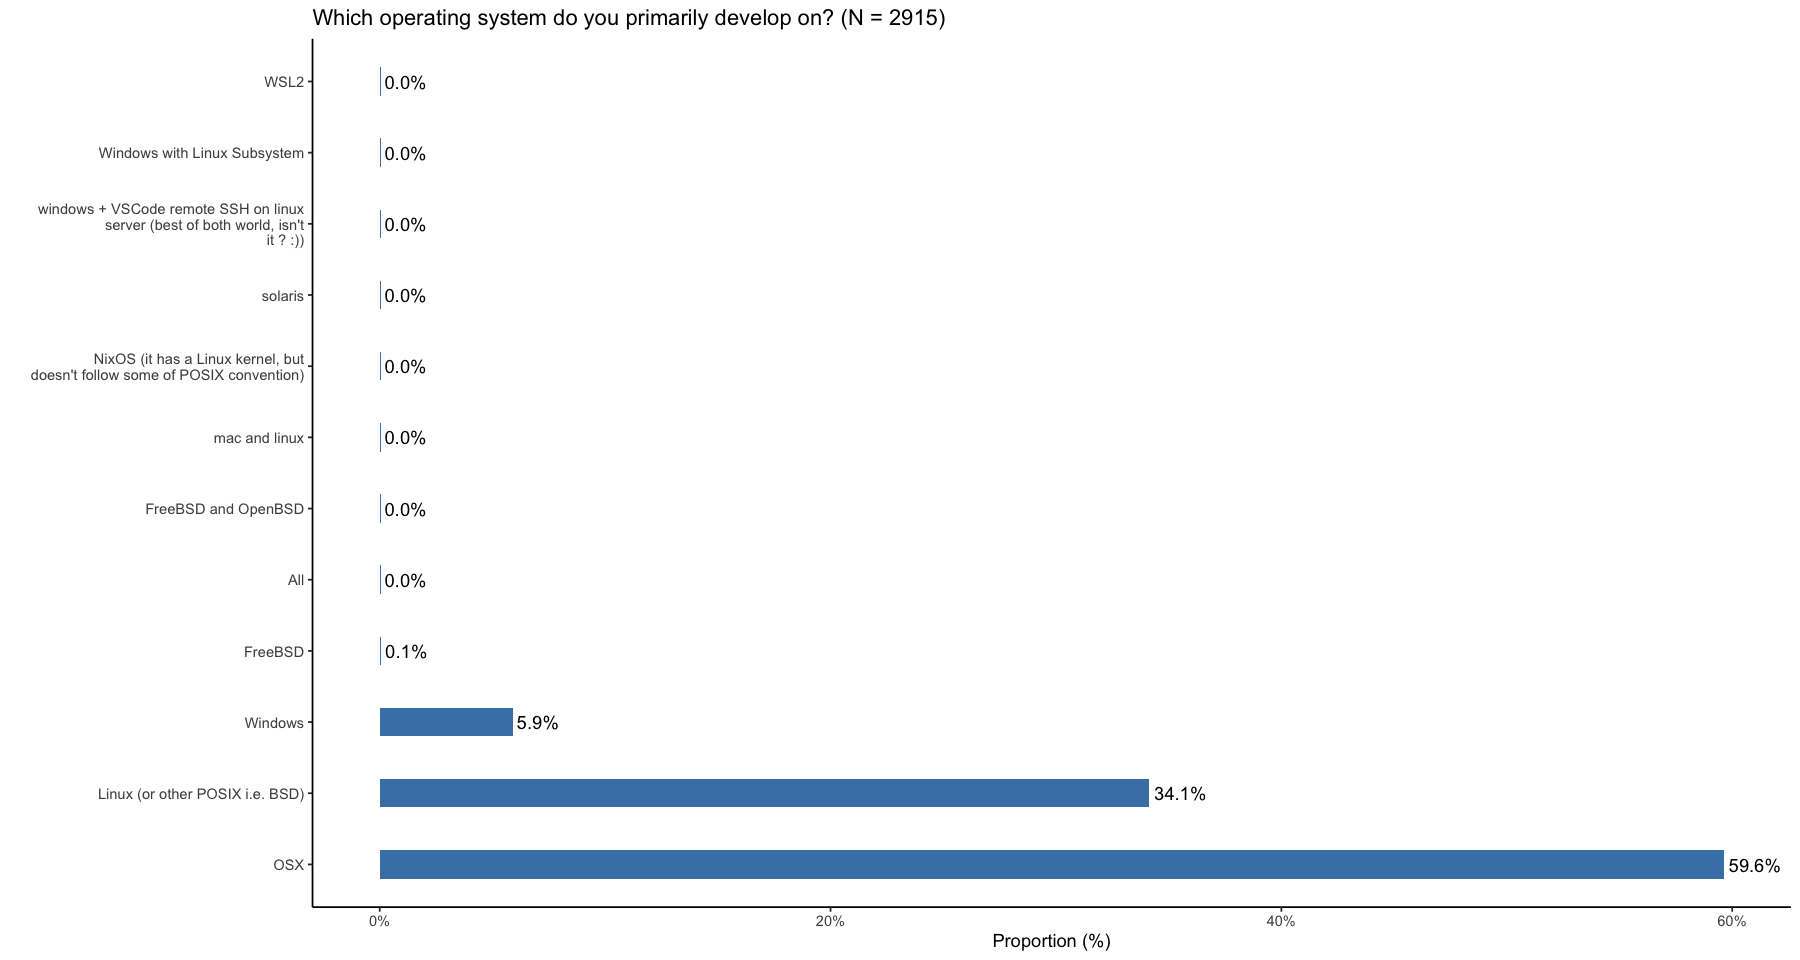


[[39]]


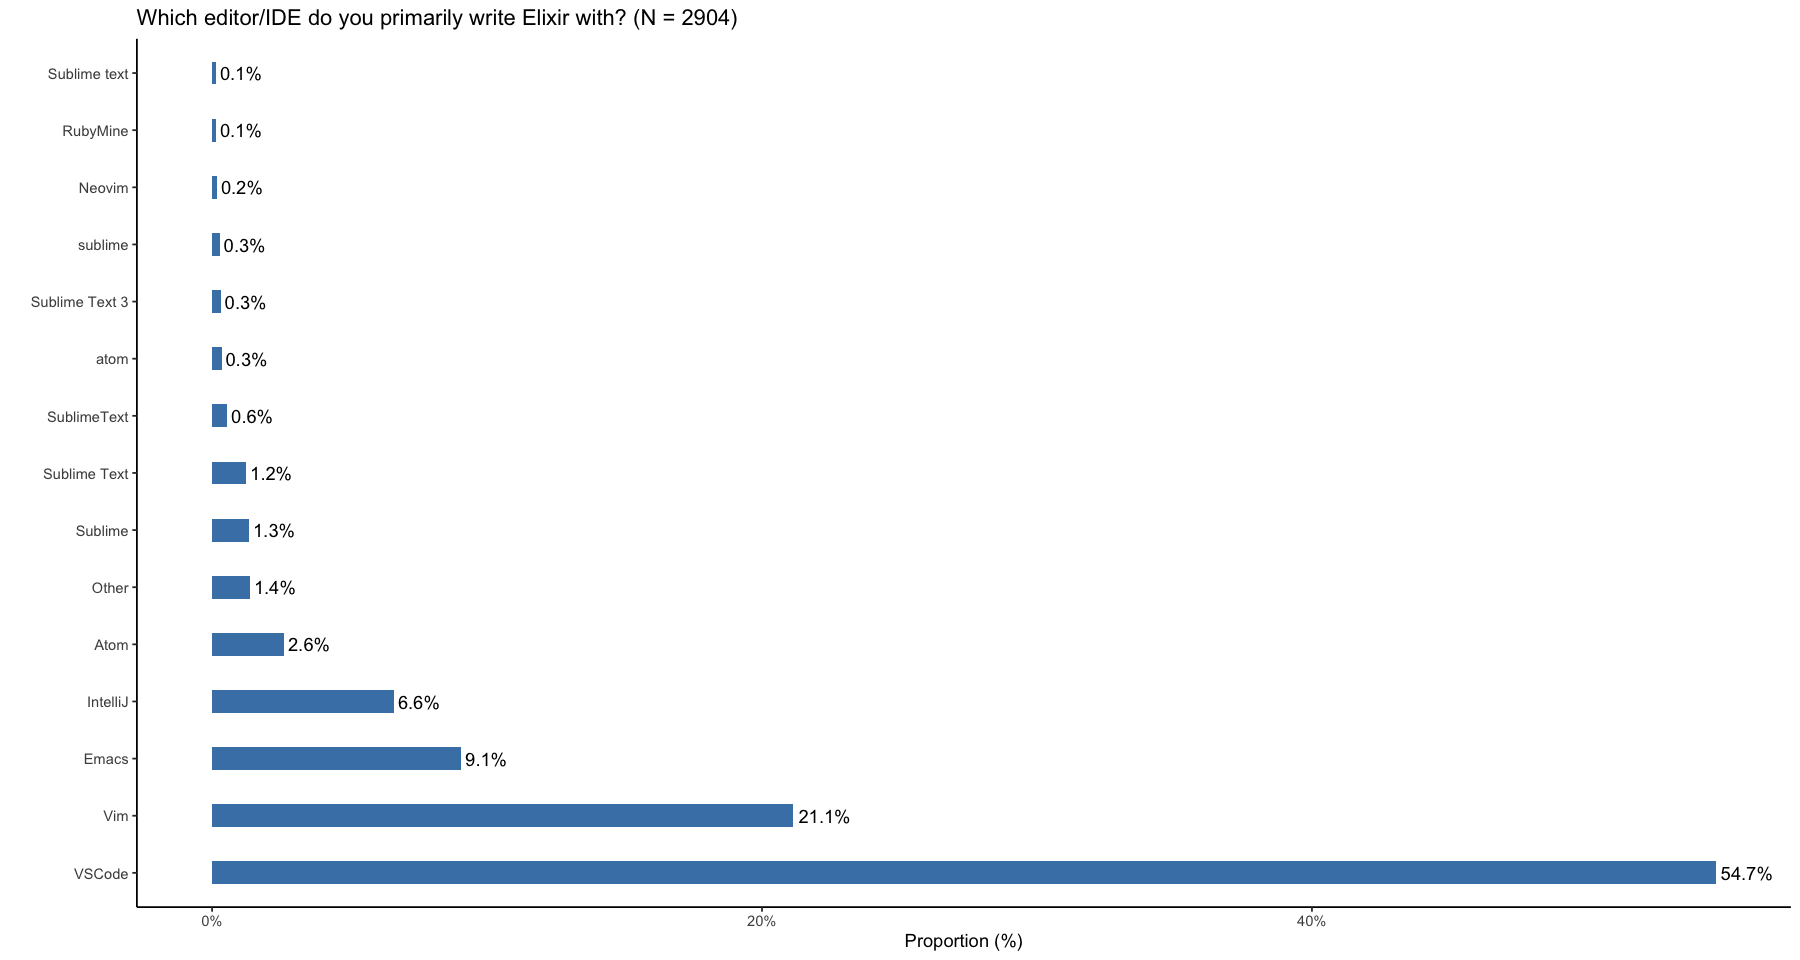


[[40]]


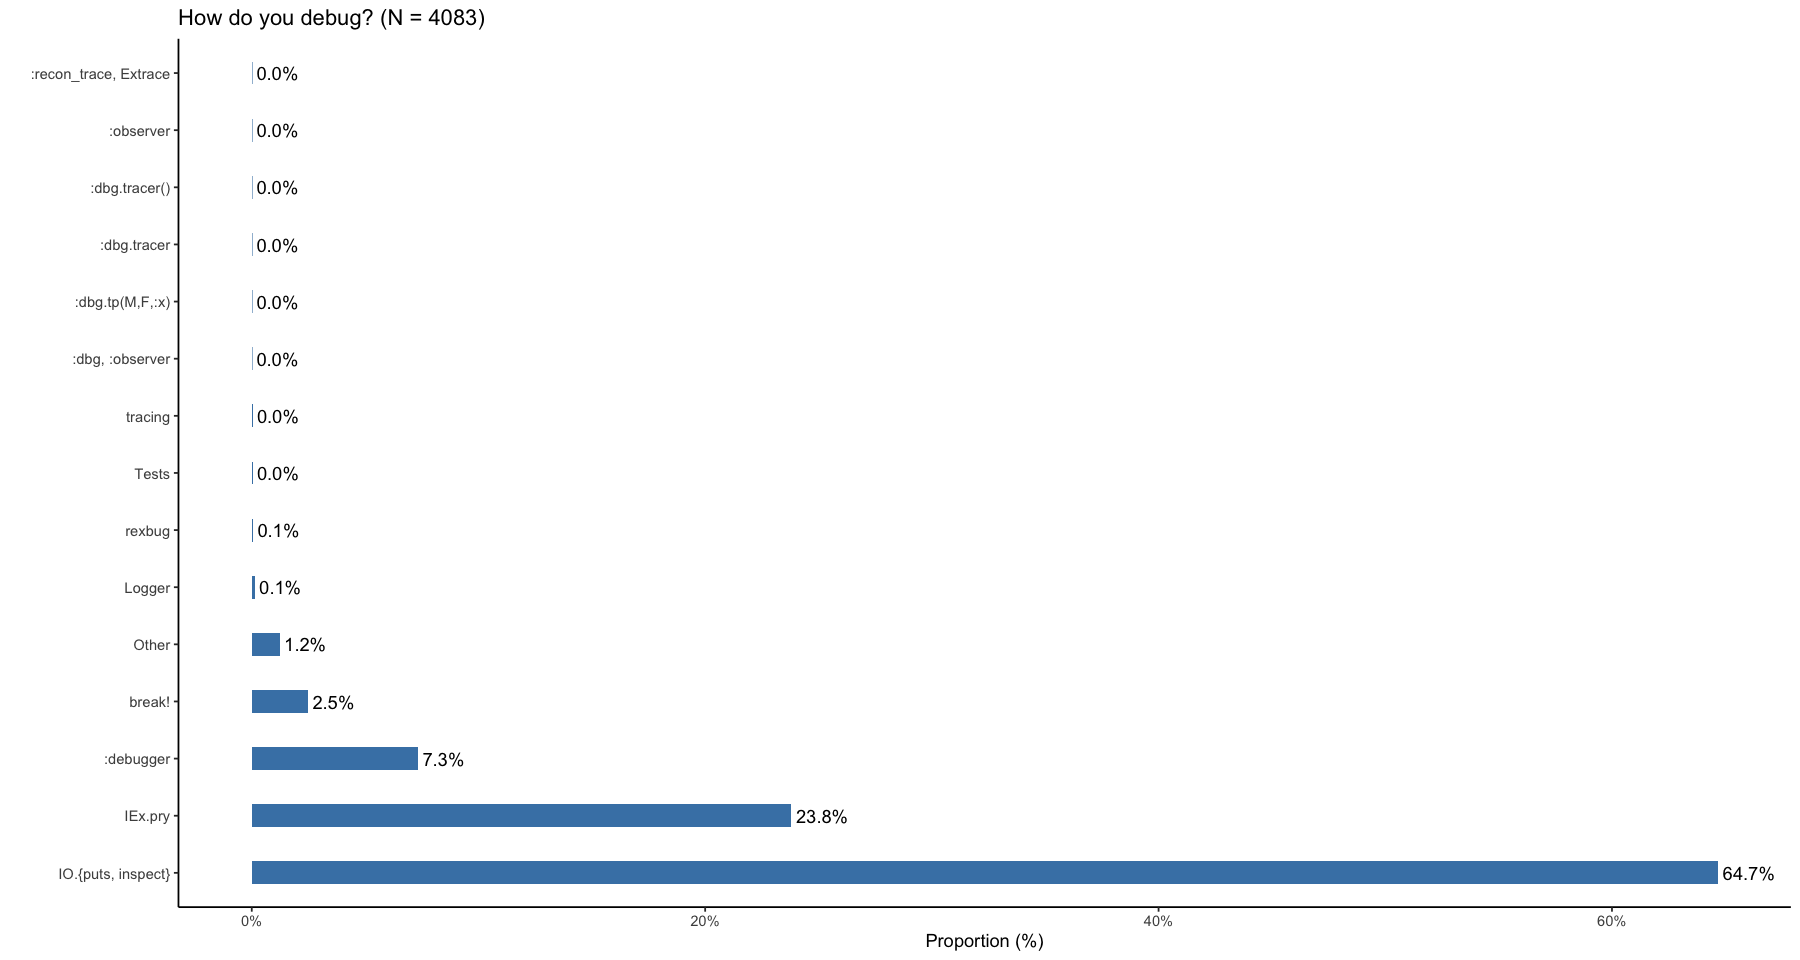


[[41]]


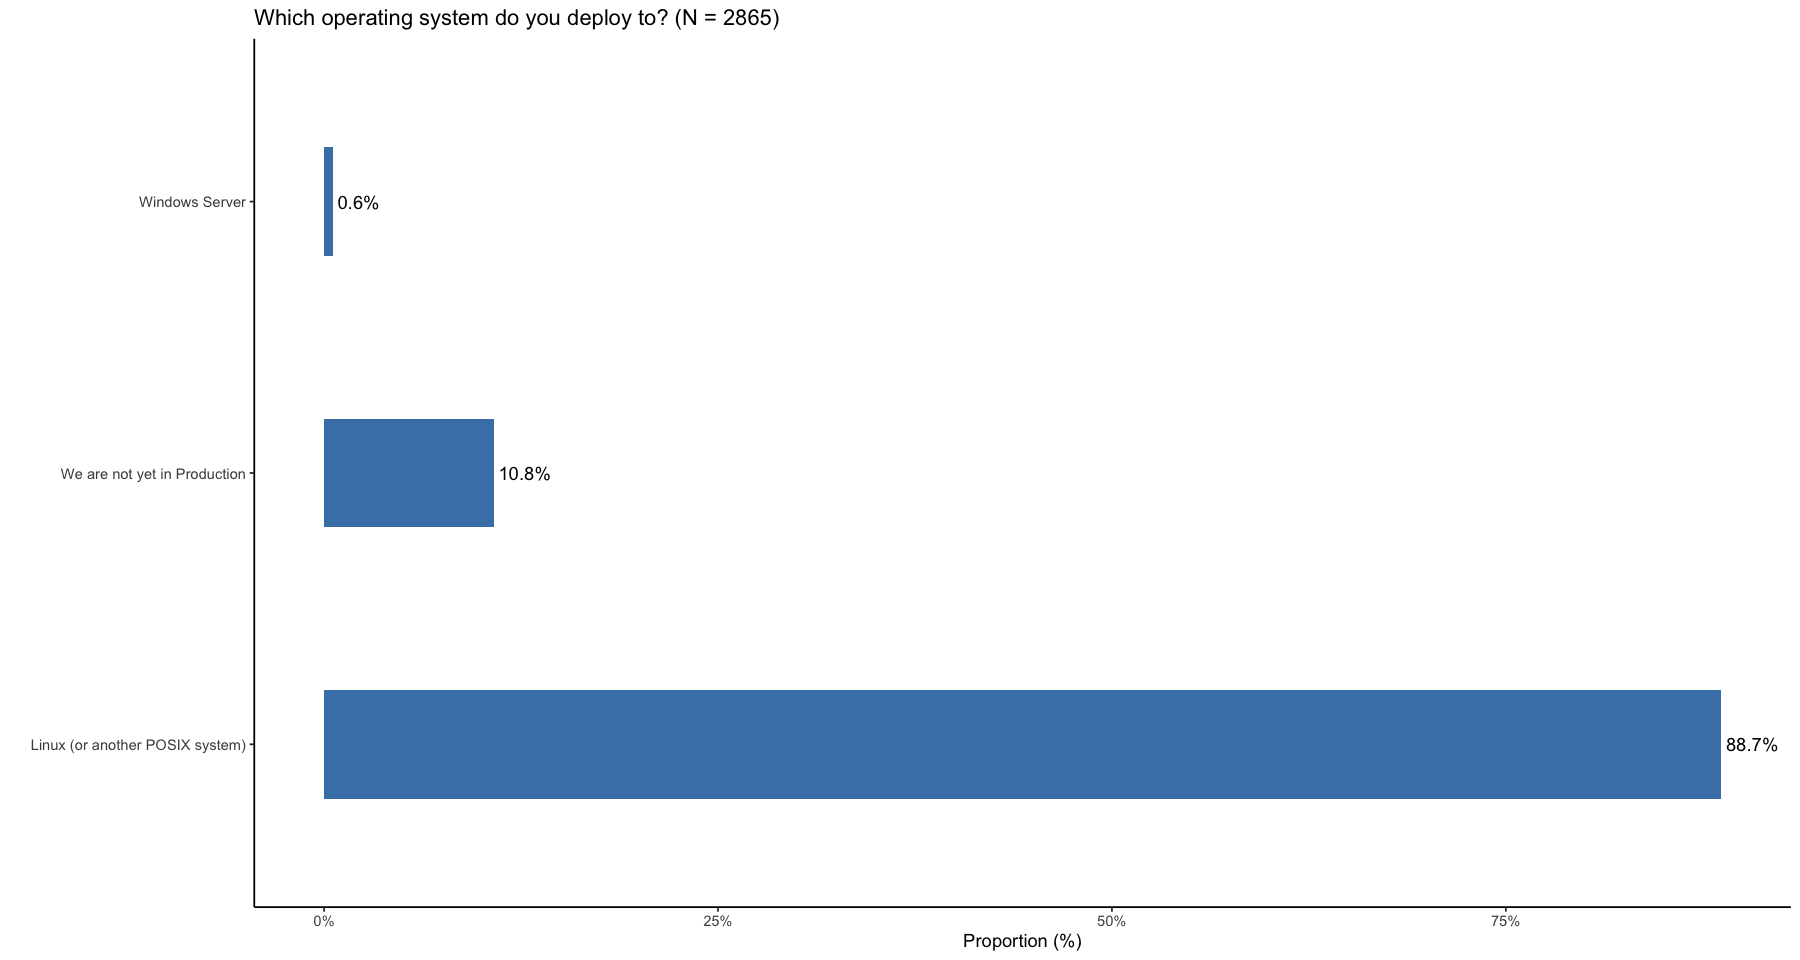


[[42]]


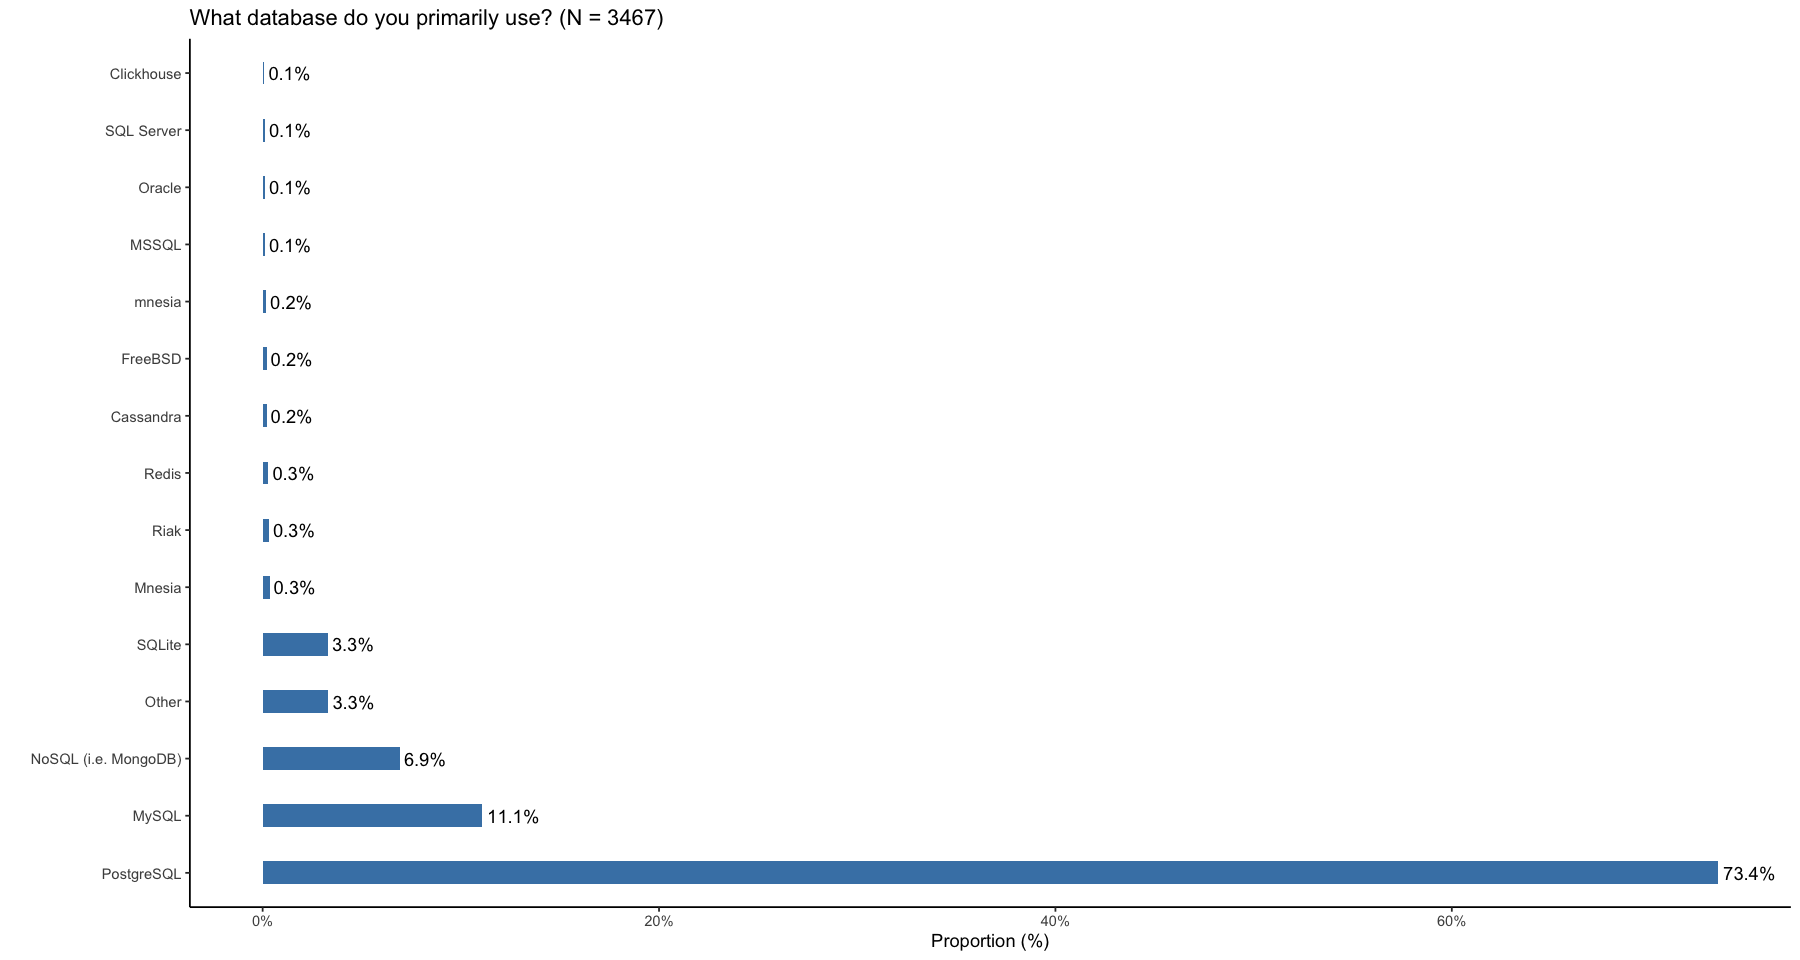


[[43]]


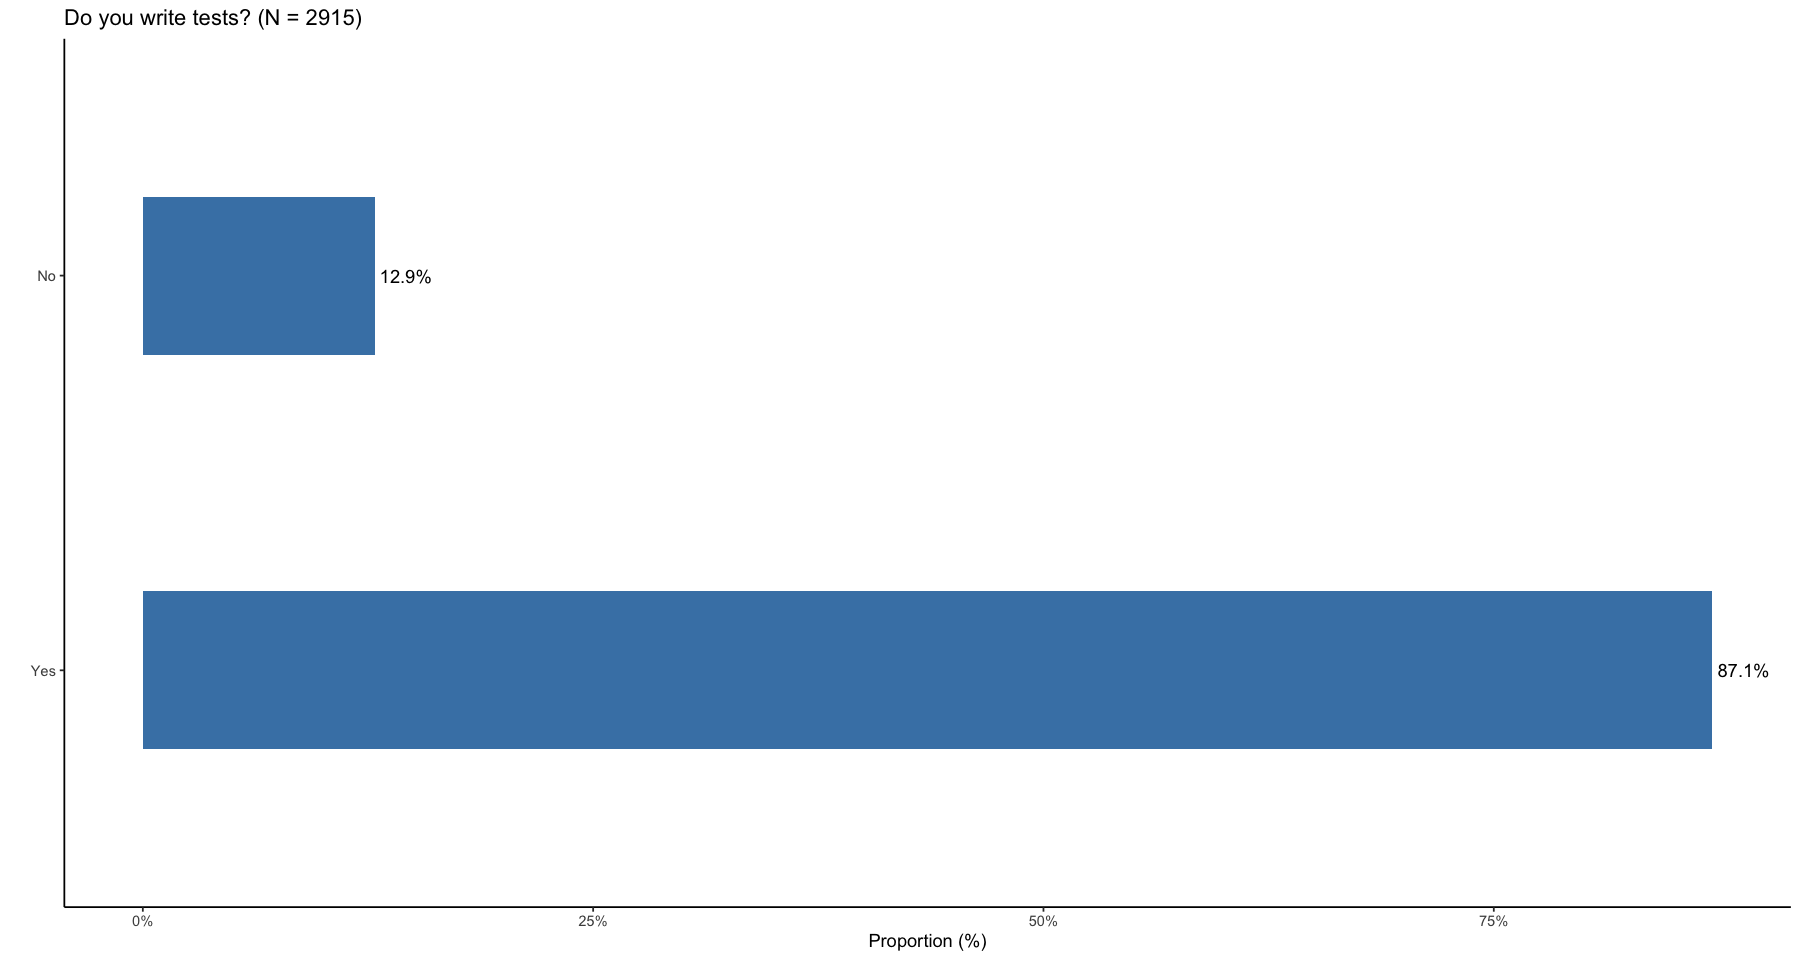


[[44]]


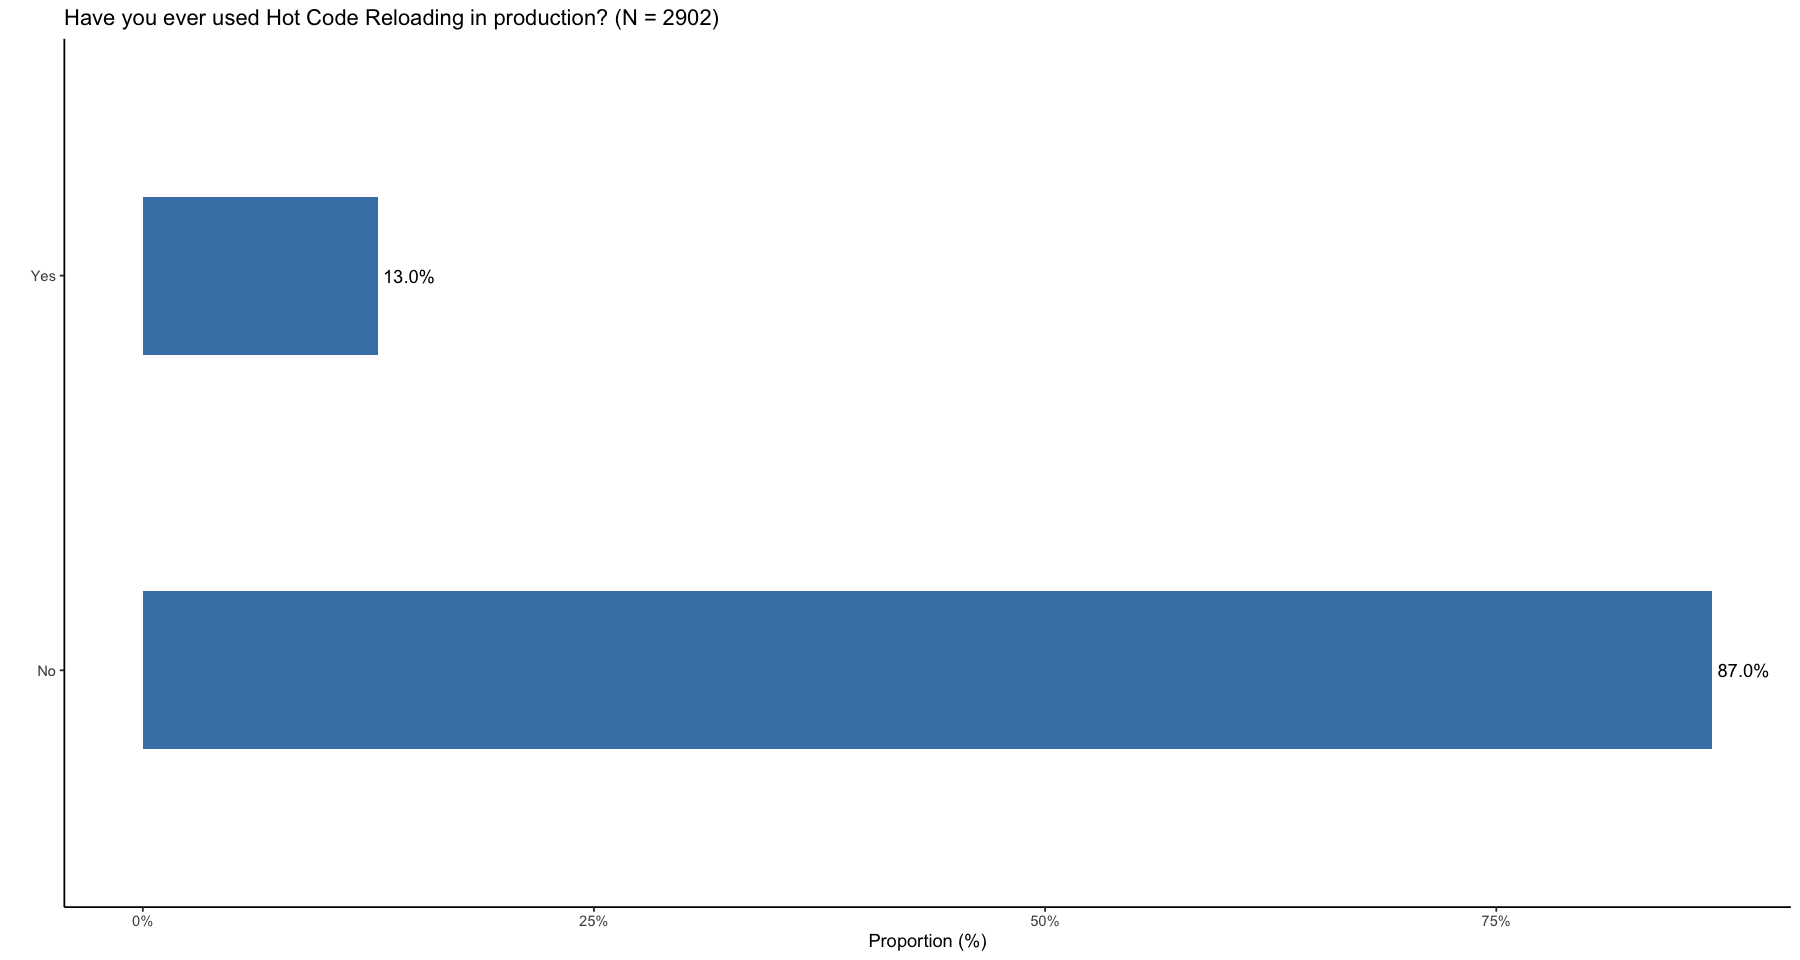


[[45]]


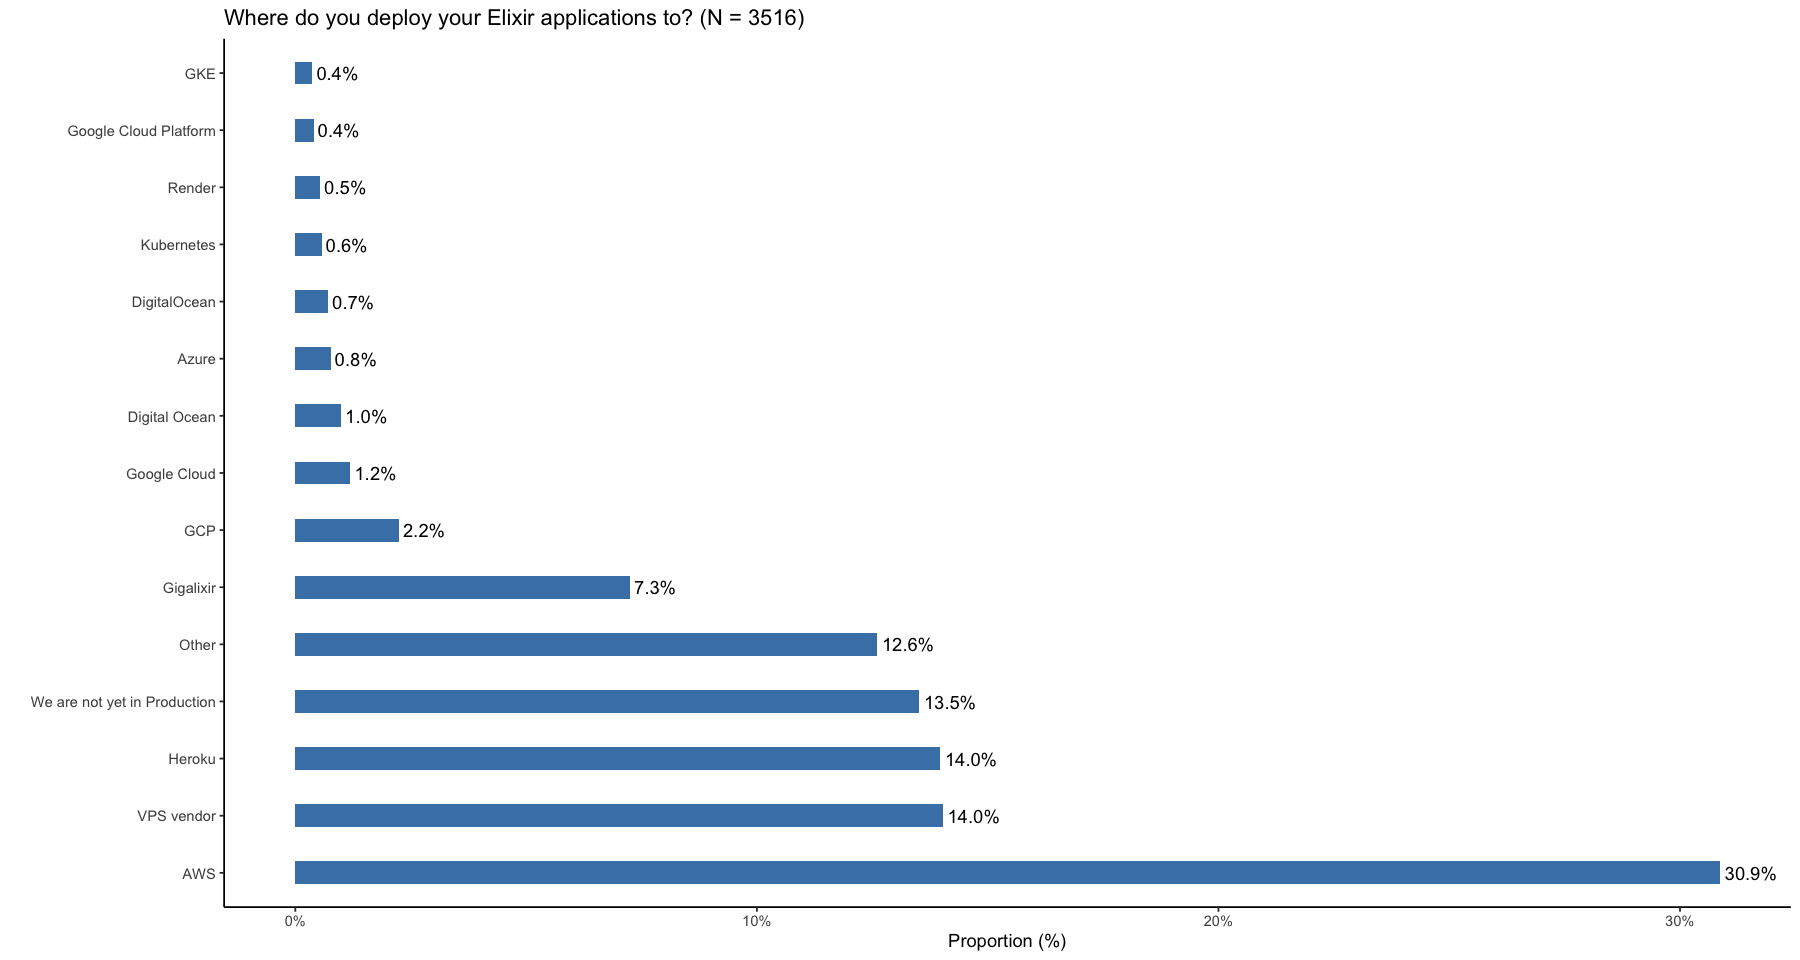


[[46]]


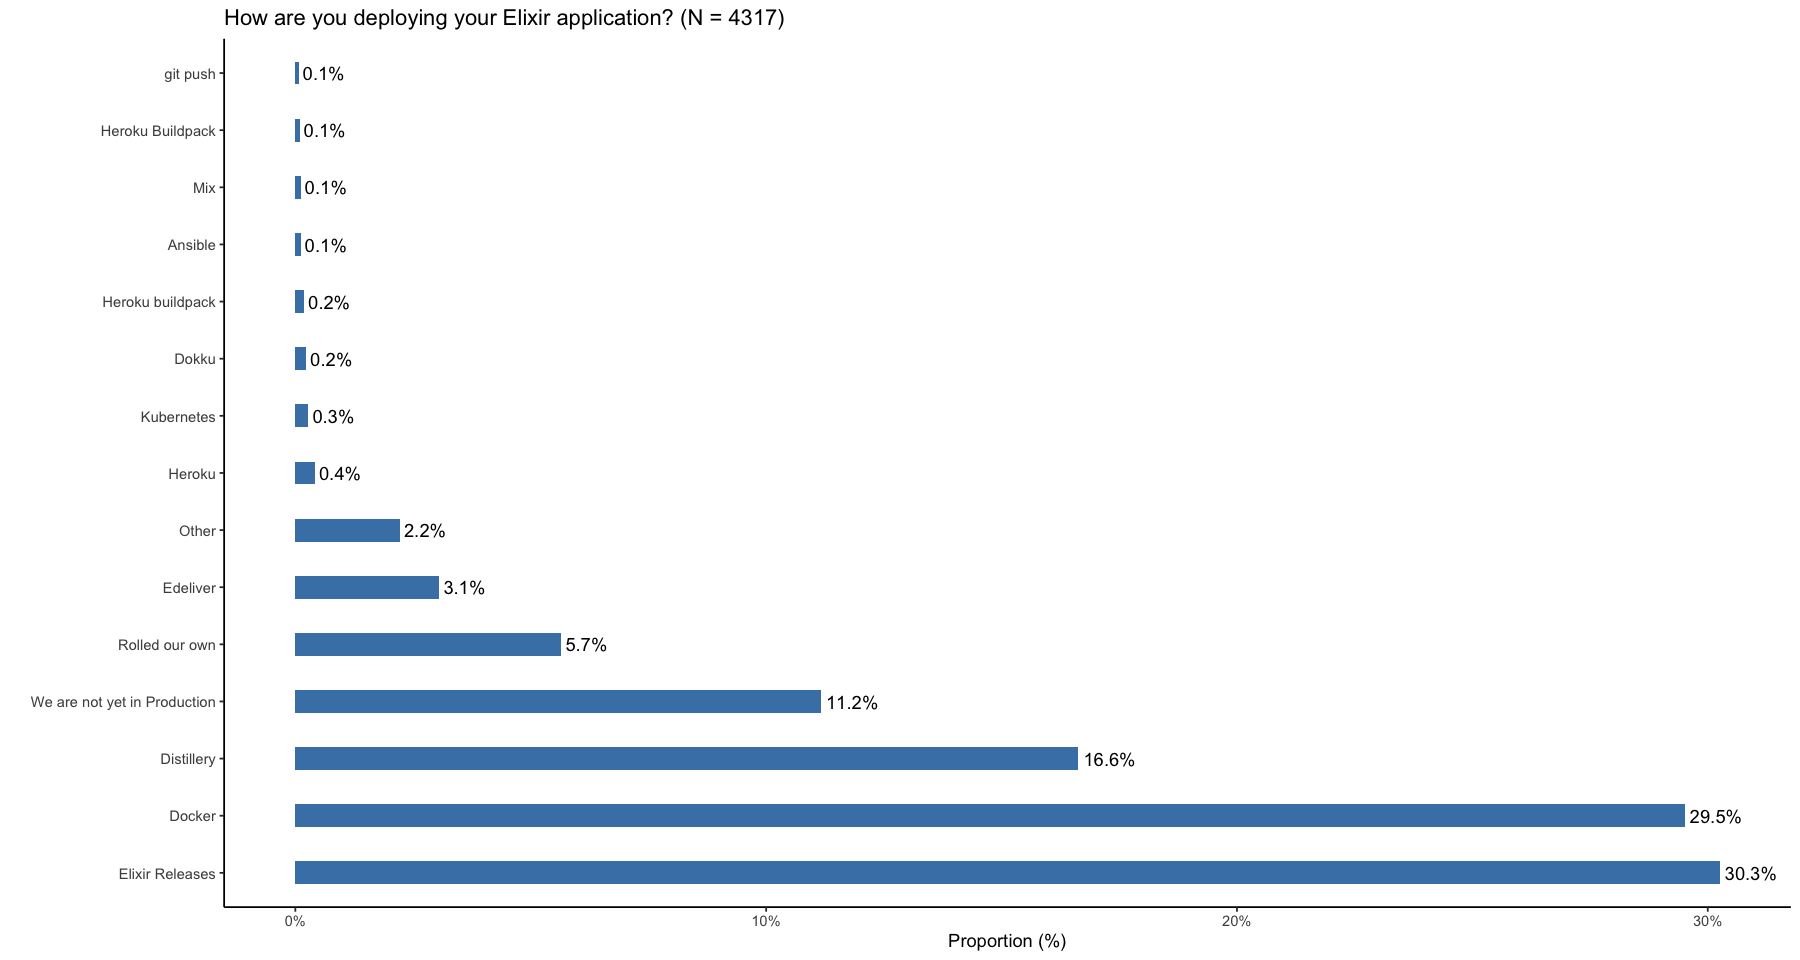


[[47]]


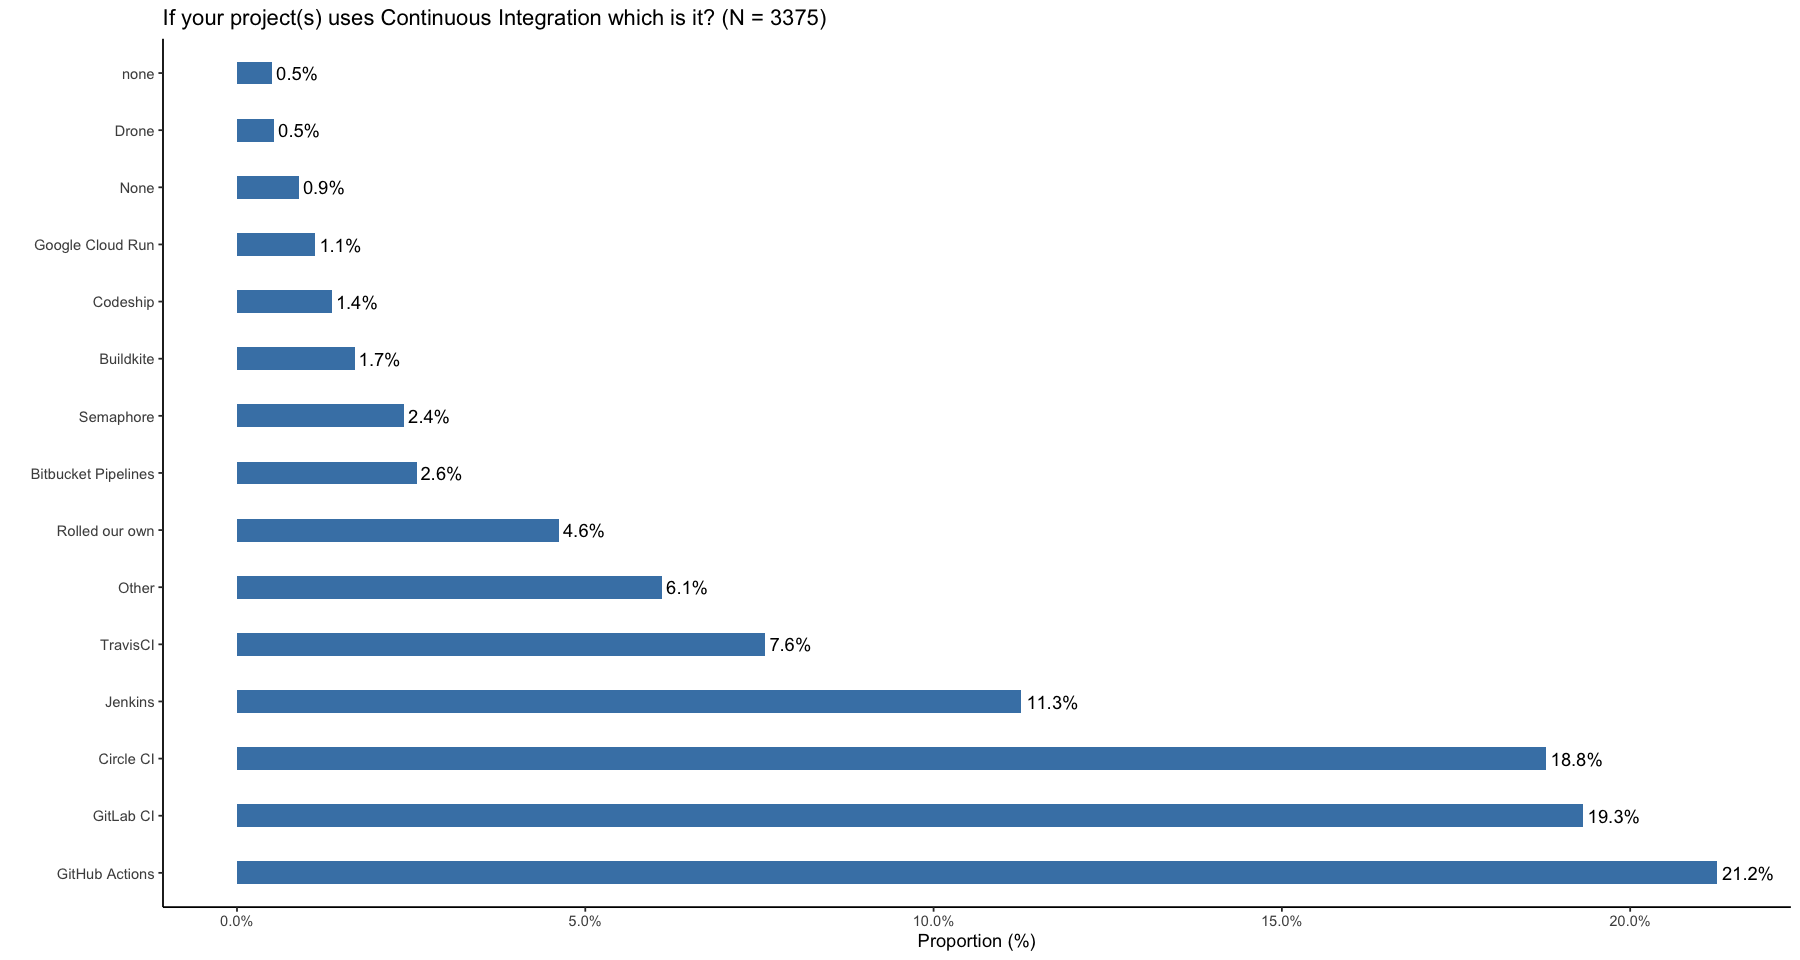


[[48]]


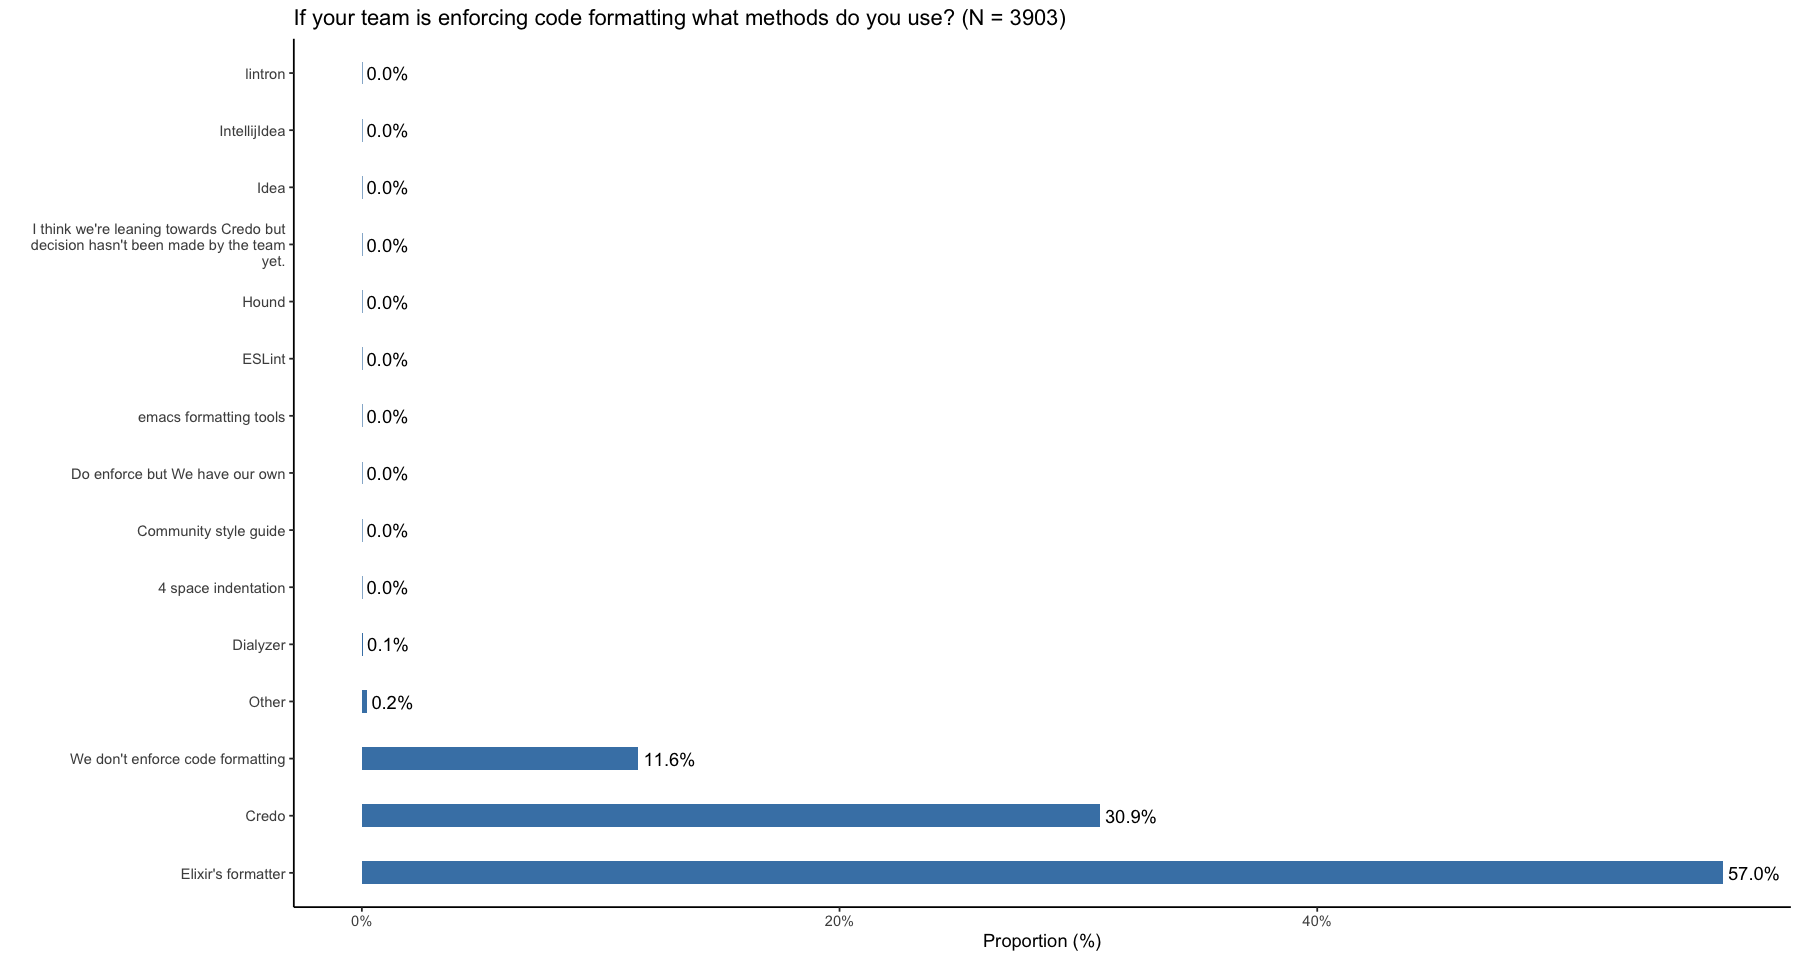


[[49]]


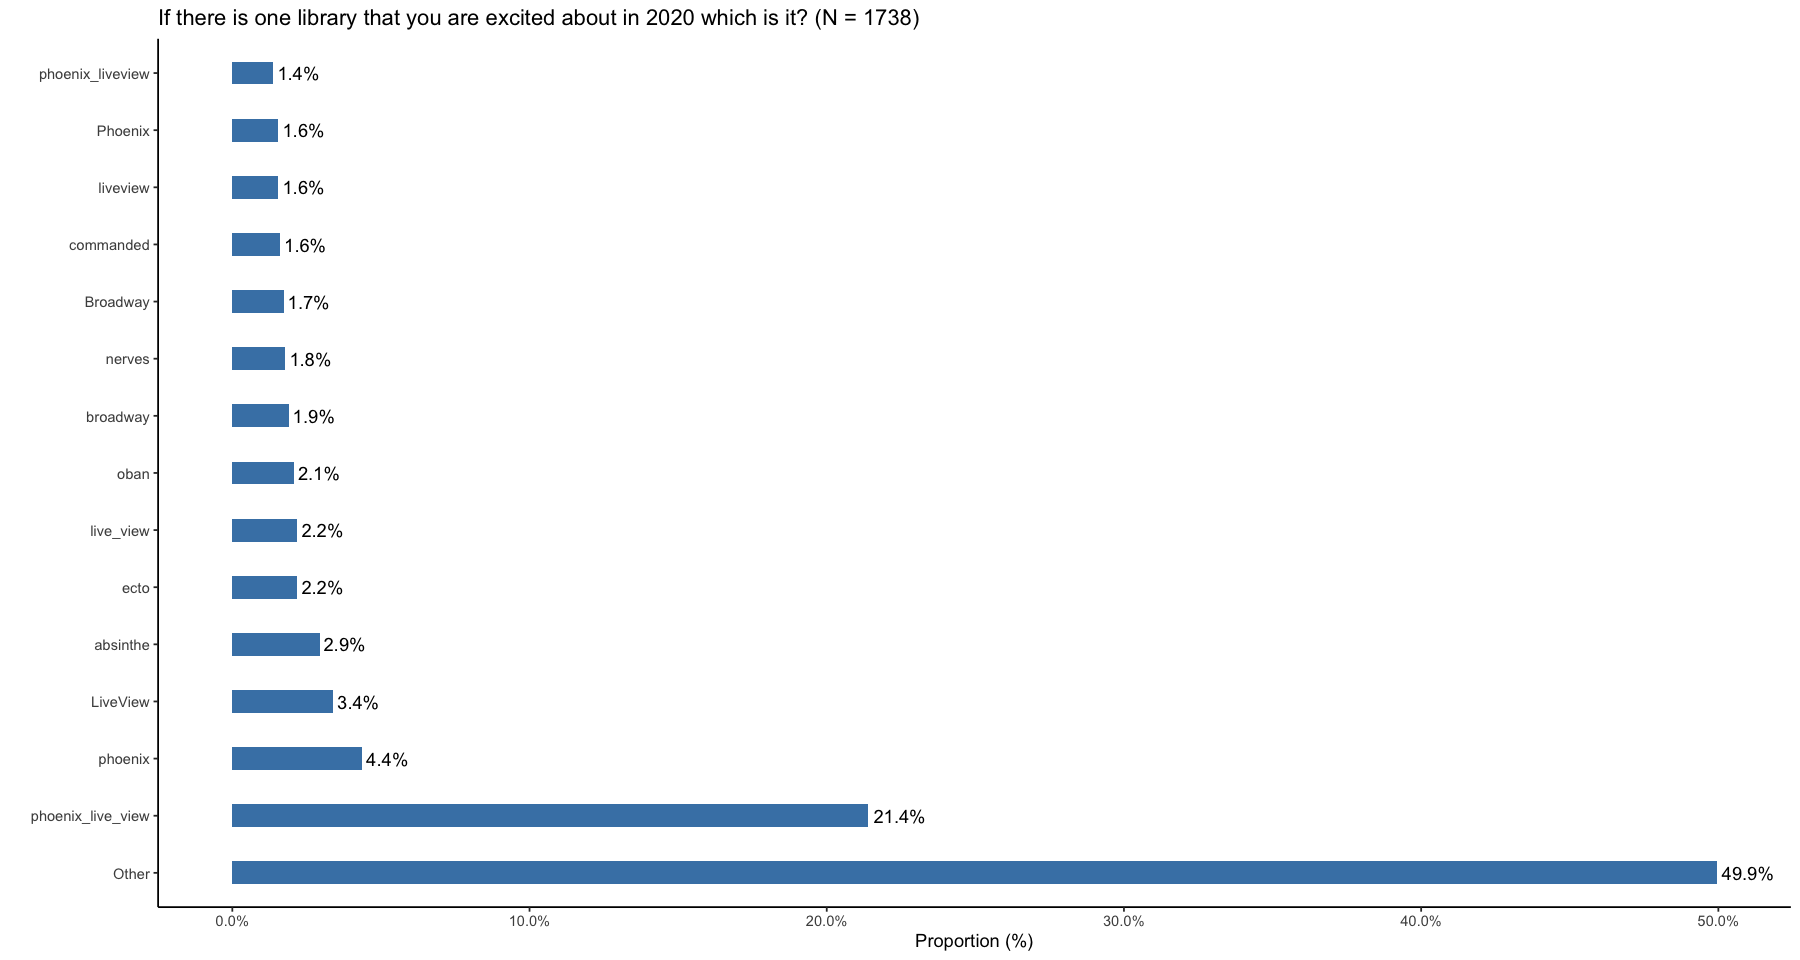


[[50]]


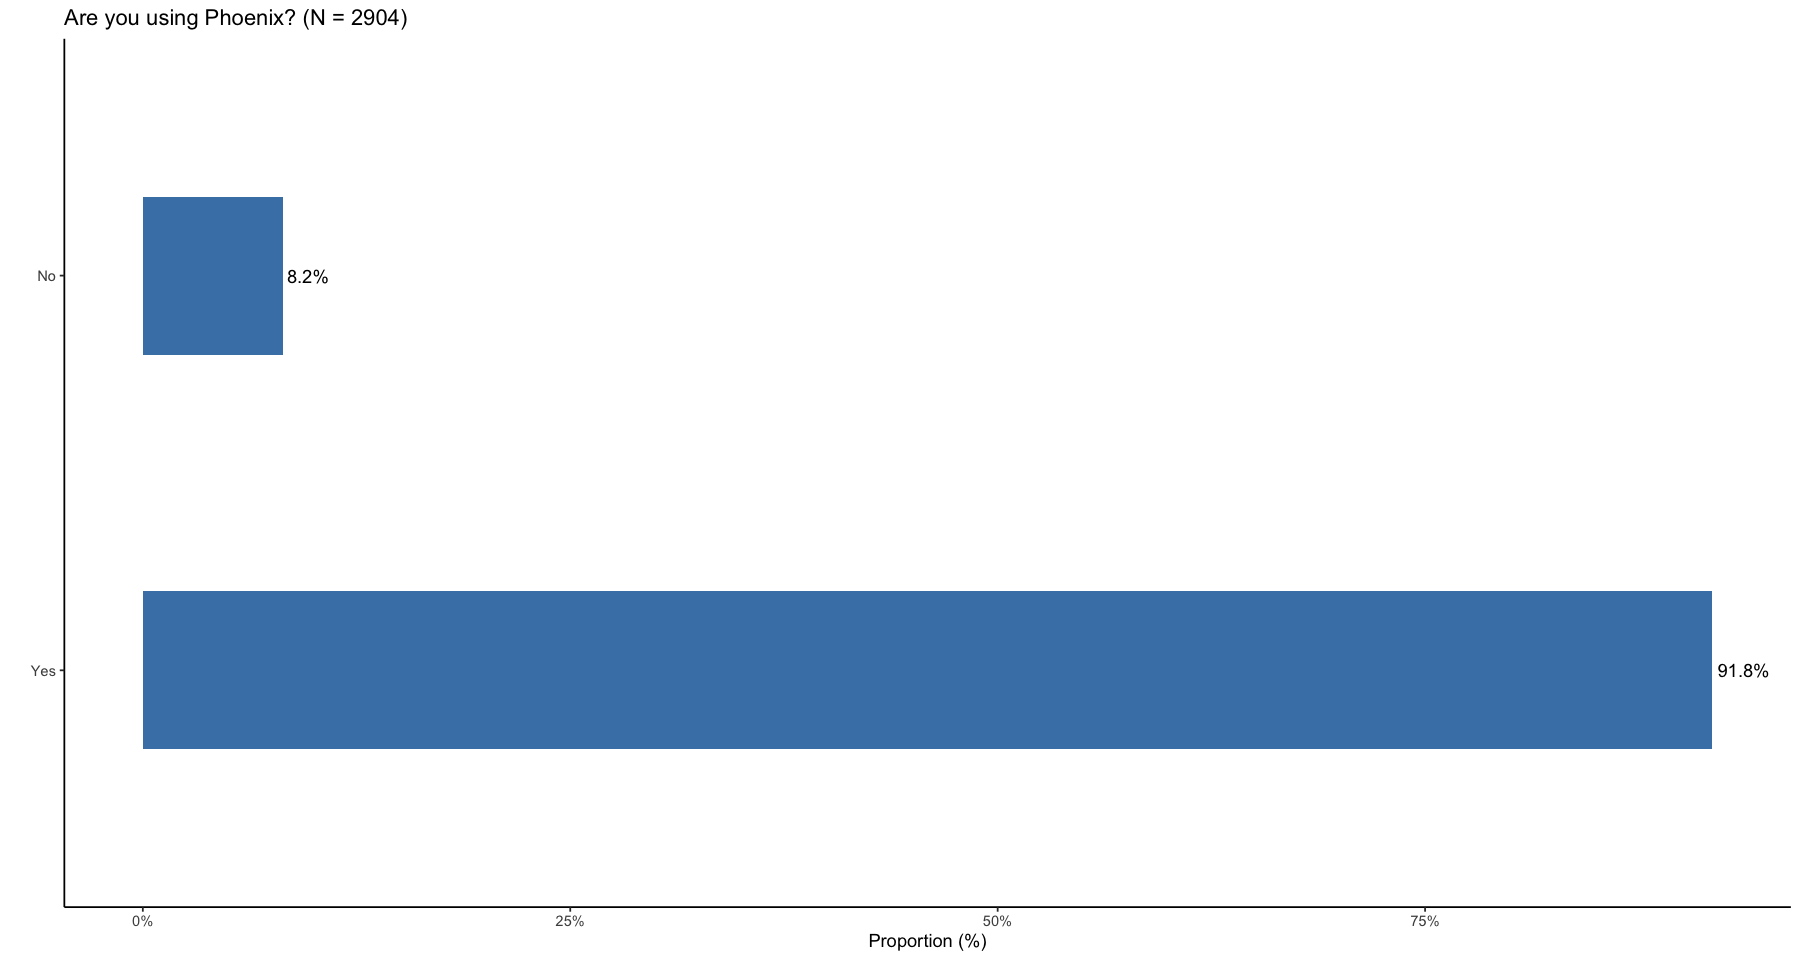


[[51]]


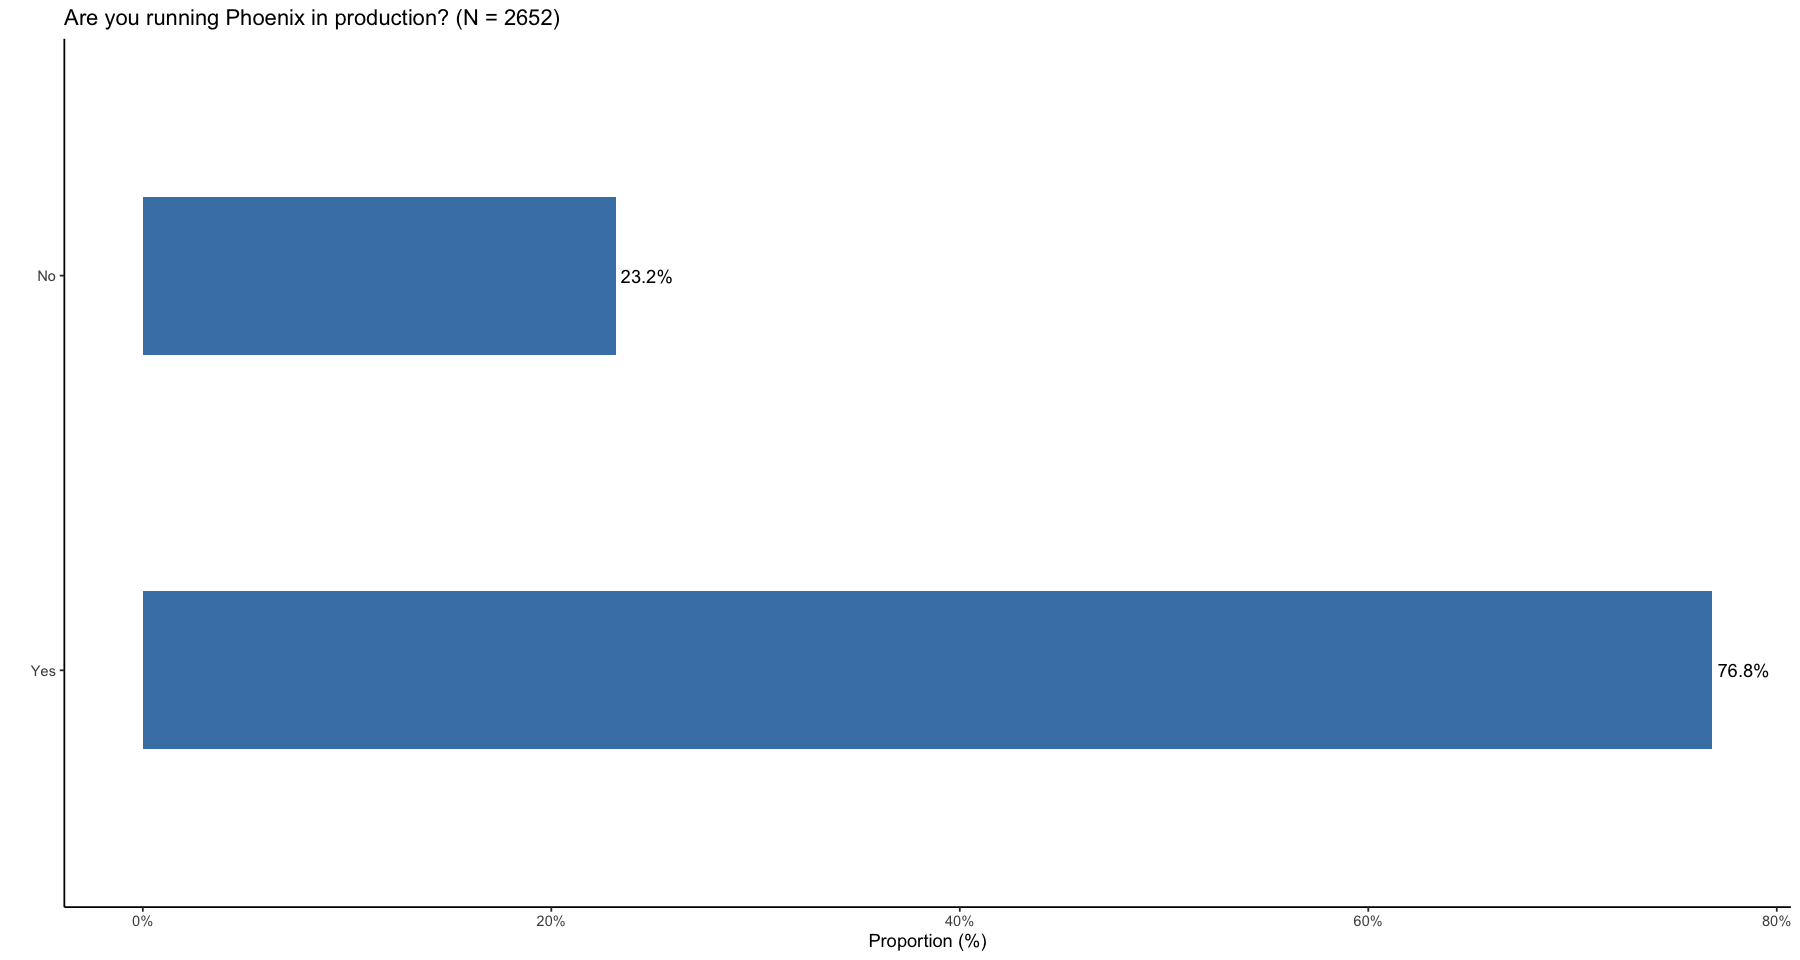


[[52]]


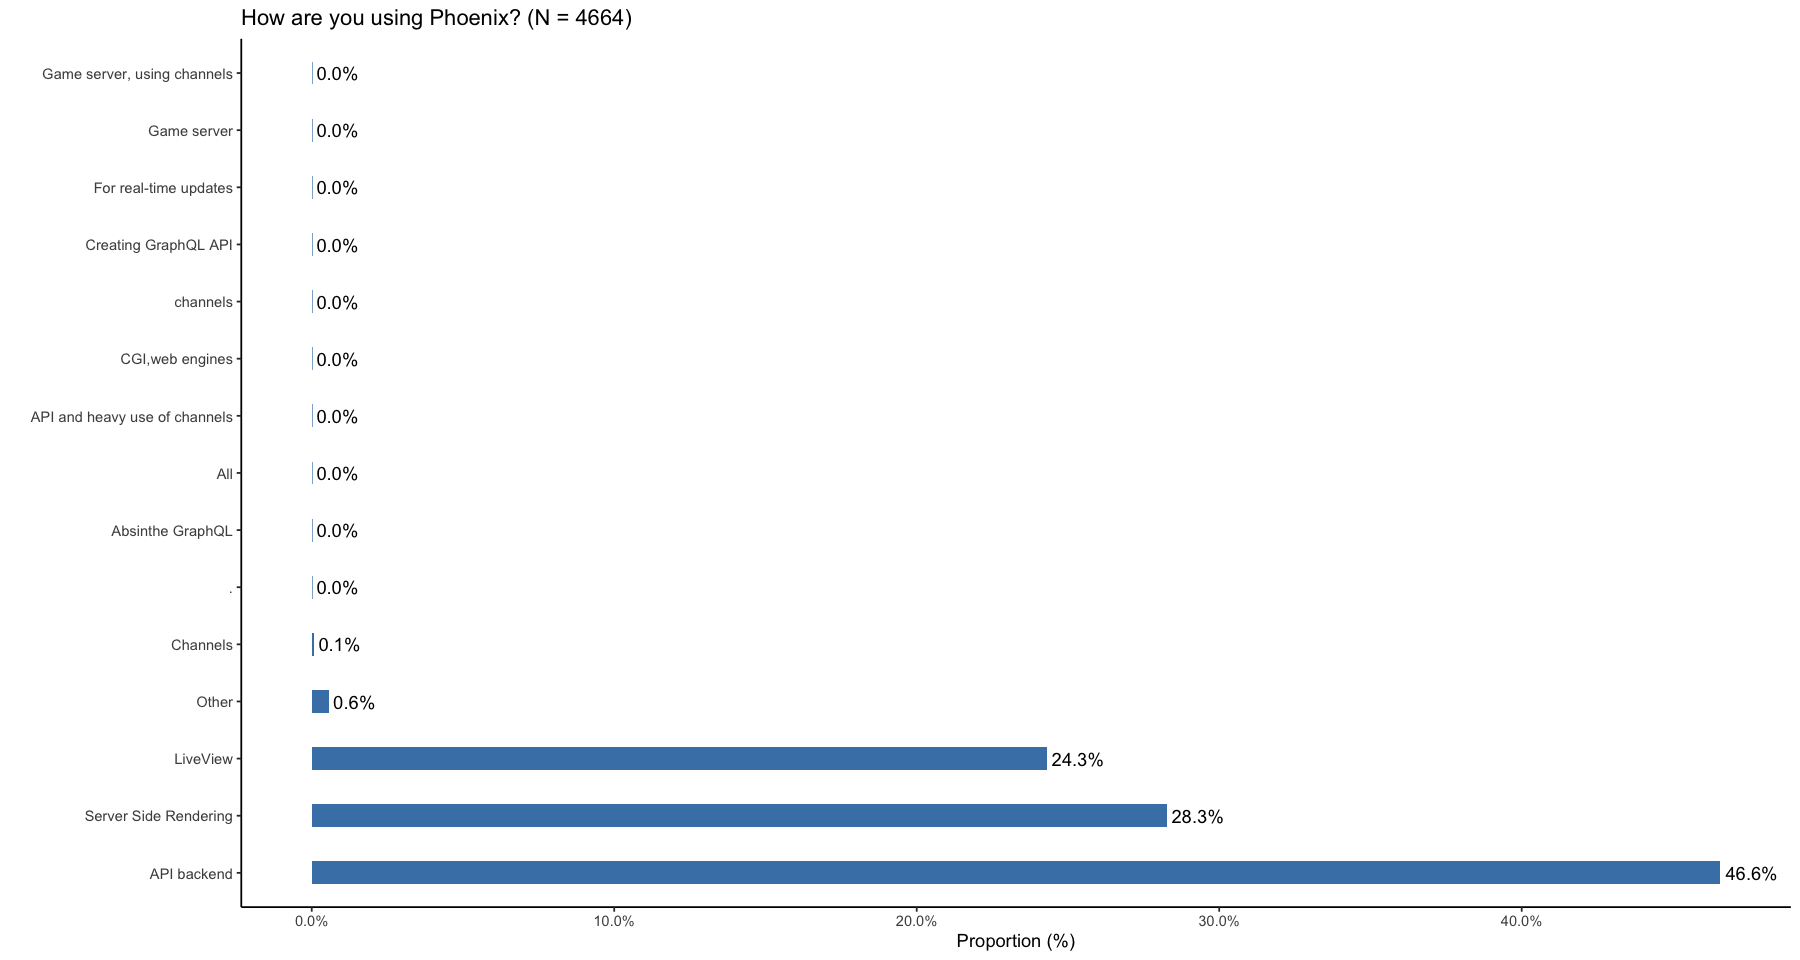


[[53]]


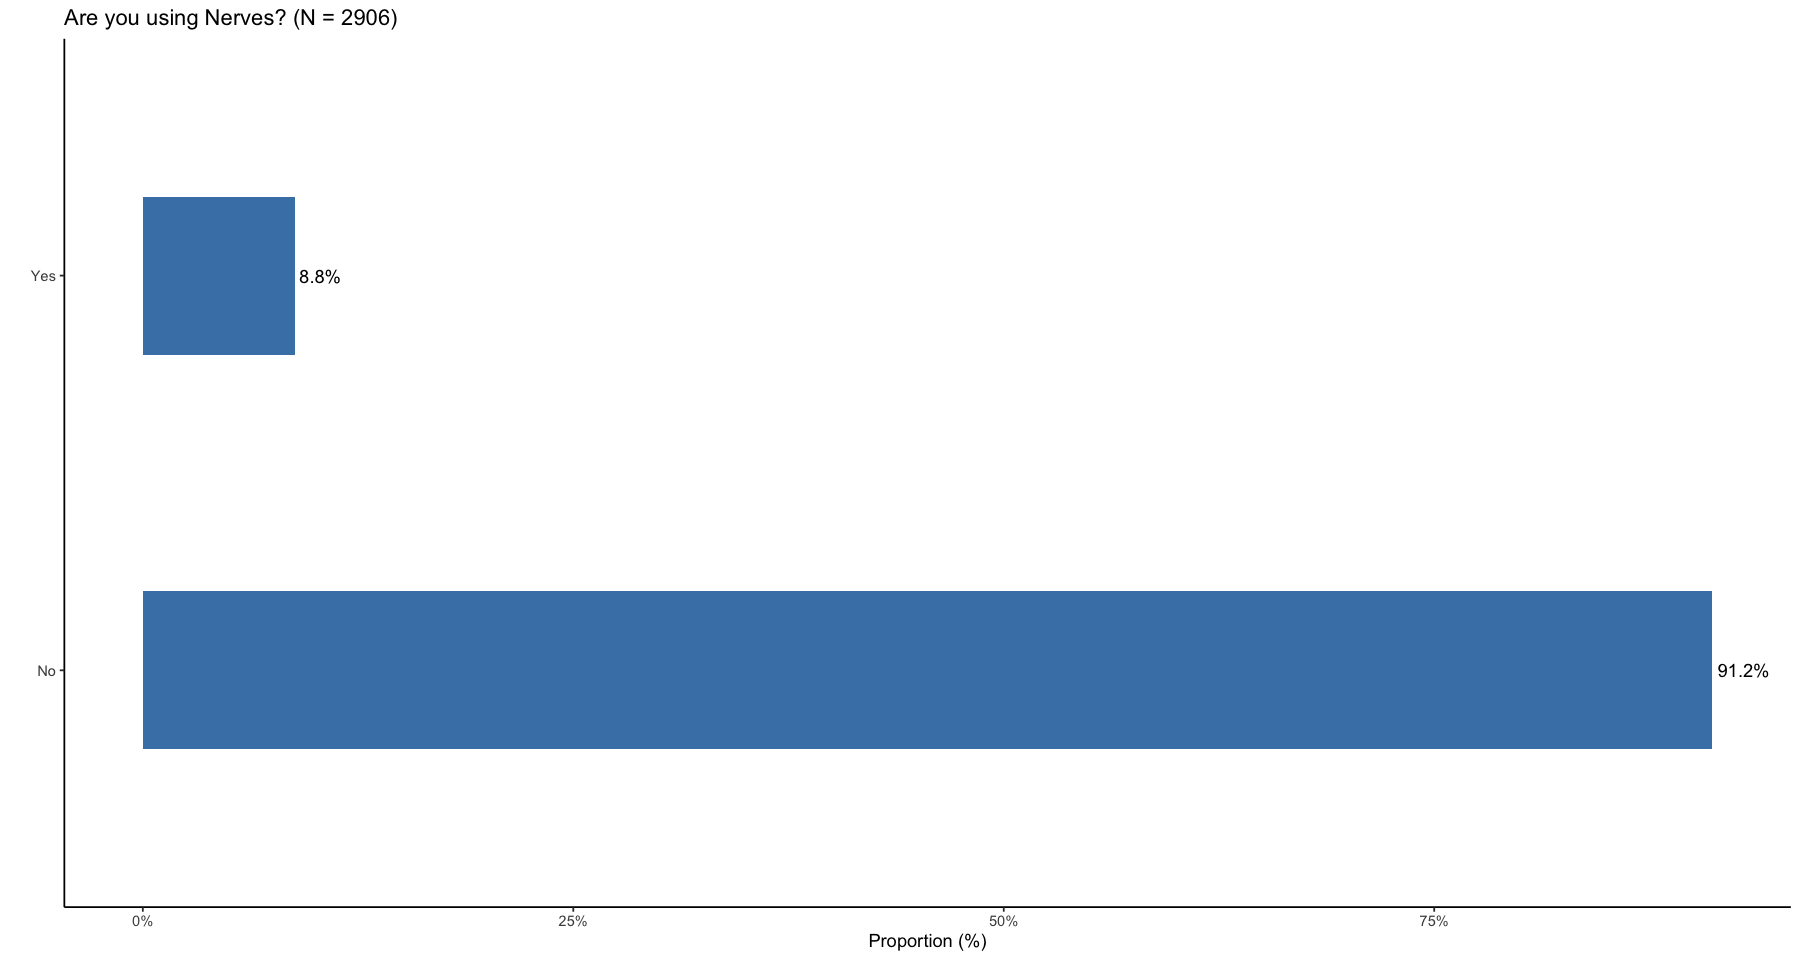


[[54]]


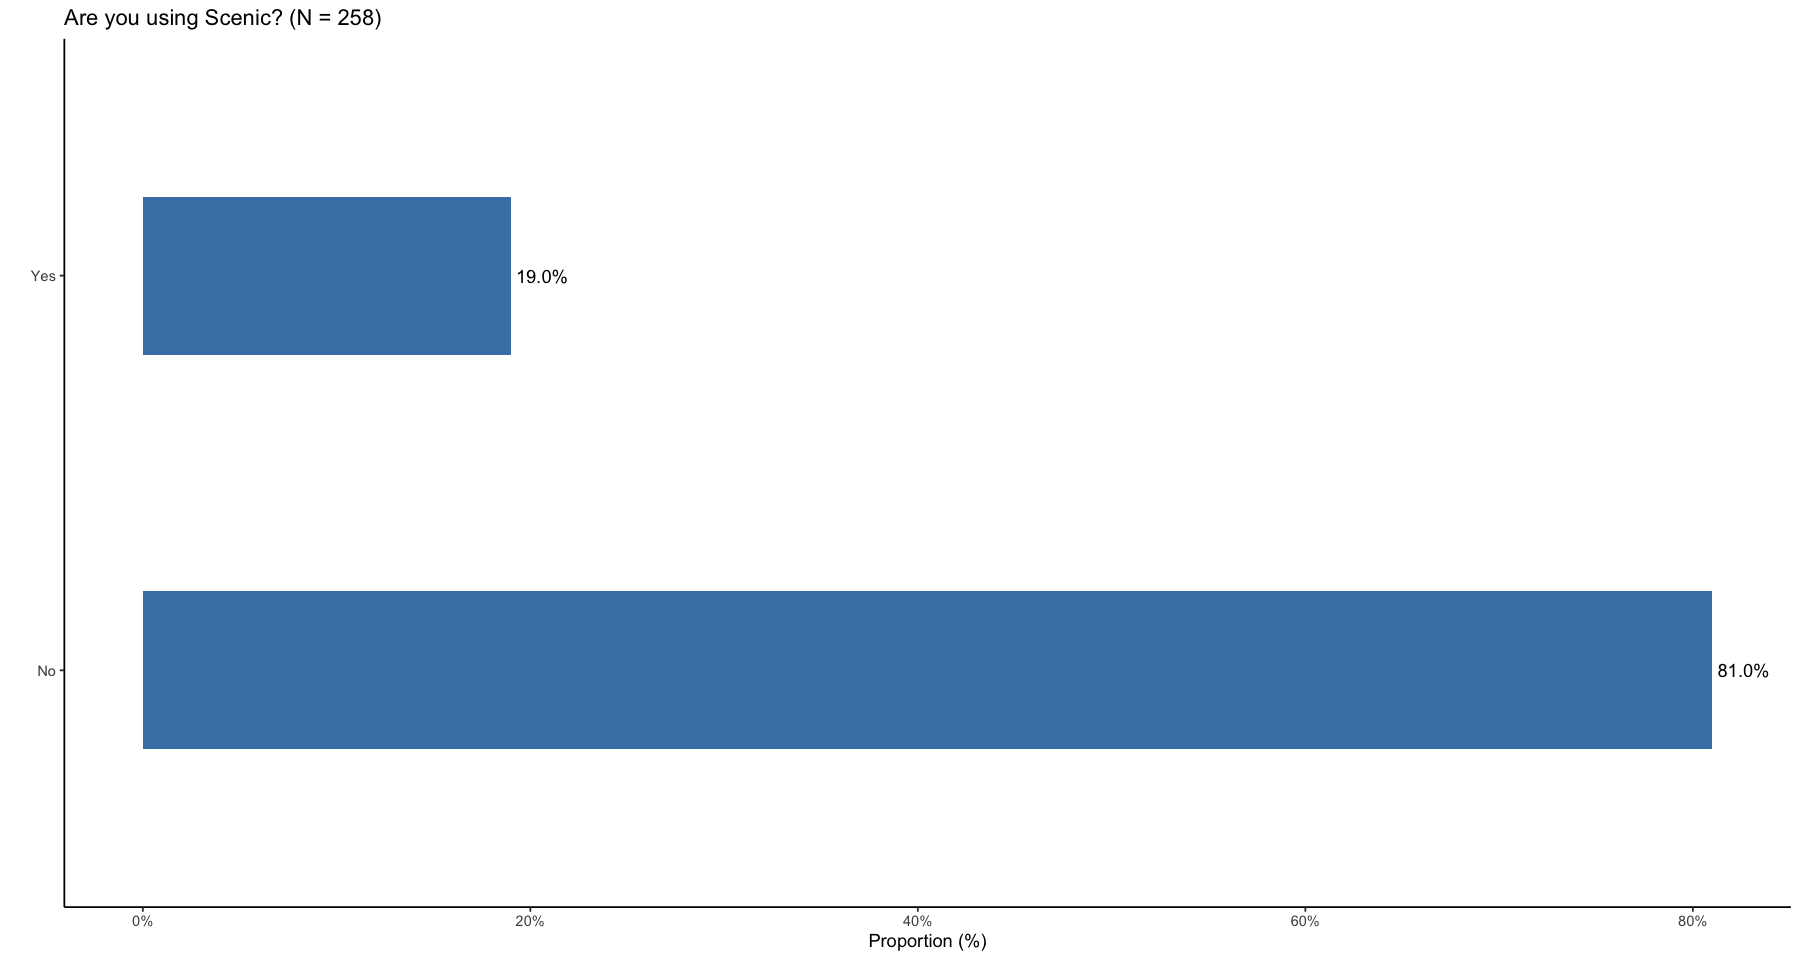

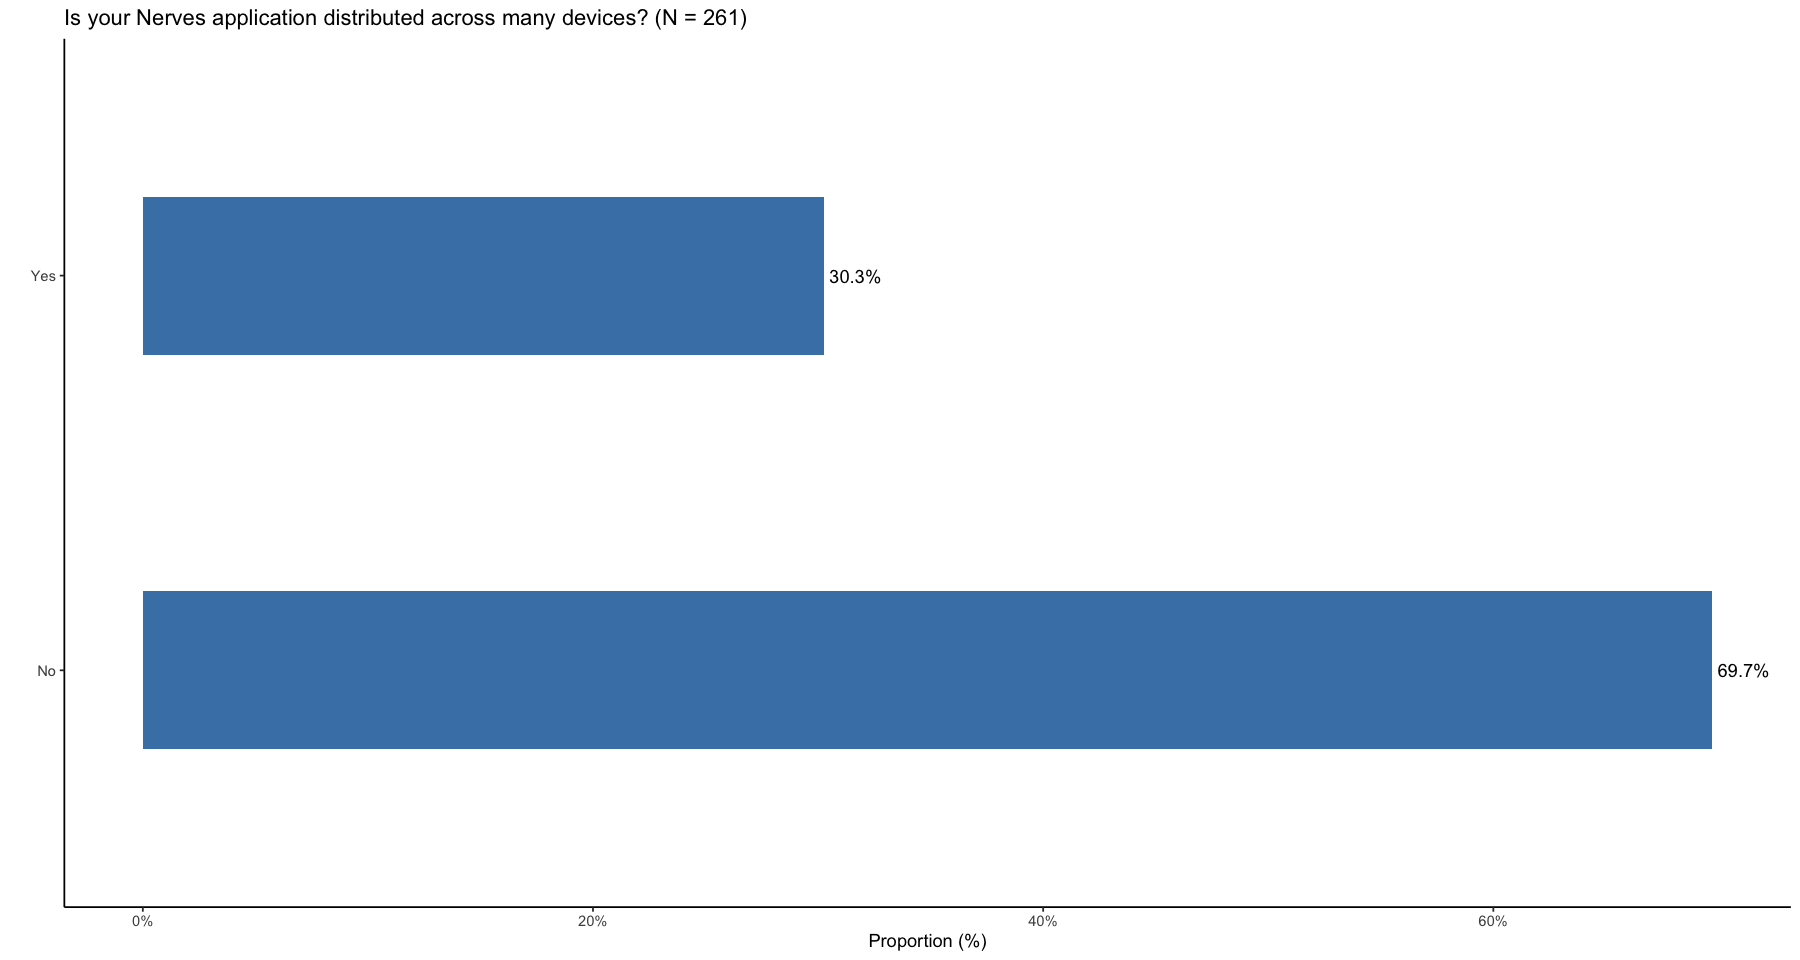

In [56]:
# Print the plots
options(warn=-1)
options(repr.plot.width=15, repr.plot.height=8)
print(survey_plots$plot)